MERGE

In [1]:
import os
import shutil
import glob

In [2]:
def getAllFilesInDirectoryAndSubdirectories(directory):
    filelist = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            filelist.append(os.path.join(root,file))
    return filelist

In [3]:
def merge(sourceDirs, outDir, useid=False, ignoreQueries=[]):
  querycount = 0
  numTuplesFile = open(os.path.join(outDir, "numTuples_merged.csv" ), "a")
  timesFile = open(os.path.join(outDir, "times_results_merged.csv" ), "a")
  if useid:
    idFile = open(os.path.join(outDir, "id_merged.csv" ), "a")

  for sd in sourceDirs:
    files = getAllFilesInDirectoryAndSubdirectories(sd)

    # find and remove numTuples, times, errors
    dirNumTuplesFileName = None
    dirTimesFileName = None
    dirErrorsFileName = None
    dirIdFileName = None
    i = 0
    while i<len(files):
      if "numTuples" in files[i]:
        dirNumTuplesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "results" in files[i]:
        dirTimesFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "errors" in files[i]:
        dirErrorsFileName = files[i]
        files.remove(files[i])
        i = i - 1
      elif "id" in files[i] and useid:
        dirIdFileName = files[i]
        files.remove(files[i])
        i = i - 1
      i = i + 1



    files.sort()

    print("NumTuplesFile: ", dirNumTuplesFileName)
    print("TimesFile: ", dirTimesFileName)
    print("All Files: ", files)

    filenames = glob.glob(sd+"/*_explainAnalyze.txt")
    filenames.sort()

    queries = [] 
      
    for f in filenames:
        if os.stat(f).st_size > 0 and not any(qu in f for qu in ignoreQueries):
            q = f.split("/")[-1].split("_")[0]
            print(q)
            queries.append(q)

            # copy files for this query to outdir
            for fileToCopy in glob.glob(sd+"/"+q+"*"):
                shutil.copy(fileToCopy, outDir)

    querycount = querycount + len(queries)

    dirNumTuplesFile = open(dirNumTuplesFileName)
    dirTimesFile = open(dirTimesFileName)
    if useid:
        dirIdFile = open(dirIdFileName)

    for numTuplesLine in dirNumTuplesFile.readlines():
        if any(qu in numTuplesLine for qu in queries):
            numTuplesFile.write(numTuplesLine)

    for timesLine in dirTimesFile.readlines():
        if any(qu in timesLine for qu in queries):
            timesFile.write(timesLine)

    if useid:
        for idLine in dirIdFile.readlines():
            if any(qu in idLine for qu in queries):
                idFile.write(idLine)
                
  numTuplesFile.close()
  timesFile.close()
  if useid:
    idFile.close()

  print(querycount)

  

    
    

In [4]:
subDirs = [f.path for f in os.scandir("./out/runYan_full_1/") if f.is_dir()]
subDirs = sorted(subDirs, key= lambda i: int(i.split("/")[-1]))
subDirs

['./out/runYan_full_1/1',
 './out/runYan_full_1/2',
 './out/runYan_full_1/3',
 './out/runYan_full_1/4',
 './out/runYan_full_1/5',
 './out/runYan_full_1/6',
 './out/runYan_full_1/7',
 './out/runYan_full_1/8',
 './out/runYan_full_1/9',
 './out/runYan_full_1/10',
 './out/runYan_full_1/11']

In [5]:
srcDirs1 = []
for dir in subDirs:
    srcDirs1.append([x[0] for x in os.walk(dir)][1:])
    srcDirs1[-1].sort()

srcDirs1

[['./out/runYan_full_1/1/2023-09-29_10:51:47.192240',
  './out/runYan_full_1/1/2023-09-29_11:12:37.631809',
  './out/runYan_full_1/1/2023-09-29_11:28:37.231534',
  './out/runYan_full_1/1/2023-09-29_12:05:40.438305',
  './out/runYan_full_1/1/2023-09-29_12:25:09.976717',
  './out/runYan_full_1/1/2023-09-29_12:41:12.577935',
  './out/runYan_full_1/1/2023-09-29_13:35:40.268890',
  './out/runYan_full_1/1/2023-09-29_14:06:38.991537',
  './out/runYan_full_1/1/2023-09-29_14:37:18.776985',
  './out/runYan_full_1/1/2023-09-29_14:53:20.713653',
  './out/runYan_full_1/1/2023-09-29_15:09:21.977689',
  './out/runYan_full_1/1/2023-09-29_16:08:44.986629',
  './out/runYan_full_1/1/2023-09-29_16:25:44.338084',
  './out/runYan_full_1/1/2023-09-29_16:41:40.647979',
  './out/runYan_full_1/1/2023-09-29_17:12:57.839330',
  './out/runYan_full_1/1/2023-09-29_17:32:30.070964',
  './out/runYan_full_1/1/2023-09-29_18:03:39.595689',
  './out/runYan_full_1/1/2023-09-29_18:21:52.257471',
  './out/runYan_full_1/1/202

In [6]:
subDirs = [f.path for f in os.scandir("./out/runNormal/") if f.is_dir()]
subDirs.sort()
subDirs

['./out/runNormal/1']

In [7]:
srcDirs2 = []
for dir in subDirs:
    srcDirs2.append([x[0] for x in os.walk(dir)][1:])
    srcDirs2[-1].sort()

srcDirs2

[['./out/runNormal/1/2023-09-15_09:45:49.235166',
  './out/runNormal/1/2023-09-15_10:03:47.974861',
  './out/runNormal/1/2023-09-15_10:19:51.411143',
  './out/runNormal/1/2023-09-15_10:38:50.106636',
  './out/runNormal/1/2023-09-15_10:55:54.998795',
  './out/runNormal/1/2023-09-15_11:29:39.956346',
  './out/runNormal/1/2023-09-15_12:05:47.995304',
  './out/runNormal/1/2023-09-15_12:21:47.146433',
  './out/runNormal/1/2023-09-15_14:46:15.066667',
  './out/runNormal/1/2023-09-15_16:21:58.417307',
  './out/runNormal/1/2023-09-15_17:47:42.573502',
  './out/runNormal/1/2023-09-15_19:52:22.100670',
  './out/runNormal/1/2023-09-15_20:54:39.558808',
  './out/runNormal/1/2023-09-15_21:21:50.782134',
  './out/runNormal/1/2023-09-15_23:10:26.539170',
  './out/runNormal/1/2023-09-16_00:42:40.674395',
  './out/runNormal/1/2023-09-16_00:58:36.983348',
  './out/runNormal/1/2023-09-16_01:29:37.469526',
  './out/runNormal/1/2023-09-16_05:38:09.430350',
  './out/runNormal/1/2023-09-16_05:55:45.606353',


In [8]:
from pathlib import Path

In [9]:
i = 1
for d in srcDirs1:
    Path("./mergeout/complete/"+str(i)).mkdir(parents=True, exist_ok=True)
    if i<=6:
        merge(d, "./mergeout/complete/"+str(i), useid = True, ignoreQueries = ['09ac', '11ag', '11al', '12am', '13aa', '13an', '14ai', '14am', '15an', '16al', '16am', '16ao', '17ab', '17ag', '18aj', '18an', '19ad', '19ak', '20ag', '21aa', '21ab', '21ad', '21ah', '21am', '22ak', '22am', '23ae', '23af', '23ag', '23aj', '23al', '23an', '23ao', '24ac', '24ad', '24ae', '24ah', '24ak', '24an', '25aa', '25ai', '25ao', '26ae', '26ag', '26aj', '26ak', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ag', '27ai', '27aj', '27ak', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28af', '28ag', '28ah', '28an', '28ao', '29ab', '29ac', '29af', '29ag', '29ai', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ad', '30af', '30ah', '30ai', '30an', '30ao'])
    else:
        merge(d, "./mergeout/complete/"+str(i), useid = True)
    i = i + 1

NumTuplesFile:  ./out/runYan_full_1/1/2023-09-29_10:51:47.192240/numTuples_results_2023-09-29_10:51:47.192240.txt
TimesFile:  ./out/runYan_full_1/1/2023-09-29_10:51:47.192240/times_results_2023-09-29_10:51:47.192240.txt
All Files:  ['./out/runYan_full_1/1/2023-09-29_10:51:47.192240/02aa_explain.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02aa_explainAnalyze.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ab_explain.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ab_explainAnalyze.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ac_explain.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ac_explainAnalyze.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ad_explain.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ad_explainAnalyze.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ae_explain.txt', './out/runYan_full_1/1/2023-09-29_10:51:47.192240/02ae_explainAnalyze.txt', './out/runYan_full_1/1/2023-09-29_10:51:47

In [10]:
i = 1
for d in srcDirs2:
    Path("./mergeout/basic/"+str(i)).mkdir(parents=True, exist_ok=True)
    merge(d, "./mergeout/basic/"+str(i), useid = True)
    i = i + 1

NumTuplesFile:  ./out/runNormal/1/2023-09-15_09:45:49.235166/numTuples_results_2023-09-15_09:45:49.235166.txt
TimesFile:  ./out/runNormal/1/2023-09-15_09:45:49.235166/times_results_2023-09-15_09:45:49.235166.txt
All Files:  ['./out/runNormal/1/2023-09-15_09:45:49.235166/02aa_explain.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02aa_explainAnalyze.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ab_explain.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ab_explainAnalyze.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ac_explain.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ac_explainAnalyze.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ad_explain.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ad_explainAnalyze.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ae_explain.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02ae_explainAnalyze.txt', './out/runNormal/1/2023-09-15_09:45:49.235166/02af_explain.txt', './out/runNormal/1/2023-0

In [11]:
# remove timeouts for which a valid entry exists in the next line
def cleanupTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
      #if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
      #  f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i] and i+1<len(lines) and lines[i].split(";")[0].split("/")[-1].replace(".sql", "") == lines[i+1].split(";")[0].split("/")[-1]:
        print("skip row")
      else:
        f.write(lines[i])
     # if "Timeout" not in lines[i]:# or i+1<len(lines) and lines[i].split(";")[0].split("/")[-1] == lines[i+1].split(";")[0].split("/")[-1]:
     #   f.write(lines[i])
      i = i + 1

In [12]:
# remove timeouts for which a valid entry exists in the next line
def cleanupAllTimeouts(dir):
  with open(os.path.join(dir, "numTuples_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"numTuples_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i]:
        print("skip row: " + lines[i])
      else:
        f.write(lines[i])
      i = i + 1

  with open(os.path.join(dir, "times_results_merged.csv"), "r") as f:
    lines = f.readlines()
  with open(os.path.join(dir,"times_results_merged_new.csv"), "w") as f:
    i = 0
    while i < len(lines):
      if "Timeout" in lines[i]:
        print("skip row: " + lines[i])
      else:
        f.write(lines[i])
      i = i + 1

In [13]:
def refreshFiles(dir):
  os.remove(os.path.join(dir, "numTuples_merged.csv"))
  os.remove(os.path.join(dir, "times_results_merged.csv"))
  os.rename(os.path.join(dir, "numTuples_merged_new.csv"), os.path.join(dir, "numTuples_merged.csv"))
  os.rename(os.path.join(dir, "times_results_merged_new.csv"), os.path.join(dir, "times_results_merged.csv"))

In [14]:
dirs = ["./mergeout/basic/1/", "./mergeout/complete/1/", "./mergeout/complete/2/", "./mergeout/complete/3/", "./mergeout/complete/4/", "./mergeout/complete/5/", "./mergeout/complete/6/", "./mergeout/complete/7/", "./mergeout/complete/8/", "./mergeout/complete/9/", "./mergeout/complete/10/", "./mergeout/complete/11/"]
for d in dirs:
    cleanupAllTimeouts(d)
    refreshFiles(d)

AGGREGATE

In [15]:
import glob
import numpy as np

In [16]:
def openFileByWildcard(wc):
  for filename in glob.glob(wc):
    f = open(filename, 'r')
    return f

In [17]:
def getQueryName(s):
  return s.split(";")[0].split("/")[-1].replace(".sql", "")


In [18]:
def getNextLine(fileList):
  res = []
  for f in fileList:
    if f != None:
      res.append(f.readline())
    else:
      res.append("")

  return res

In [19]:
def getNextQueries(fileList):
  res = []
  lines = getNextLine(fileList)
  for l in lines:
    if l != "":
      res.append(getQueryName(l))
    else:
      res.append("")
  return res

In [20]:
def findNextLowerQuery(nextLines):
  j = 0
  while nextLines[j]=="": # get first line with content as starting point
    if j == len(nextLines)-1:
      return (None, None)
    j = j + 1
  lowest = getQueryName(nextLines[j])
  lowestIndex = j
  duplicates = [j]


  for i in range(j+1,len(nextLines)): # for all other lines, check if there is a matching query, or a previous query
    if nextLines[i].strip() != "":
      qn = getQueryName(nextLines[i])
      if qn == lowest:
        duplicates.append(i)
        continue
      if qn < lowest:
        lowest = qn
        lowestIndex = i
        duplicates = [i]

  return (lowest, duplicates)

In [21]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return float('inf')#9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000

In [22]:
def aggResults(dirList, outDir):
  queriesToLog = {}
  timesResultsOut = open(os.path.join(outDir, "times_results_agg.csv"), "w")
  numTupleOut = open(os.path.join(outDir, "numTuples_agg.csv"), "w")
  idOut = open(os.path.join(outDir, "id_agg.csv"), "w")
    
  timesResultsFiles = []
  idFiles = []
  numTupleFiles = []
  for d in dirList:
    timesResultsFiles.append(openFileByWildcard(os.path.join(d, "times_results_*")))
    numTupleFiles.append(openFileByWildcard(os.path.join(d, "numTuples_*")))
    idFiles.append(openFileByWildcard(os.path.join(d, "id_*")))
 # print(timesResultsFiles)

  nextLines = getNextLine(timesResultsFiles)
  nextLinesNumTuple = getNextLine(numTupleFiles)
  nextLinesId = getNextLine(idFiles)
  #print(nextLines)

  (queryName, indices) = findNextLowerQuery(nextLines)
 # print((queryName, indices))

  while (queryName, indices) != (None, None):

    relevantItems = []
    for i in range(0,len(nextLines)):
      if i in indices:
       # print(nextLines[i])
        time = parseTimeToMS(nextLines[i].split(";")[-1].replace("\n",""))
        relevantItems.append(time)
        #else:
        #  relevantItems.append(float('inf'))

    nums = np.array(relevantItems)
   # print(nums)
    minind = nums.argmin(axis=0) # change to max here to get the max
   # print(minind)
   # print(indices[minind]) # this is the actual index under the directories
    # save queryName, time to out, copy plan to out
    timesResultsOut.write(nextLines[indices[minind]])#queryName + ";" + str(nums[minind])+ "\n")
   # print(nextLines[indices[minind]])
    numTupleOut.write(nextLinesNumTuple[indices[minind]])
    idOut.write(nextLinesId[indices[minind]])

    shutil.copy(os.path.join(dirList[indices[minind]], queryName + "_explainAnalyze.txt"), outDir)
    queriesToLog[queryName] = int(dirList[indices[minind]].split("/")[-1])

    # read next lines for the indices of the previous value
    #print(nextLines)
    for i in indices:
      nextLines[i] = getNextLine([timesResultsFiles[i]])[0]
      nextLinesNumTuple[i] = getNextLine([numTupleFiles[i]])[0]
      nextLinesId[i] = getNextLine([idFiles[i]])[0]
    #print(nextLines)

    (queryName, indices) = findNextLowerQuery(nextLines)
   # print((queryName, indices))

  timesResultsOut.close()
  numTupleOut.close()
  idOut.close()
  return queriesToLog

  # (queryName, indices) == None, None --> no more data to work on!





In [23]:
subDirsAgg = [f.path for f in os.scandir("./mergeout/complete/") if f.is_dir()]
subDirsAgg = sorted(subDirsAgg, key= lambda i: int(i.split("/")[-1]))
subDirsAgg

['./mergeout/complete/1',
 './mergeout/complete/2',
 './mergeout/complete/3',
 './mergeout/complete/4',
 './mergeout/complete/5',
 './mergeout/complete/6',
 './mergeout/complete/7',
 './mergeout/complete/8',
 './mergeout/complete/9',
 './mergeout/complete/10',
 './mergeout/complete/11']

In [24]:
queriesToLog_complete = aggResults(subDirsAgg, "aggout/complete/")

In [25]:
queriesToLog_complete

{'02aa': 3,
 '02ab': 3,
 '02ac': 3,
 '02ad': 6,
 '02ae': 4,
 '02af': 5,
 '02ag': 3,
 '02ah': 5,
 '02ai': 6,
 '02aj': 3,
 '02ak': 2,
 '02al': 3,
 '02am': 5,
 '02an': 3,
 '02ao': 6,
 '03aa': 3,
 '03ab': 6,
 '03ac': 2,
 '03ad': 5,
 '03ae': 3,
 '03af': 3,
 '03ag': 3,
 '03ah': 3,
 '03ai': 5,
 '03aj': 3,
 '03ak': 6,
 '03al': 5,
 '03an': 2,
 '03ao': 6,
 '04ab': 6,
 '04ac': 4,
 '04ad': 6,
 '04ae': 6,
 '04af': 5,
 '04ag': 4,
 '04ah': 2,
 '04ai': 2,
 '04aj': 6,
 '04ak': 5,
 '04al': 2,
 '04am': 5,
 '04an': 6,
 '04ao': 5,
 '05aa': 2,
 '05ab': 2,
 '05ac': 4,
 '05ad': 5,
 '05ae': 2,
 '05af': 6,
 '05ag': 5,
 '05ah': 6,
 '05ai': 1,
 '05aj': 3,
 '05ak': 5,
 '05al': 3,
 '05am': 3,
 '05an': 6,
 '05ao': 3,
 '06aa': 6,
 '06ab': 1,
 '06ad': 6,
 '06ae': 3,
 '06af': 3,
 '06ag': 6,
 '06ah': 3,
 '06ai': 4,
 '06aj': 3,
 '06ak': 3,
 '06am': 2,
 '06an': 3,
 '06ao': 4,
 '07aa': 6,
 '07ab': 5,
 '07ac': 5,
 '07ad': 3,
 '07ae': 6,
 '07af': 3,
 '07ag': 6,
 '07ah': 3,
 '07ai': 4,
 '07aj': 6,
 '07ak': 6,
 '07an': 6,
 '07

In [26]:
len(queriesToLog_complete)

325

In [27]:
from collections import Counter

# Count how many instances of each run were selected
cnt = Counter()
for k,v in queriesToLog_complete.items():
    cnt[v]+=1
cnt

Counter({6: 69,
         3: 56,
         4: 46,
         5: 45,
         2: 37,
         1: 19,
         11: 15,
         10: 13,
         7: 11,
         9: 8,
         8: 6})

COUNTING TEST

In [28]:
def getResultCount(s):
  return s.split(";")[1].strip()

In [29]:
def checkValidityByNumberOfResults(dira, dirb):
  inv = []
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  nla = getNextLine([numTuplesA])[0]
  nlb = getNextLine([numTuplesB])[0]

  while nla != "" and nlb != "":
    qna = getQueryName(nla)
    qnb = getQueryName(nlb)
    if qna == qnb: # compare
      resa = getResultCount(nla)
      resb = getResultCount(nlb)
      if "Timeout" in resa:
        nla = getNextLine([numTuplesA])[0]
      elif "Timeout" in resb: # at least one was timed out --> cannot compare
        nlb = getNextLine([numTuplesB])[0]
      else: # no timeout --> compare
        if int(resa) == int(resb):
          print(qna + " Valid")
        else:
          print(qna + " is Invalid!")
          inv.append(qna)
        nla = getNextLine([numTuplesA])[0]
        nlb = getNextLine([numTuplesB])[0]
    elif qna<qnb: # go further for qna
      nla = getNextLine([numTuplesA])[0]
    elif qna>qnb: # go futher for qnb
      nlb = getNextLine([numTuplesB])[0]
  return inv

In [30]:
inv = checkValidityByNumberOfResults("./aggout/complete/", "./mergeout/basic/1")

02aa Valid
02ab Valid
02ac Valid
02ad Valid
02ae Valid
02af Valid
02ag Valid
02ah Valid
02ai Valid
02aj Valid
02ak Valid
02al Valid
02am Valid
02an Valid
02ao Valid
03aa Valid
03ab Valid
03ac Valid
03ad Valid
03ae Valid
03af Valid
03ag Valid
03ah Valid
03ai Valid
03aj Valid
03ak Valid
03al Valid
03an Valid
03ao Valid
04ab Valid
04ac Valid
04ad Valid
04ae Valid
04af Valid
04ag Valid
04ah Valid
04ai Valid
04aj Valid
04ak Valid
04al Valid
04am Valid
04an Valid
04ao Valid
05aa Valid
05ab Valid
05ac Valid
05ad Valid
05ae Valid
05af Valid
05ag Valid
05ah Valid
05ai Valid
05aj Valid
05ak Valid
05al Valid
05am Valid
05an Valid
05ao Valid
06aa Valid
06ab Valid
06ad Valid
06ae Valid
06af Valid
06ag Valid
06ah Valid
06ai Valid
06aj Valid
06ak Valid
06am Valid
06an Valid
06ao Valid
07aa Valid
07ab Valid
07ac Valid
07ad Valid
07ae Valid
07af Valid
07ag Valid
07ah Valid
07ai Valid
07aj Valid
07ak Valid
07an Valid
07ao Valid
08aa Valid
08ab Valid
08ac Valid
08ad Valid
08ae Valid
08af Valid
08ag Valid

In [31]:
inv

[]

In [32]:
def checkValidityByResults(dira, dirb):
  filesA = glob.glob(os.path.join(dira, "[0-3][0-9][a-z][a-z]_scaRes.txt"))
  filesB = glob.glob(os.path.join(dirb, "[0-3][0-9][a-z][a-z]_scaRes.txt"))

  indA = 0;
  indB = 0;

  while indA < len(filesA) and indB < len(filesB):
    fnA = filesA[indA].split("/")[-1].replace("_scaRes.txt", "")
    fnB = filesB[indB].split("/")[-1].replace("_scaRes.txt", "")
    if fnA == fnB: # compare
      fA = [line.rstrip('\n') for line in open(fnA, 'r')]
      fB = [line.rstrip('\n') for line in open(fnB, 'r')]
      if fA == fB:
        print(fnA + " Valid")
      else:
        raise Exception(fnA + " is Invalid!")
      indA = indA + 1
      indB = indB + 1
    elif fnA<fnB: # increment indA
      indA = indA + 1
    elif fnA>fnB: # increment indB
      indB = indB + 1





In [33]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingValues(rows):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(rows):
        if not queries[i] in rows[ind]:
            retRows.append(queries[i] + "; Timeout" ) 
        else:
            retRows.append(rows[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(queries[i] + "; Timeout" ) 
        i = i + 1
    return retRows
            

In [34]:
queries = ['02aa', '02ab', '02ac', '02ad', '02ae', '02af', '02ag', '02ah', '02ai', '02aj', '02ak', '02al', '02am', '02an', '02ao', '03aa', '03ab', '03ac', '03ad', '03ae', '03af', '03ag', '03ah', '03ai', '03aj', '03ak', '03al', '03am', '03an', '03ao', '04aa', '04ab', '04ac', '04ad', '04ae', '04af', '04ag', '04ah', '04ai', '04aj', '04ak', '04al', '04am', '04an', '04ao', '05aa', '05ab', '05ac', '05ad', '05ae', '05af', '05ag', '05ah', '05ai', '05aj', '05ak', '05al', '05am', '05an', '05ao', '06aa', '06ab', '06ac', '06ad', '06ae', '06af', '06ag', '06ah', '06ai', '06aj', '06ak', '06al', '06am', '06an', '06ao', '07aa', '07ab', '07ac', '07ad', '07ae', '07af', '07ag', '07ah', '07ai', '07aj', '07ak', '07al', '07am', '07an', '07ao', '08aa', '08ab', '08ac', '08ad', '08ae', '08af', '08ag', '08ah', '08ai', '08aj', '08ak', '08al', '08am', '08an', '08ao', '09aa', '09ab', '09ac', '09ad', '09ae', '09af', '09ag', '09ah', '09ai', '09aj', '09ak', '09al', '09am', '09an', '09ao', '10aa', '10ab', '10ac', '10ad', '10ae', '10af', '10ag', '10ah', '10ai', '10aj', '10ak', '10al', '10am', '10an', '10ao', '11aa', '11ab', '11ac', '11ad', '11ae', '11af', '11ag', '11ah', '11ai', '11aj', '11ak', '11al', '11am', '11an', '11ao', '12aa', '12ab', '12ac', '12ad', '12ae', '12af', '12ag', '12ah', '12ai', '12aj', '12ak', '12al', '12am', '12an', '12ao', '13aa', '13ab', '13ac', '13ad', '13ae', '13af', '13ag', '13ah', '13ai', '13aj', '13ak', '13al', '13am', '13an', '13ao', '14aa', '14ab', '14ac', '14ad', '14ae', '14af', '14ag', '14ah', '14ai', '14aj', '14ak', '14al', '14am', '14an', '14ao', '15aa', '15ab', '15ac', '15ad', '15ae', '15af', '15ag', '15ah', '15ai', '15aj', '15ak', '15al', '15am', '15an', '15ao', '16aa', '16ab', '16ac', '16ad', '16ae', '16af', '16ag', '16ah', '16ai', '16aj', '16ak', '16al', '16am', '16an', '16ao', '17aa', '17ab', '17ac', '17ad', '17ae', '17af', '17ag', '17ah', '17ai', '17aj', '17ak', '17al', '17am', '17an', '17ao', '18aa', '18ab', '18ac', '18ad', '18ae', '18af', '18ag', '18ah', '18ai', '18aj', '18ak', '18al', '18am', '18an', '18ao', '19aa', '19ab', '19ac', '19ad', '19ae', '19af', '19ag', '19ah', '19ai', '19aj', '19ak', '19al', '19am', '19an', '19ao', '20aa', '20ab', '20ac', '20ad', '20ae', '20af', '20ag', '20ah', '20ai', '20aj', '20ak', '20al', '20am', '20an', '20ao', '21aa', '21ab', '21ac', '21ad', '21ae', '21af', '21ag', '21ah', '21ai', '21aj', '21ak', '21al', '21am', '21an', '21ao', '22aa', '22ab', '22ac', '22ad', '22ae', '22af', '22ag', '22ah', '22ai', '22aj', '22ak', '22al', '22am', '22an', '22ao', '23aa', '23ab', '23ac', '23ad', '23ae', '23af', '23ag', '23ah', '23ai', '23aj', '23ak', '23al', '23am', '23an', '23ao', '24aa', '24ab', '24ac', '24ad', '24ae', '24af', '24ag', '24ah', '24ai', '24aj', '24ak', '24al', '24am', '24an', '24ao', '25aa', '25ab', '25ac', '25ad', '25ae', '25af', '25ag', '25ah', '25ai', '25aj', '25ak', '25al', '25am', '25an', '25ao', '26aa', '26ab', '26ac', '26ad', '26ae', '26af', '26ag', '26ah', '26ai', '26aj', '26ak', '26al', '26am', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ae', '27af', '27ag', '27ah', '27ai', '27aj', '27ak', '27al', '27am', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28ae', '28af', '28ag', '28ah', '28ai', '28aj', '28ak', '28al', '28am', '28an', '28ao', '29aa', '29ab', '29ac', '29ad', '29ae', '29af', '29ag', '29ah', '29ai', '29aj', '29ak', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ac', '30ad', '30ae', '30af', '30ag', '30ah', '30ai', '30aj', '30ak', '30al', '30am', '30an', '30ao']
def fillMissingQueryValues(q, values):
    i = 0
    retRows=[]
    ind = 0
    while ind < len(values):
        if q[ind]>queries[i]:
            retRows.append(float(0))
        else:
            retRows.append(values[ind])
            ind = ind + 1
        i=i+1
    while i<len(queries):
        retRows.append(float(0))
        i = i + 1
    return queries, retRows

In [35]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return 9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000
    
        
        

In [36]:
import re
def getMaxMem(mergedir, logfile):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    with open(logfile, "r") as log:
        while queryid < len(queries):
            l = log.readline()
            if not l:
                break
            if "Query Info" in l and timestamps[queryid] in l and queries[queryid] in l:
                memmaxstart = l.find('mem_max="') + len('mem_max="')
                memmaxend = l.find(' Bytes', memmaxstart)
                diskmaxstart = l.find('disk_max="') + len('disk_max="')
                diskmaxend = l.find(' Bytes', diskmaxstart)
                maxmemlist.append(float(l[memmaxstart:memmaxend]))
                maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
                queryid = queryid + 1
    return (queries, maxmemlist, maxdisklist)
            

In [37]:
def getMaxMemFromListOfFiles(mergedir, logfilelist, queriesToLog):
    # get queries and timestamps into the two lists
    idFile = openFileByWildcard(os.path.join(mergedir, "id*"))
    queries = []
    timestamps = []
    maxmemlist = []
    maxdisklist = []
    for idline in idFile.readlines():
        parts = idline.replace("/*", "").replace("*/", "").split(",")
        query = parts[0].split("/")[-1].replace(".sql", "").replace(".sca_agg", "").strip()
        ts = parts[1].split(":")[1].strip()
        queries.append(query)
        timestamps.append(ts)

    queryid = 0
    log=[]
    for i in range(len(logfilelist)):
        log.append(open(logfilelist[i], "r"))
    while queryid < len(queries):
        l = log[queriesToLog[queries[queryid]]-1].readline()
        if not l:
            break
        if "Query Info" in l and "explain analyze" in l and timestamps[queryid] in l and queries[queryid] in l:
            memmaxstart = l.find('mem_max="') + len('mem_max="')
            memmaxend = l.find(' Bytes', memmaxstart)
            diskmaxstart = l.find('disk_max="') + len('disk_max="')
            diskmaxend = l.find(' Bytes', diskmaxstart)
            maxmemlist.append(float(l[memmaxstart:memmaxend]))
            maxdisklist.append(float(l[diskmaxstart:diskmaxend]))
            queryid = queryid + 1
    return (queries, maxmemlist, maxdisklist)

In [38]:
(queries1, maxmemlist1, maxdisklist1) = getMaxMemFromListOfFiles("./aggout/complete/", ["./tidb_IP_4000_runYan_full_1.log", "./tidb_IP_4000_runYan_full_2.log", "./tidb_IP_4000_runYan_full_3.log", "./tidb_IP_4000_runYan_full_4.log", "./tidb_IP_4000_runYan_full_5.log", "./tidb_IP_4000_runYan_full_6.log", "./tidb_IP_4000_runYan_full_7.log", "./tidb_IP_4000_runYan_full_8.log", "./tidb_IP_4000_runYan_full_9.log", "./tidb_IP_4000_runYan_full_10.log", "./tidb_IP_4000_runYan_full_11.log"], queriesToLog_complete)
(queries2, maxmemlist2, maxdisklist2) = getMaxMem("./mergeout/basic/1/", "./tidb_IP_4000_runNormal.log")

In [39]:
(_, maxmemlist1) = fillMissingQueryValues(queries1, maxmemlist1)
(queries1, maxdisklist1) = fillMissingQueryValues(queries1, maxdisklist1)
(_, maxmemlist2) = fillMissingQueryValues(queries2, maxmemlist2)
(queries2, maxdisklist2) = fillMissingQueryValues(queries2, maxdisklist2)


In [40]:
l = []
for i in range(len(maxmemlist1)):
    l.append((maxmemlist1[i], maxmemlist2[i], (maxmemlist1[i]- maxmemlist2[i])/1000000))

l

[(1466212762.0, 480164878.0, 986.047884),
 (568843760.0, 87589603.0, 481.254157),
 (206456332.0, 4569517.0, 201.886815),
 (47417353647.0, 5784644334.0, 41632.709313),
 (2937302519.0, 269026351.0, 2668.276168),
 (3069850808.0, 535505959.0, 2534.344849),
 (264369789.0, 59226236.0, 205.143553),
 (509787299.0, 154389564.0, 355.397735),
 (264397944.0, 59274684.0, 205.12326),
 (317634302.0, 64059933.0, 253.574369),
 (19842232.0, 347494.0, 19.494738),
 (131628370.0, 45810972.0, 85.817398),
 (2937057031.0, 270853075.0, 2666.203956),
 (36668217.0, 9642591.0, 27.025626),
 (24034250580.0, 591279058.0, 23442.971522),
 (651521319.0, 119971125.0, 531.550194),
 (26405677.0, 820994.0, 25.584683),
 (2371630092.0, 921711305.0, 1449.918787),
 (1134935976.0, 470136279.0, 664.799697),
 (431190888.0, 559487368.0, -128.29648),
 (99620084.0, 48123543.0, 51.496541),
 (20000840.0, 32133427.0, -12.132587),
 (24592964.0, 7612737.0, 16.980227),
 (76155345.0, 140103632.0, -63.948287),
 (436002878.0, 149370395.0, 28

In [41]:
np.average([float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]) 
# pos --> normal better, ~2860 MB less memory usage on average for normal evaluation when both versions solve the query

2859.1967468528737

In [42]:
def getMatchingQueries(queries, runtimes, memorylist, matchingqueries):
    assert len(queries) == len(runtimes) and len(runtimes) == len(memorylist)
    resRT = []
    resMem = []
    for i in range(len(queries)):
        if queries[i] in matchingqueries:
            resRT.append(runtimes[i])
            resMem.append(memorylist[i])

    return matchingqueries, resRT, resMem

# Evaluation/Graphics

In [43]:
import matplotlib.pyplot as plt

In [44]:
def scatterplot(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,60)
  plt.ylim(0,60)
  plt.plot([0,60], [0,60], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [45]:
def scatterplot2(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,6000)
  plt.ylim(0,6000)
  plt.plot([0,6000], [0,6000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [46]:
def scatterplotWithLim(x,y, xlabel, ylabel, title, pathToSave, xlim, ylim):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,xlim)
  plt.ylim(0,ylim)
  plt.plot([0,xlim], [0,ylim], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [47]:
def scatterplot3(x,y, xlabel, ylabel, title, pathToSave):
  plt.scatter(x, y, s=10)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  plt.xlim(0,900000)
  plt.ylim(0,900000)
  plt.plot([0,900000], [0,900000], color = 'red', linewidth=0.4, zorder=0) # red
  #fig, ax = plt.subplots()
  #plt.axline((0, 0), slope=1)
  #ax.scatter(x, y, s=25, c=c, cmap=plt.cm.coolwarm, zorder=10)

  plt.savefig(pathToSave)
  plt.show()

In [48]:
def count(val_a, val_b):
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 0 or val_b[i]==0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)
        

In [49]:
def countRT(val_a, val_b): # exclude the unsolved values!
    c1=0
    c2=0
    for i in range(len(val_a)):
        if val_a[i] == 9999999999.0 or val_b[i] == 9999999999.0:
            continue
        if val_a[i] < val_b[i]:
            c1 = c1 + 1;
        elif val_a[i] > val_b[i]:
            c2 = c2 + 1;
    return (c1,c2)

In [50]:
def diffPlot2(normal, yan, xlabel, ylabel, title, pathToSave, xticks): 
  diffs = np.subtract(np.array(yan), np.array(normal))
  print(diffs)
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

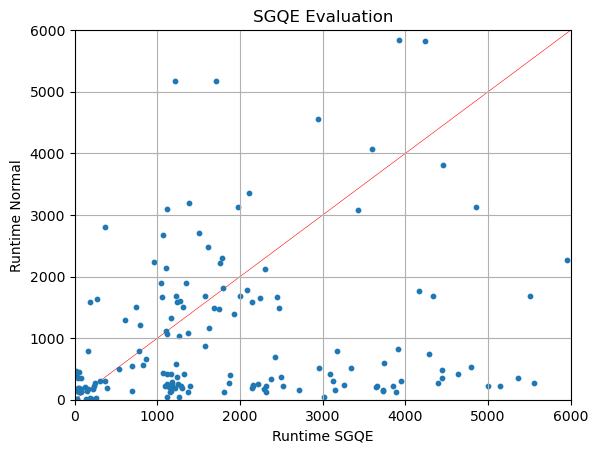

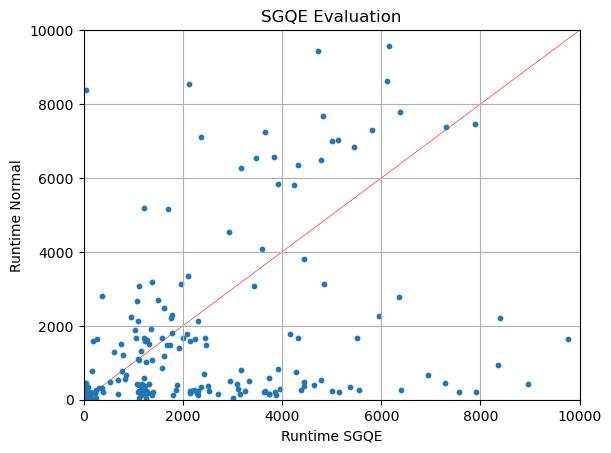

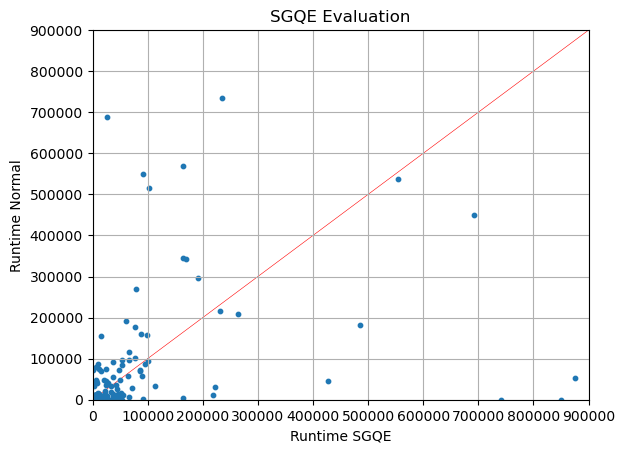

[ 1.61000000e+03 -9.80000000e+02 -1.89300000e+02 -7.90000000e+04
  1.00000000e+02 -3.58000000e+03  5.20000000e+02  4.60000000e+02
  4.60000000e+02 -5.00000000e+01 -9.30000000e+00  1.04000000e+01
  3.00000000e+02  1.10100000e+02 -3.61000000e+04 -3.50000000e+02
 -1.38000000e+01  1.37000000e+03 -6.18000000e+03  3.46000000e+03
 -6.12000000e+01  4.45700000e+02 -4.39000000e+01  3.98000000e+03
 -5.40000000e+02  3.52500000e+02 -3.20000000e+02  0.00000000e+00
 -2.24800000e+02  4.73000000e+03  0.00000000e+00 -3.83000000e+01
  1.70000000e+02  1.41000000e+03  8.00000000e+01  4.02100000e+02
 -2.00000000e+02 -1.07360000e+03  1.16000000e+03  1.25000000e+03
  7.53000000e+03  1.98000000e+03 -4.31000000e+03  4.27500000e+02
  3.69400000e+02 -1.70000000e+02  3.99200000e+02 -4.29000000e+04
  9.50000000e+01  1.04000000e+03  1.07000000e+04 -1.05000000e+04
 -4.50000000e+02  1.09900000e+02 -2.90000000e+02  3.08600000e+02
  3.97000000e+03  3.07000000e+03  1.58000000e+03  3.09000000e+03
  1.27300000e+03 -6.40100

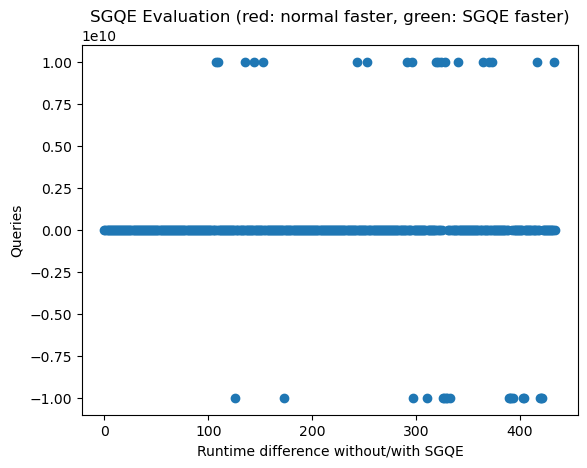

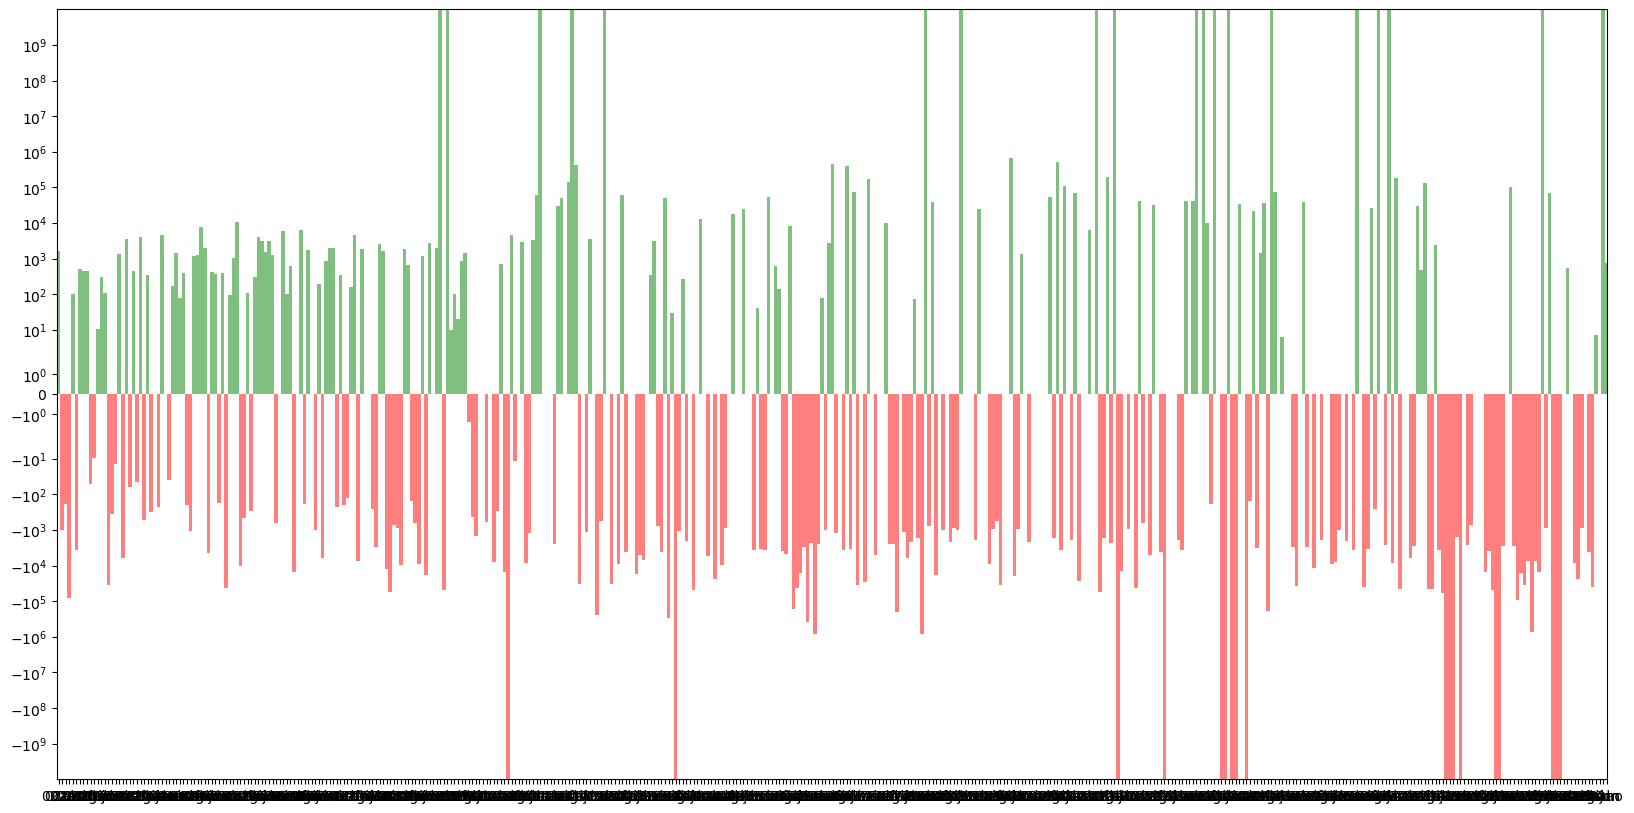

In [51]:
l_a = openFileByWildcard(os.path.join("./aggout/complete/", "times_results*")).readlines()
l_b = openFileByWildcard(os.path.join("./mergeout/basic/1/", "times_results*")).readlines()


l_a = fillMissingValues(l_a)
l_b = fillMissingValues(l_b)

val_a = [parseTimeToMS(r.split(";")[1]) for r in l_a]
val_b = [parseTimeToMS(r.split(";")[1]) for r in l_b]

scatterplot2(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation", "./SGQEEvalScatterPlot.png")
scatterplotWithLim(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation", "./SGQEEval10kScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a, val_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation", "./SGQEEval900kScatterPlot.png", 900000, 900000)



diffPlot2(val_a, val_b, "Runtime difference without/with SGQE", "Queries", "SGQE Evaluation (red: normal faster, green: SGQE faster)", "./SGQEEvalRTDiffPlot.png", queries)


In [52]:
a = np.array(val_a)
b = np.array(val_b)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -662200.0, maximal difference (with sign --> best for normal): 849658.0
average difference (negative --> SGQE better, positive --> normal better): 2913.913986928105
median difference (negative --> SGQE better, positive --> normal better): 495.0


In [53]:
a_better_count, b_better_count = countRT(val_a, val_b) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


125 180


In [54]:
a_better_count, b_better_count = count(maxmemlist1, maxmemlist2)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> normal better

32 274


In [55]:
a_better_count, b_better_count = count(maxdisklist1, maxdisklist2)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> tie

0 0


In [56]:
diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else e[2] for e in l]
#diffs = np.subtract(np.array(maxmemlist1), np.array(maxmemlist2))
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")


Values in MB
minimal difference (with sign --> best for SGQE): -5148.828933, maximal difference (with sign --> best for normal): 41632.709313
average difference (negative --> SGQE better, positive --> normal better): 2859.1967468528737
median difference (negative --> SGQE better, positive --> normal better): 187.254393


In [57]:
def countOccurrence(vals, val):
    c = 0
    for v in vals:
        if v == val:
            c = c + 1
    return c

In [58]:
# count unsolved
val_a_unsolved = countOccurrence(val_a, 9999999999.0)
val_b_unsolved = countOccurrence(val_b, 9999999999.0)

print(f"SGQE unsolved: {val_a_unsolved}, Normal unsolved: {val_b_unsolved}")
if val_a_unsolved < val_b_unsolved:
    print("SGQE better")
elif val_b_unsolved < val_a_unsolved:
    print("Normal better")

SGQE unsolved: 110, Normal unsolved: 111
SGQE better


[-9.86047884e+08 -4.81254157e+08 -2.01886815e+08 -4.16327093e+10
 -2.66827617e+09 -2.53434485e+09 -2.05143553e+08 -3.55397735e+08
 -2.05123260e+08 -2.53574369e+08 -1.94947380e+07 -8.58173980e+07
 -2.66620396e+09 -2.70256260e+07 -2.34429715e+10 -5.31550194e+08
 -2.55846830e+07 -1.44991879e+09 -6.64799697e+08  1.28296480e+08
 -5.14965410e+07  1.21325870e+07 -1.69802270e+07  6.39482870e+07
 -2.86632483e+08  1.37040070e+07 -1.51965082e+08  0.00000000e+00
 -2.73814660e+07 -1.44565397e+08  0.00000000e+00  5.53315200e+06
 -9.82340360e+07 -1.20964010e+09 -1.98280223e+09  1.07006670e+07
 -1.05498949e+10 -2.20633330e+07 -7.30825962e+08 -3.19857710e+07
 -8.28828295e+08  1.42061865e+08 -4.69589214e+09 -9.72636940e+07
  1.30570170e+07 -2.77635244e+08  9.74395700e+06 -3.52565321e+10
 -6.14731310e+07 -2.69946470e+07 -1.67143000e+10 -7.65208290e+09
 -5.02785288e+08 -2.06664170e+07 -1.48932327e+08 -2.70646660e+07
  3.35441141e+08 -8.27230560e+08  4.96065860e+07  3.22441678e+08
 -1.38984916e+08 -9.78449

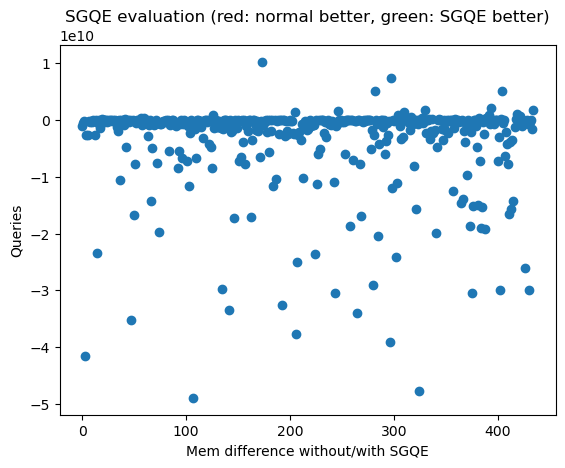

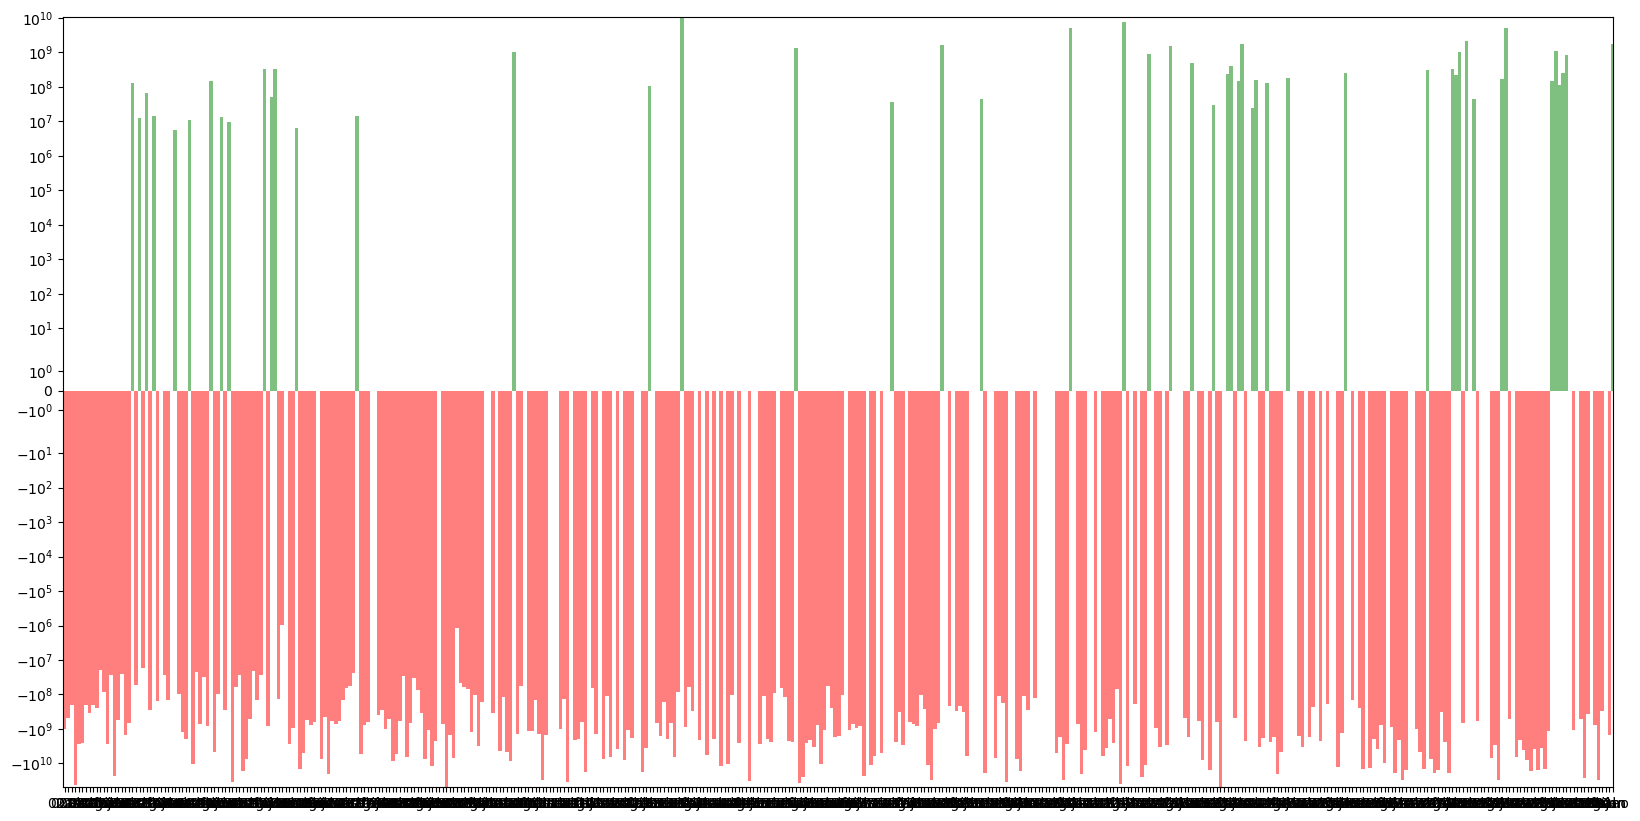

In [59]:
diffPlot2(maxmemlist1, maxmemlist2, "Mem difference without/with SGQE", "Queries", "SGQE evaluation (red: normal better, green: SGQE better)", "./SGQEEvalMemRGPlot.png", queries)


In [60]:
def diffPlot(normal, yan, xlabel, ylabel, title, pathToSave, xticks): 
  diffs = np.subtract(np.array(yan), np.array(normal))
  x = [x for x in range(0,len(normal))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(180.5, 10.5)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(normal)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()





In [61]:
def diffPlotPercent(diffs, xlabel, ylabel, title, pathToSave, xticks): 
  x = [x for x in range(0,len(diffs))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid()
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(diffs)+0.5)

  plt.xticks(x, labels=xticks)

  for i in range(0,len(diffs)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

In [62]:
def diffPlotPercent2(diffs, xlabel, ylabel, title, pathToSave, xticks):
  x = [x for x in range(0,len(diffs))]
  plt.scatter(x, diffs)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  #plt.grid()
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  print(np.min(diffs))
  plt.yscale('symlog')
  plt.ylim(np.min(diffs)-5,np.max(diffs)+5)
  plt.xlim(-0.5,len(normal)+0.5-100)
  plt.xticks(x, labels=xticks)

  for i in range(0,len(diffs)):
    if diffs[i]>0:
      #plt.fill_between(i, diffs[i], facecolor='green', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'g', alpha=.5)
    elif diffs[i]<0:
      #plt.fill_between(i, diffs[i], facecolor='red', alpha=.5)
      plt.fill([i-0.5,i+0.5,i+0.5,i-0.5],[diffs[i],diffs[i],0,0], 'r', alpha=.5)

  plt.savefig(pathToSave)
  plt.show()

In [63]:
def groupedBarChart(groupnames, valuedict, ylabel, title, widthfactor, pathToSave): # widthfactor is for moving the x labels
  x = np.arange(len(groupnames))  # the label locations
  width = 1/(len(valuedict)+1)#0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in valuedict.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=len(valuedict))
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(x + width*widthfactor, groupnames)
  ax.legend(loc='upper left', ncols=len(valuedict))
  ax.set_ylim(0, 250)

  plt.savefig(pathToSave)
  plt.show()

CyclicQueries

In [64]:
cyc = ['09ac', '11ag', '11al', '12am', '13aa', '13an', '14ai', '14am', '15an', '16al', '16am', '16ao', '17ab', '17ag', '18aj', '18an', '19ad', '19ak', '20ag', '21aa', '21ab', '21ad', '21ah', '21am', '22ak', '22am', '23ae', '23af', '23ag', '23aj', '23al', '23an', '23ao', '24ac', '24ad', '24ae', '24ah', '24ak', '24an', '25aa', '25ai', '25ao', '26ae', '26ag', '26aj', '26ak', '26an', '26ao', '27aa', '27ab', '27ac', '27ad', '27ag', '27ai', '27aj', '27ak', '27an', '27ao', '28aa', '28ab', '28ac', '28ad', '28af', '28ag', '28ah', '28an', '28ao', '29ab', '29ac', '29af', '29ag', '29ai', '29al', '29am', '29an', '29ao', '30aa', '30ab', '30ad', '30af', '30ah', '30ai', '30an', '30ao']

In [65]:
cyc

['09ac',
 '11ag',
 '11al',
 '12am',
 '13aa',
 '13an',
 '14ai',
 '14am',
 '15an',
 '16al',
 '16am',
 '16ao',
 '17ab',
 '17ag',
 '18aj',
 '18an',
 '19ad',
 '19ak',
 '20ag',
 '21aa',
 '21ab',
 '21ad',
 '21ah',
 '21am',
 '22ak',
 '22am',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '23al',
 '23an',
 '23ao',
 '24ac',
 '24ad',
 '24ae',
 '24ah',
 '24ak',
 '24an',
 '25aa',
 '25ai',
 '25ao',
 '26ae',
 '26ag',
 '26aj',
 '26ak',
 '26an',
 '26ao',
 '27aa',
 '27ab',
 '27ac',
 '27ad',
 '27ag',
 '27ai',
 '27aj',
 '27ak',
 '27an',
 '27ao',
 '28aa',
 '28ab',
 '28ac',
 '28ad',
 '28af',
 '28ag',
 '28ah',
 '28an',
 '28ao',
 '29ab',
 '29ac',
 '29af',
 '29ag',
 '29ai',
 '29al',
 '29am',
 '29an',
 '29ao',
 '30aa',
 '30ab',
 '30ad',
 '30af',
 '30ah',
 '30ai',
 '30an',
 '30ao']

In [66]:
_, val_a_cyc, maxmemlist1_cyc = getMatchingQueries(queries, val_a, maxmemlist1, cyc)
_, val_b_cyc, maxmemlist2_cyc = getMatchingQueries(queries, val_b, maxmemlist2, cyc)

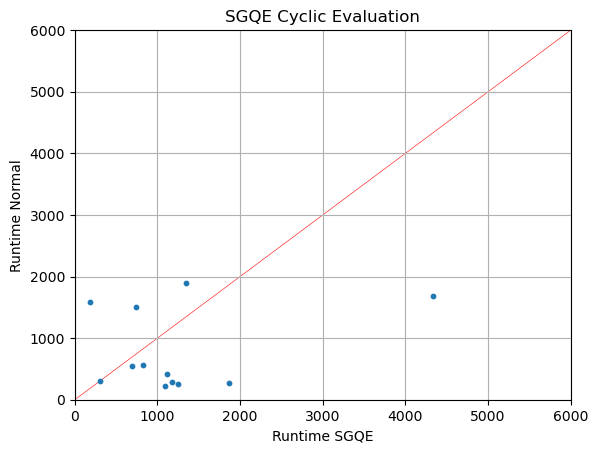

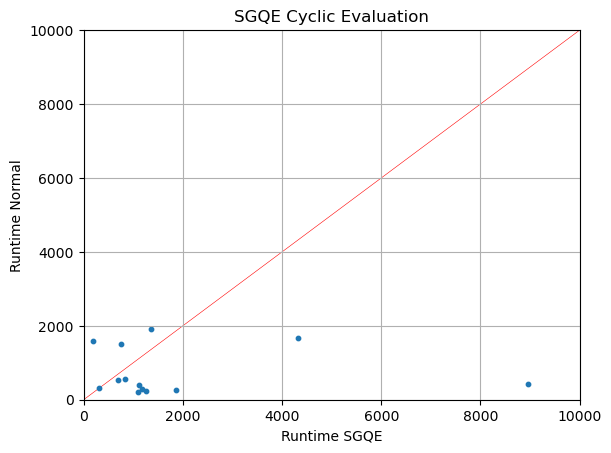

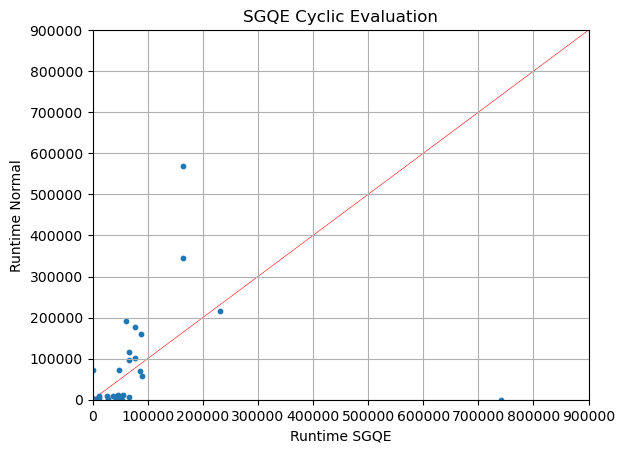

[ 9.99988480e+09  4.96000000e+04 -3.20000000e+04 -1.71000000e+04
  0.00000000e+00 -4.83600000e+04  0.00000000e+00  2.48000000e+04
 -1.59000000e+04  4.05300000e+05 -3.51000000e+03 -3.45000000e+04
 -2.93900000e+04  0.00000000e+00  0.00000000e+00  9.99994550e+09
  2.44000000e+04  0.00000000e+00  0.00000000e+00  7.05000000e+04
 -2.73679000e+04  0.00000000e+00 -5.40714000e+04 -9.99998660e+09
 -9.99999203e+09  0.00000000e+00  9.99995540e+09  0.00000000e+00
  9.99994850e+09  9.99987680e+09 -9.99999720e+09  9.99999959e+09
 -9.99999977e+09  0.00000000e+00 -9.99999980e+09 -1.52200000e+02
  1.40680000e+03  9.99995250e+09  6.20000000e+00  0.00000000e+00
  0.00000000e+00 -1.00080000e+03  9.99938870e+09 -4.10000000e+04
 -2.63900000e+02  9.99995940e+09  9.99957910e+09 -8.32000000e+03
  1.82000000e+05 -4.50984000e+04  0.00000000e+00  0.00000000e+00
  3.06000000e+04  1.31000000e+05 -4.58000000e+04 -4.48189000e+04
 -5.85300000e+04 -9.99999974e+09 -9.99999973e+09 -9.99999943e+09
 -1.59450000e+03 -9.99999

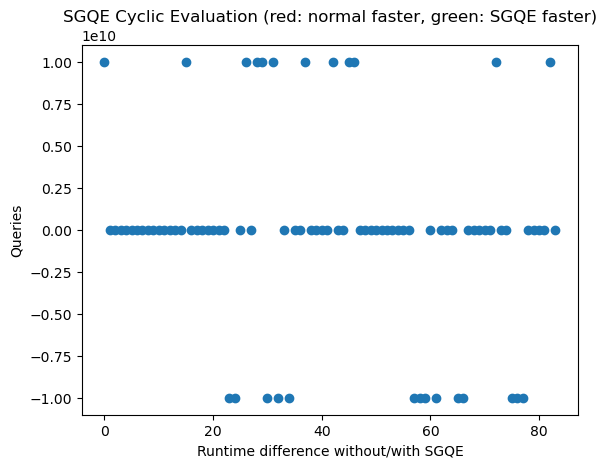

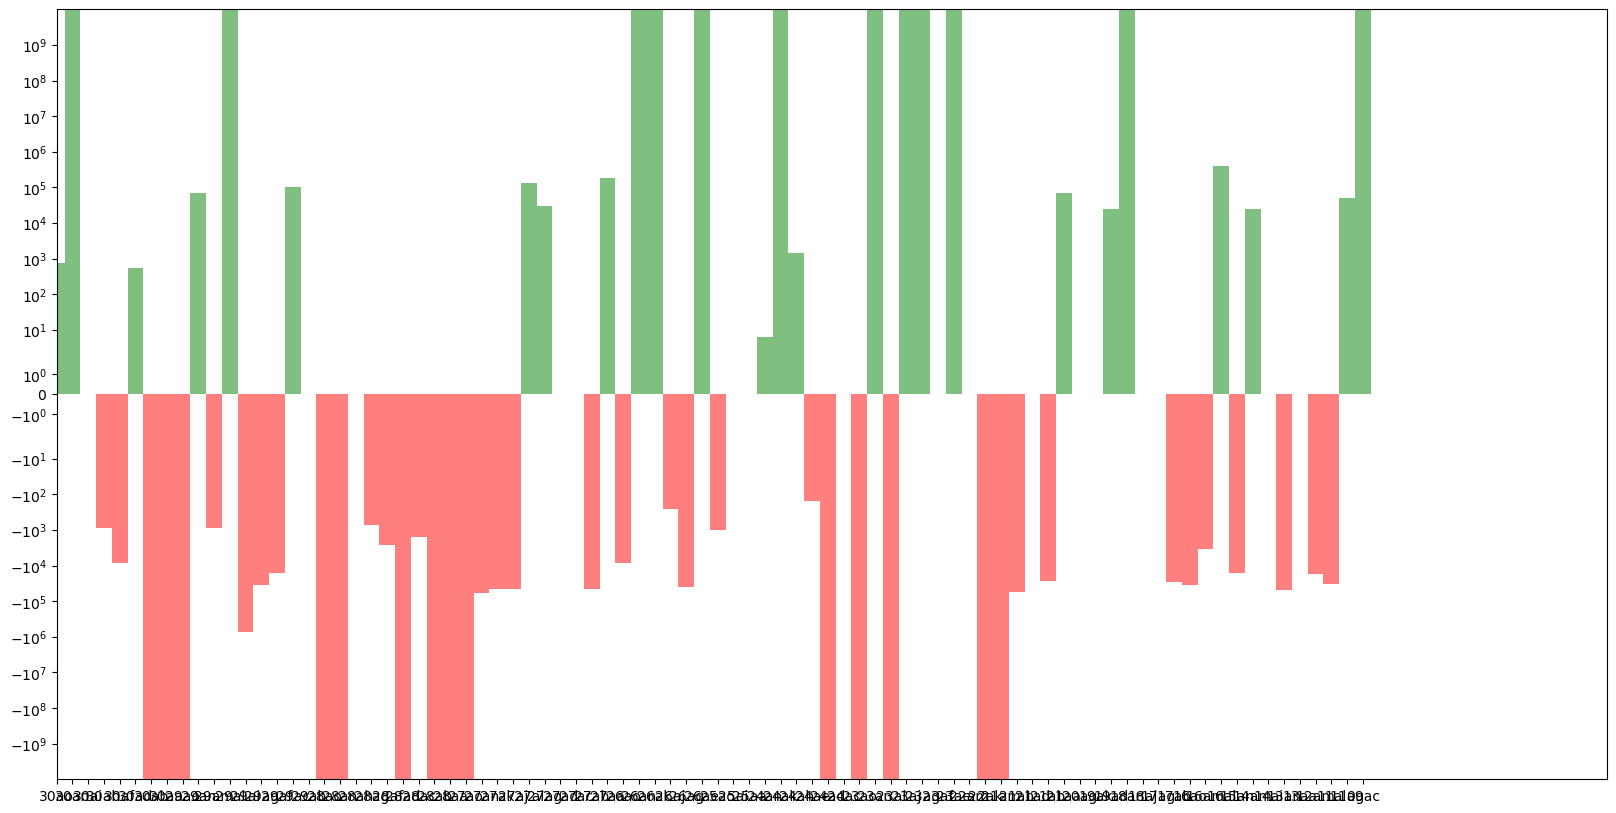

In [67]:
scatterplot2(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic Evaluation", "./SGQECyclicEvalScatterPlot.png")

scatterplotWithLim(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic Evaluation", "./SGQECyclic10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_cyc, val_b_cyc, "Runtime SGQE", "Runtime Normal", "SGQE Cyclic Evaluation", "./SGQECyclic900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_cyc, val_b_cyc, "Runtime difference without/with SGQE", "Queries", "SGQE Cyclic Evaluation (red: normal faster, green: SGQE faster)", "./SGQECyclicEvalRTDiffPlot.png", cyc)


In [68]:
a = np.array(val_a_cyc)
b = np.array(val_b_cyc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; cyclic queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; cyclic queries)
minimal difference (with sign --> best for SGQE): -405300.0, maximal difference (with sign --> best for normal): 741145.4
average difference (negative --> SGQE better, positive --> normal better): 5423.275609756098
median difference (negative --> SGQE better, positive --> normal better): 1594.5


In [69]:
a_better_count, b_better_count = countRT(val_a_cyc, val_b_cyc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


14 27


In [70]:
a_better_count, b_better_count = count(maxmemlist1_cyc, maxmemlist2_cyc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

8 33


In [71]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_cyc, maxmemlist2_cyc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -1714.898267, maximal difference (with sign --> best for normal): 33445.059461
average difference (negative --> SGQE better, positive --> normal better): 4426.95329002381
median difference (negative --> SGQE better, positive --> normal better): 0.0


In [72]:
# count unsolved
val_a_cyc_unsolved = countOccurrence(val_a_cyc, 9999999999.0)
val_b_cyc_unsolved = countOccurrence(val_b_cyc, 9999999999.0)

print(f"SGQE unsolved: {val_a_cyc_unsolved}, Normal unsolved: {val_b_cyc_unsolved}")
if val_a_cyc_unsolved < val_b_cyc_unsolved:
    print("SGQE better")
elif val_b_cyc_unsolved < val_a_cyc_unsolved:
    print("Normal better")

SGQE unsolved: 31, Normal unsolved: 29
Normal better


In [73]:
# unsolved by normal:
[cyc[i] for i in range(len(val_b_cyc)) if val_b_cyc[i] >= 9999999999 ]


['09ac',
 '13aa',
 '14ai',
 '17ag',
 '18aj',
 '18an',
 '19ak',
 '20ag',
 '21ad',
 '22am',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '23an',
 '24ac',
 '24ak',
 '25aa',
 '25ai',
 '26ae',
 '26ak',
 '26an',
 '27ac',
 '27ad',
 '28ah',
 '29ab',
 '29al',
 '30ai',
 '30an']

In [74]:
# unsolved by SGQE:
[cyc[i] for i in range(len(val_a_cyc)) if val_a_cyc[i] >= 9999999999 ]

['13aa',
 '14ai',
 '17ag',
 '18aj',
 '19ak',
 '20ag',
 '21ad',
 '21am',
 '22ak',
 '22am',
 '23af',
 '23al',
 '23ao',
 '24ac',
 '24ad',
 '25aa',
 '25ai',
 '27ac',
 '27ad',
 '27ao',
 '28aa',
 '28ab',
 '28ad',
 '28ah',
 '28an',
 '28ao',
 '29ab',
 '29ao',
 '30aa',
 '30ab',
 '30ai']

AcyclicQueries

In [75]:
acyc = [q for q in queries if q not in cyc]

In [76]:
acyc

['02aa',
 '02ab',
 '02ac',
 '02ad',
 '02ae',
 '02af',
 '02ag',
 '02ah',
 '02ai',
 '02aj',
 '02ak',
 '02al',
 '02am',
 '02an',
 '02ao',
 '03aa',
 '03ab',
 '03ac',
 '03ad',
 '03ae',
 '03af',
 '03ag',
 '03ah',
 '03ai',
 '03aj',
 '03ak',
 '03al',
 '03am',
 '03an',
 '03ao',
 '04aa',
 '04ab',
 '04ac',
 '04ad',
 '04ae',
 '04af',
 '04ag',
 '04ah',
 '04ai',
 '04aj',
 '04ak',
 '04al',
 '04am',
 '04an',
 '04ao',
 '05aa',
 '05ab',
 '05ac',
 '05ad',
 '05ae',
 '05af',
 '05ag',
 '05ah',
 '05ai',
 '05aj',
 '05ak',
 '05al',
 '05am',
 '05an',
 '05ao',
 '06aa',
 '06ab',
 '06ac',
 '06ad',
 '06ae',
 '06af',
 '06ag',
 '06ah',
 '06ai',
 '06aj',
 '06ak',
 '06al',
 '06am',
 '06an',
 '06ao',
 '07aa',
 '07ab',
 '07ac',
 '07ad',
 '07ae',
 '07af',
 '07ag',
 '07ah',
 '07ai',
 '07aj',
 '07ak',
 '07al',
 '07am',
 '07an',
 '07ao',
 '08aa',
 '08ab',
 '08ac',
 '08ad',
 '08ae',
 '08af',
 '08ag',
 '08ah',
 '08ai',
 '08aj',
 '08ak',
 '08al',
 '08am',
 '08an',
 '08ao',
 '09aa',
 '09ab',
 '09ad',
 '09ae',
 '09af',
 '09ag',
 

In [77]:
_, val_a_acyc, maxmemlist1_acyc = getMatchingQueries(queries, val_a, maxmemlist1, acyc)
_, val_b_acyc, maxmemlist2_acyc = getMatchingQueries(queries, val_b, maxmemlist2, acyc)

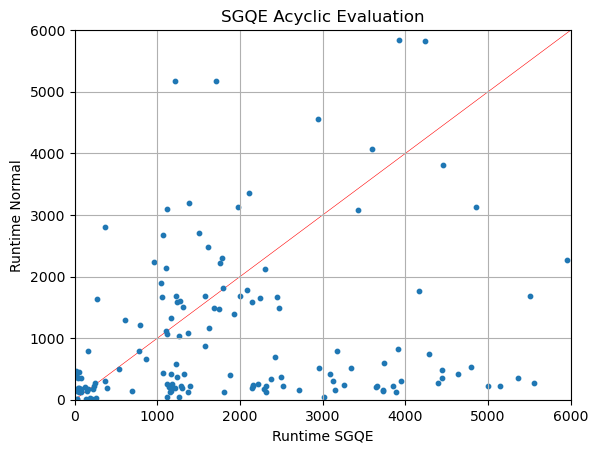

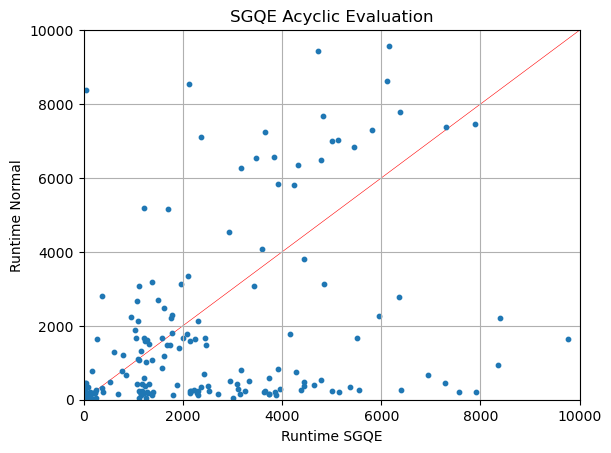

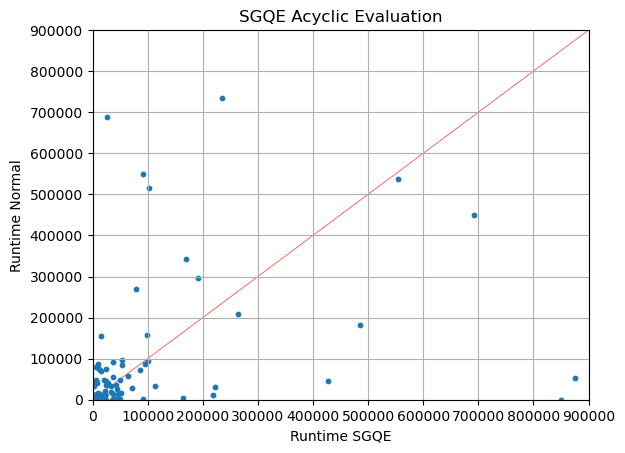

[ 1.61000000e+03 -9.80000000e+02 -1.89300000e+02 -7.90000000e+04
  1.00000000e+02 -3.58000000e+03  5.20000000e+02  4.60000000e+02
  4.60000000e+02 -5.00000000e+01 -9.30000000e+00  1.04000000e+01
  3.00000000e+02  1.10100000e+02 -3.61000000e+04 -3.50000000e+02
 -1.38000000e+01  1.37000000e+03 -6.18000000e+03  3.46000000e+03
 -6.12000000e+01  4.45700000e+02 -4.39000000e+01  3.98000000e+03
 -5.40000000e+02  3.52500000e+02 -3.20000000e+02  0.00000000e+00
 -2.24800000e+02  4.73000000e+03  0.00000000e+00 -3.83000000e+01
  1.70000000e+02  1.41000000e+03  8.00000000e+01  4.02100000e+02
 -2.00000000e+02 -1.07360000e+03  1.16000000e+03  1.25000000e+03
  7.53000000e+03  1.98000000e+03 -4.31000000e+03  4.27500000e+02
  3.69400000e+02 -1.70000000e+02  3.99200000e+02 -4.29000000e+04
  9.50000000e+01  1.04000000e+03  1.07000000e+04 -1.05000000e+04
 -4.50000000e+02  1.09900000e+02 -2.90000000e+02  3.08600000e+02
  3.97000000e+03  3.07000000e+03  1.58000000e+03  3.09000000e+03
  1.27300000e+03 -6.40100

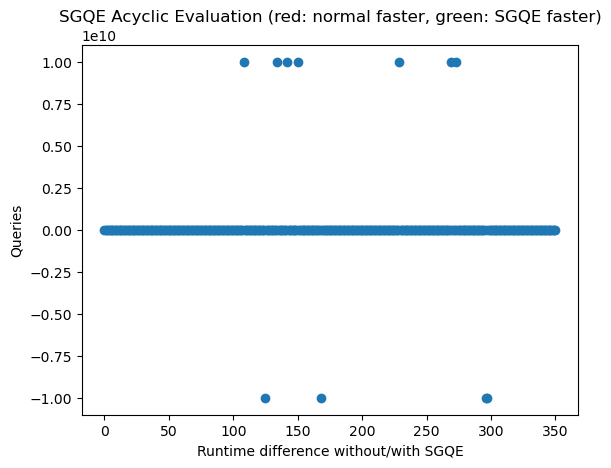

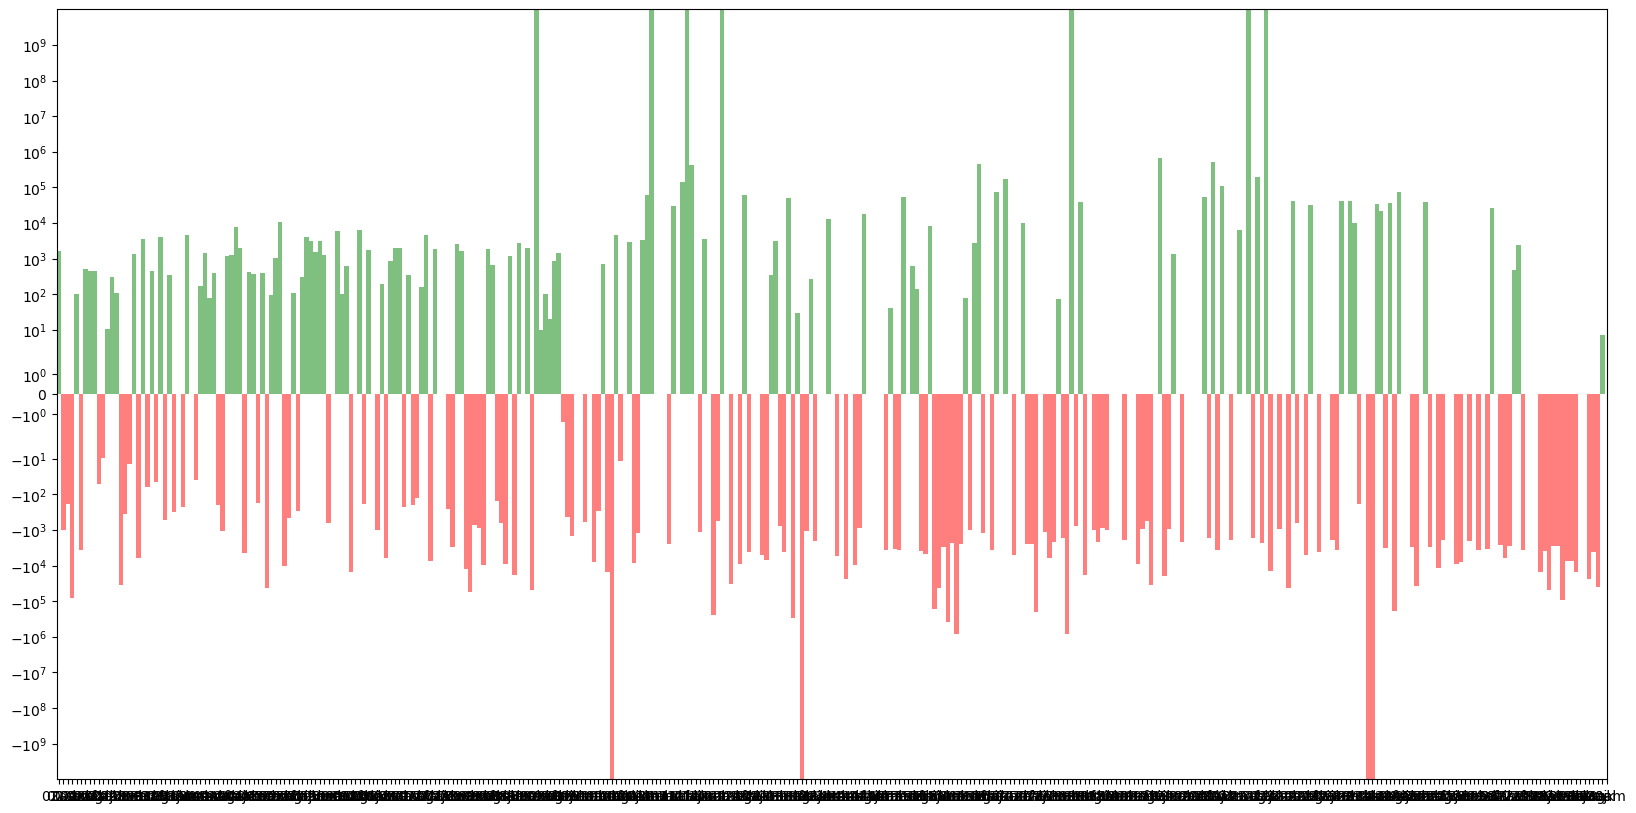

In [78]:
scatterplot2(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic Evaluation", "./SGQEAcyclicEvalScatterPlot.png")
scatterplotWithLim(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic Evaluation", "./SGQEAcyclic10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_acyc, val_b_acyc, "Runtime SGQE", "Runtime Normal", "SGQE Acyclic Evaluation", "./SGQEAcyclic900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_acyc, val_b_acyc, "Runtime difference without/with SGQE", "Queries", "SGQE Acyclic Evaluation (red: normal faster, green: SGQE faster)", "./SGQEAcyclicEvalRTDiffPlot.png", acyc)


In [79]:
a = np.array(val_a_acyc)
b = np.array(val_b_acyc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; acyclic queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -662200.0, maximal difference (with sign --> best for normal): 849658.0
average difference (negative --> SGQE better, positive --> normal better): 2525.6731320754716
median difference (negative --> SGQE better, positive --> normal better): 300.0


In [80]:
a_better_count, b_better_count = countRT(val_a_acyc, val_b_acyc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


111 153


In [81]:
a_better_count, b_better_count = count(maxmemlist1_acyc, maxmemlist2_acyc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

24 241


In [82]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_acyc, maxmemlist2_acyc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -5148.828933, maximal difference (with sign --> best for normal): 41632.709313
average difference (negative --> SGQE better, positive --> normal better): 2484.0071467777775
median difference (negative --> SGQE better, positive --> normal better): 246.49636


In [83]:
# count unsolved
val_a_acyc_unsolved = countOccurrence(val_a_acyc, 9999999999.0)
val_b_acyc_unsolved = countOccurrence(val_b_acyc, 9999999999.0)

print(f"SGQE unsolved: {val_a_acyc_unsolved}, Normal unsolved: {val_b_acyc_unsolved}")
if val_a_acyc_unsolved < val_b_acyc_unsolved:
    print("SGQE better")
elif val_b_acyc_unsolved < val_a_acyc_unsolved:
    print("Normal better")

SGQE unsolved: 79, Normal unsolved: 82
SGQE better


In [84]:
# unsolved by normal:
[acyc[i] for i in range(len(val_b_acyc)) if val_b_acyc[i] >= 9999999999 ]


['03am',
 '04aa',
 '06ac',
 '06al',
 '07al',
 '07am',
 '09aa',
 '09ae',
 '09an',
 '09ao',
 '10ab',
 '10aj',
 '11aa',
 '11ab',
 '11ac',
 '11ad',
 '11ah',
 '11aj',
 '11am',
 '12aa',
 '12ad',
 '12ae',
 '12ag',
 '12ak',
 '12al',
 '13am',
 '13ao',
 '14ab',
 '14ad',
 '14af',
 '14ak',
 '14al',
 '14an',
 '14ao',
 '15af',
 '16aj',
 '17aa',
 '17ad',
 '17af',
 '17al',
 '18ad',
 '18ah',
 '18ao',
 '19aa',
 '19ab',
 '19ae',
 '19af',
 '19al',
 '20ab',
 '20ad',
 '20ae',
 '20af',
 '20ah',
 '20an',
 '21ac',
 '21af',
 '21ag',
 '21al',
 '21ao',
 '22ab',
 '22af',
 '22ai',
 '22al',
 '22an',
 '23ac',
 '23ak',
 '24am',
 '24ao',
 '25ad',
 '25ag',
 '25ak',
 '25al',
 '26aa',
 '26ac',
 '26af',
 '26al',
 '28ae',
 '28ai',
 '28aj',
 '30ac',
 '30ae',
 '30am']

In [85]:
# unsolved by SGQE:
[acyc[i] for i in range(len(val_a_acyc)) if val_a_acyc[i] >= 9999999999 ]

['03am',
 '04aa',
 '06ac',
 '06al',
 '07al',
 '07am',
 '09aa',
 '09an',
 '09ao',
 '10ab',
 '10ag',
 '10aj',
 '11ab',
 '11ac',
 '11ad',
 '11ah',
 '11am',
 '12aa',
 '12ae',
 '12ag',
 '12ak',
 '12al',
 '13ai',
 '13am',
 '13ao',
 '14ab',
 '14ad',
 '14af',
 '14ak',
 '14al',
 '14an',
 '14ao',
 '15af',
 '16aj',
 '17aa',
 '17ad',
 '17af',
 '17al',
 '18ah',
 '18ao',
 '19aa',
 '19ab',
 '19ae',
 '19af',
 '19al',
 '20ab',
 '20ad',
 '20ae',
 '20af',
 '20ah',
 '20an',
 '21ac',
 '21af',
 '21ao',
 '22ab',
 '22af',
 '22ai',
 '22al',
 '22an',
 '23ac',
 '23ak',
 '23am',
 '24aa',
 '24am',
 '24ao',
 '25ad',
 '25ag',
 '25ak',
 '25al',
 '26aa',
 '26ac',
 '26af',
 '26al',
 '28ae',
 '28ai',
 '28aj',
 '30ac',
 '30ae',
 '30am']

Split data into 10 groups

In [86]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+np.min([i, m]):(i+1)*k+np.min([i+1, m])] for i in range(n))

Group 0
Queries: 02aa, 02ab, 02ac, 02ad, 02ae, 02af, 02ag, 02ah, 02ai, 02aj, 02ak, 02al, 02am, 02an, 02ao, 03aa, 03ab, 03ac, 03ad, 03ae, 03af, 03ag, 03ah, 03ai, 03aj, 03ak, 03al, 03am, 03an, 03ao, 04aa, 04ab, 04ac, 04ad, 04ae, 04af, 04ag, 04ah, 04ai, 04aj, 04ak, 04al, 04am, 04an


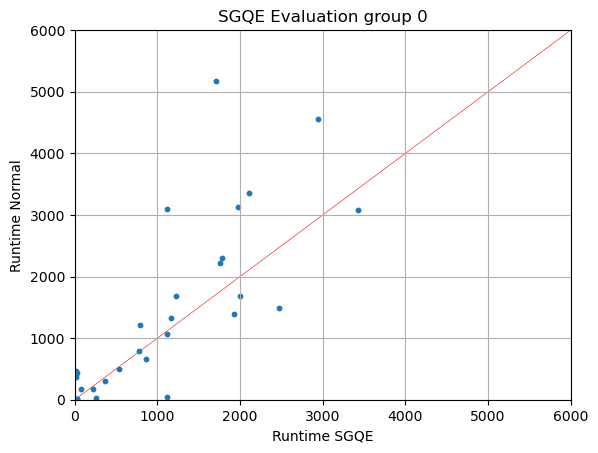

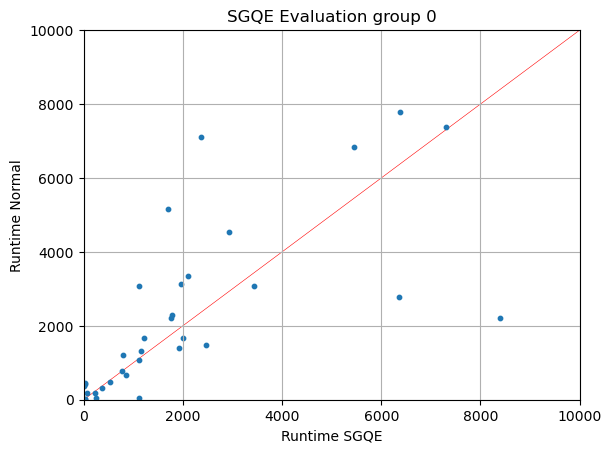

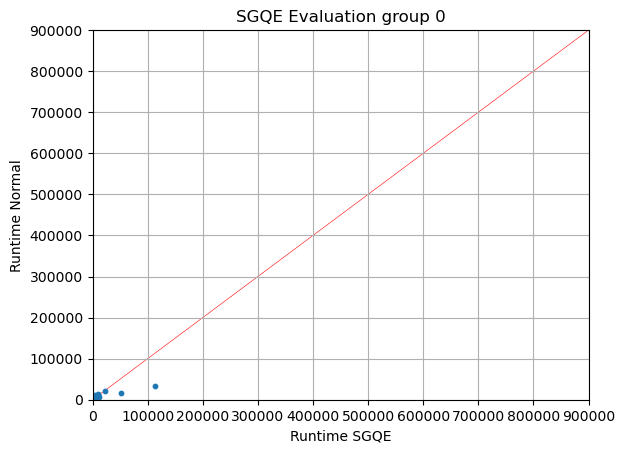

[ 1.6100e+03 -9.8000e+02 -1.8930e+02 -7.9000e+04  1.0000e+02 -3.5800e+03
  5.2000e+02  4.6000e+02  4.6000e+02 -5.0000e+01 -9.3000e+00  1.0400e+01
  3.0000e+02  1.1010e+02 -3.6100e+04 -3.5000e+02 -1.3800e+01  1.3700e+03
 -6.1800e+03  3.4600e+03 -6.1200e+01  4.4570e+02 -4.3900e+01  3.9800e+03
 -5.4000e+02  3.5250e+02 -3.2000e+02  0.0000e+00 -2.2480e+02  4.7300e+03
  0.0000e+00 -3.8300e+01  1.7000e+02  1.4100e+03  8.0000e+01  4.0210e+02
 -2.0000e+02 -1.0736e+03  1.1600e+03  1.2500e+03  7.5300e+03  1.9800e+03
 -4.3100e+03  4.2750e+02]
-79000.0


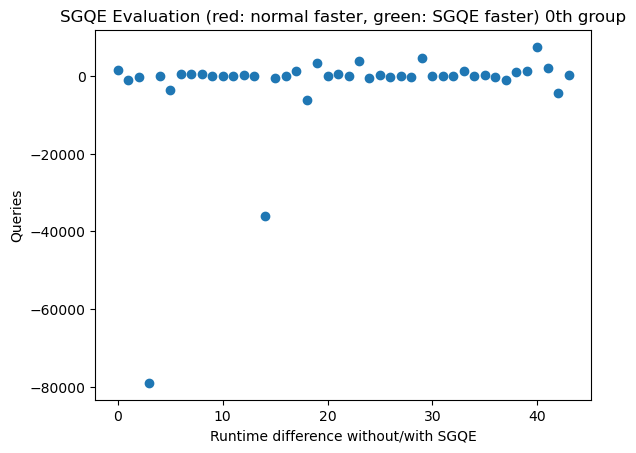

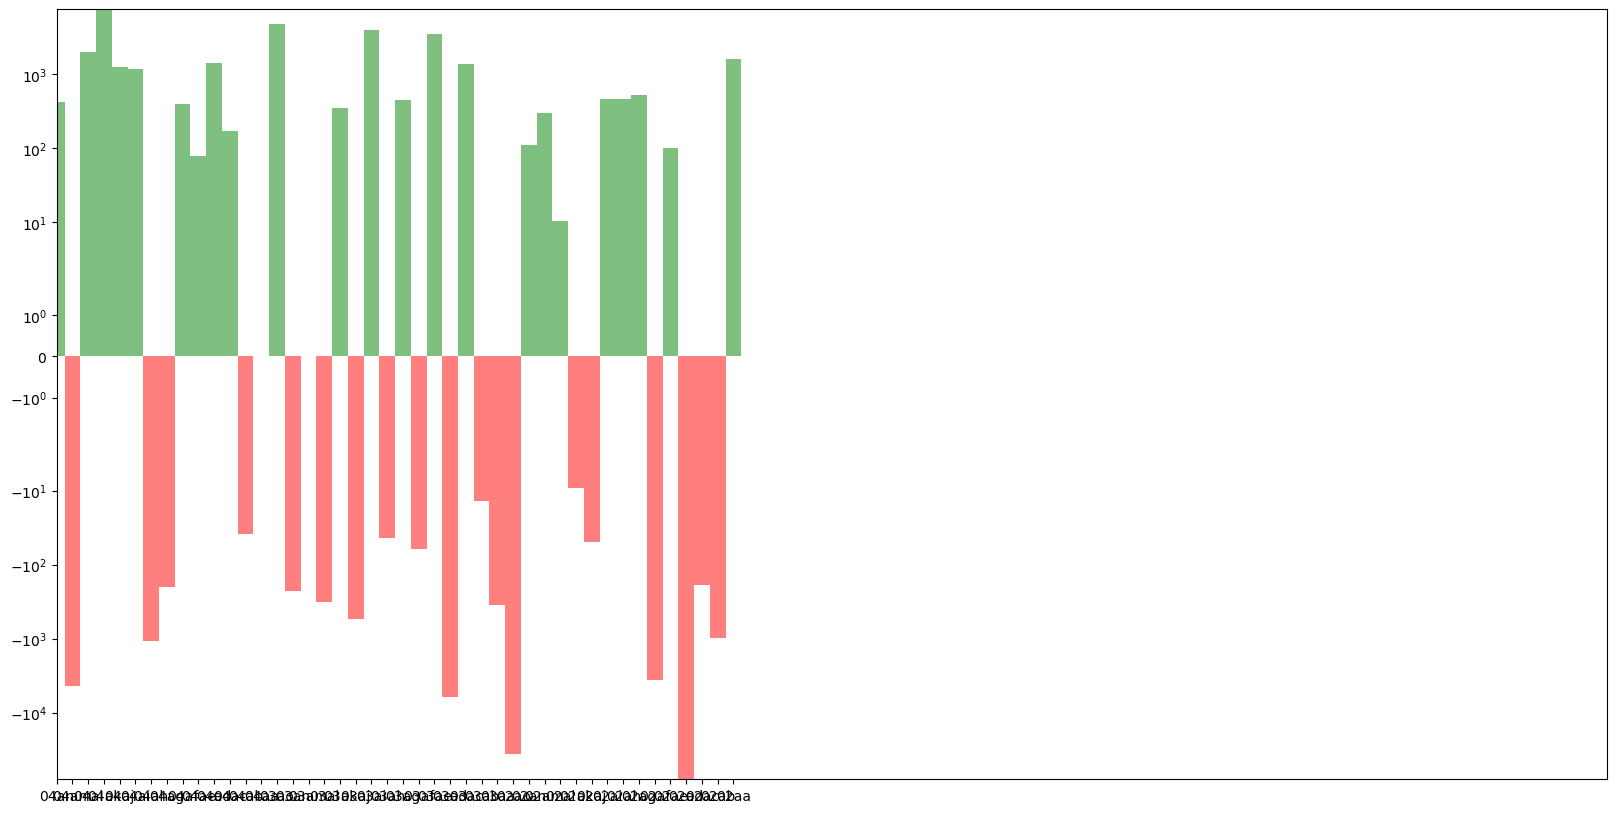

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -7530.0, maximal difference (with sign --> best for normal): 79000.0
average difference (negative --> SGQE better, positive --> normal better): 2403.47380952381
median difference (negative --> SGQE better, positive --> normal better): -90.0
--------
Runtime count: left: SGQE better, right: Normal better
23 19
--------
Memory count: left: SGQE better, right: Normal better
7 35
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -142.061865, maximal difference (with sign --> best for normal): 41632.709313
average difference (negative --> SGQE better, positive --> normal better): 2249.709074386363
median difference (negative --> SGQE better, positive --> normal better): 176.9259485
--------
SGQE unsolved: 2, Normal unsolved: 2
--------
Unsolved by normal
['03am', '04aa']
--------
unsolved by SGQE
['03am

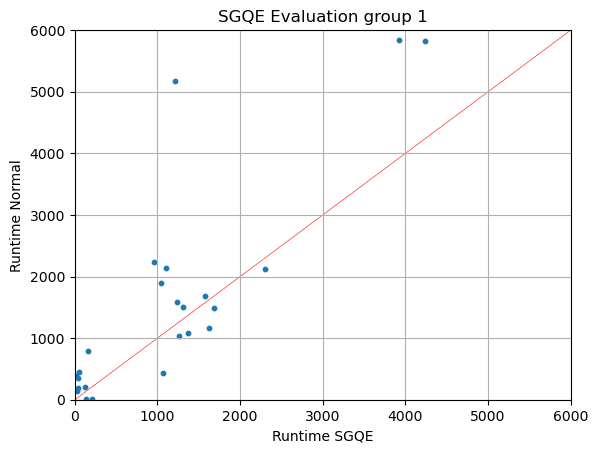

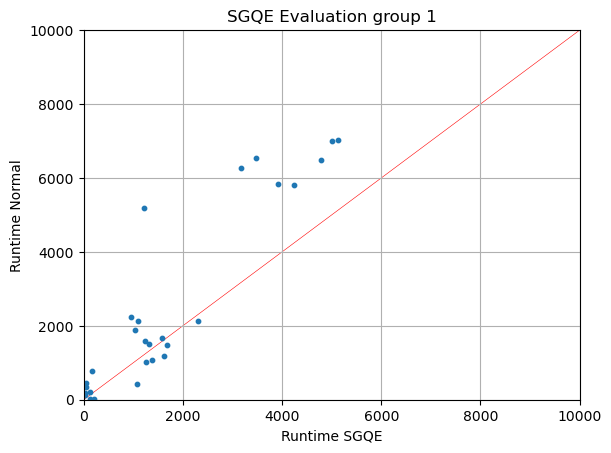

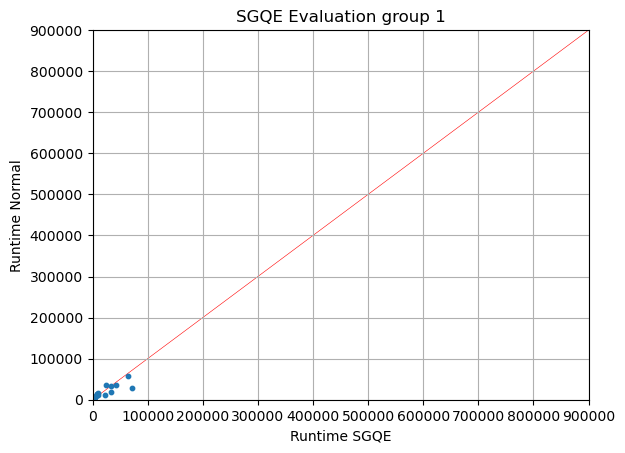

[   369.4    -170.      399.2  -42900.       95.     1040.    10700.
 -10500.     -450.      109.9    -290.      308.6    3970.     3070.
   1580.     3090.     1273.     -640.1       0.     5800.      100.
    628.1  -15200.        0.     6180.     -190.     1690.        0.
  -1000.      190.    -6000.      850.     1920.     2010.     -230.
    350.     -201.88   -127.1     158.4    4450.    -7300.     1890.
      0.        0.  ]
-42900.0


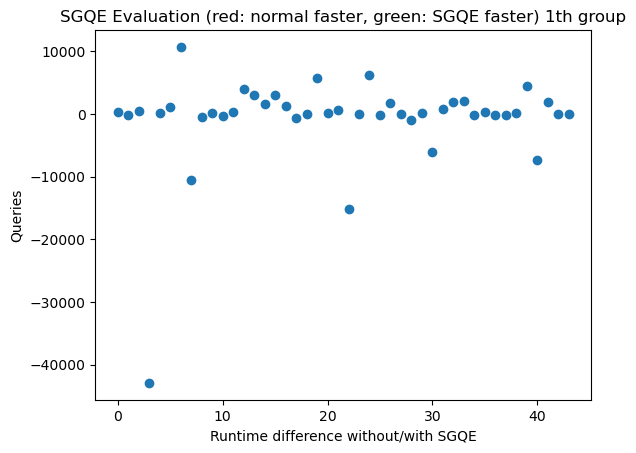

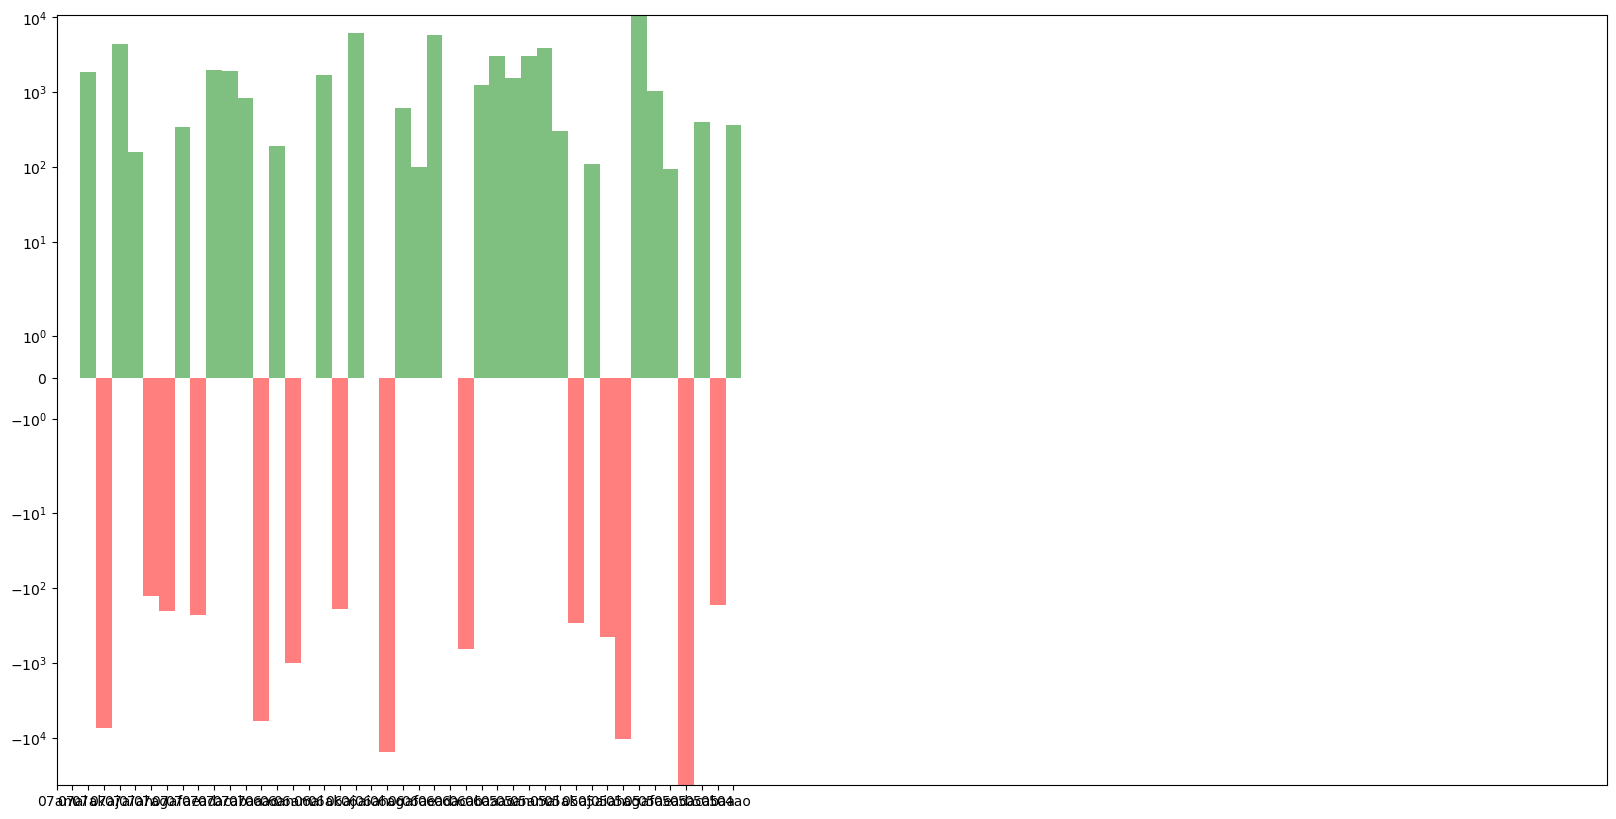

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -10700.0, maximal difference (with sign --> best for normal): 42900.0
average difference (negative --> SGQE better, positive --> normal better): 824.4370000000001
median difference (negative --> SGQE better, positive --> normal better): -249.29999999999998
--------
Runtime count: left: SGQE better, right: Normal better
25 14
--------
Memory count: left: SGQE better, right: Normal better
7 33
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -335.441141, maximal difference (with sign --> best for normal): 35256.532146
average difference (negative --> SGQE better, positive --> normal better): 2780.779698704545
median difference (negative --> SGQE better, positive --> normal better): 213.3945765
--------
SGQE unsolved: 4, Normal unsolved: 4
--------
Unsolved by normal
['06ac', '06al', '07al', '07am']


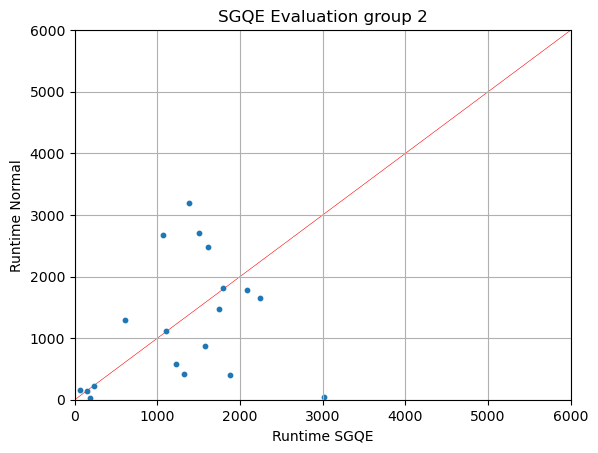

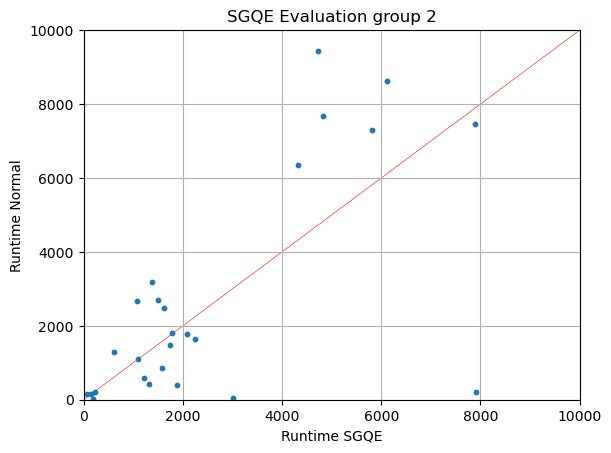

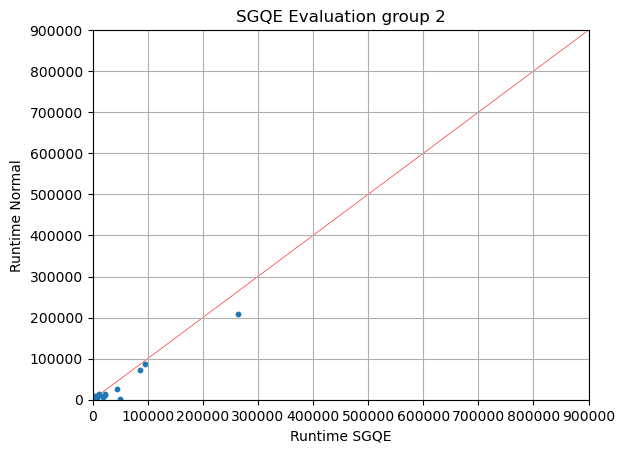

[-2.6000000e+02 -2.9800000e+03  2.4900000e+03  1.6100000e+03
 -1.2300000e+04 -5.6000000e+04 -7.1550000e+02 -8.9610000e+02
 -9.9000000e+03  1.8100000e+03  6.8200000e+02 -1.5850000e+02
 -6.4100000e+02 -9.3000000e+03  1.2000000e+03 -1.7900000e+04
  2.7000000e+03  0.0000000e+00  2.0100000e+03  9.9998848e+09
 -4.6980000e+04  9.9995228e+09  1.0000000e+01  1.0190000e+02
  2.0000000e+01  8.7000000e+02  1.4700000e+03 -1.4000000e+00
 -4.4000000e+02 -1.4828000e+03  0.0000000e+00  0.0000000e+00
 -5.9000000e+02  0.0000000e+00 -7.6907000e+03 -3.0000000e+02
  7.0000000e+02 -1.5500000e+04 -9.9992787e+09  4.7000000e+03
 -1.1400000e+01  0.0000000e+00  2.8400000e+03 -8.5000000e+03]
-9999278699.0


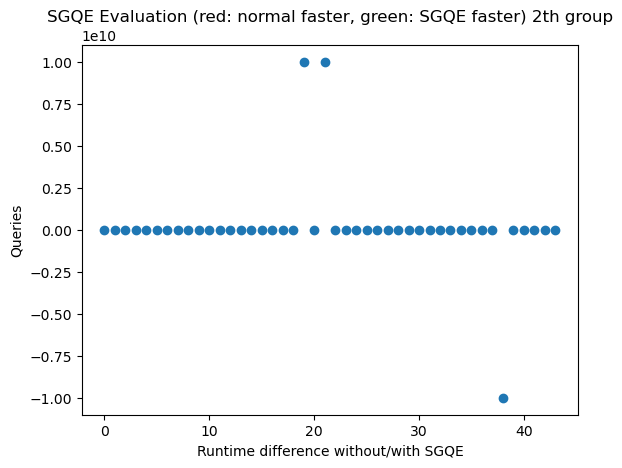

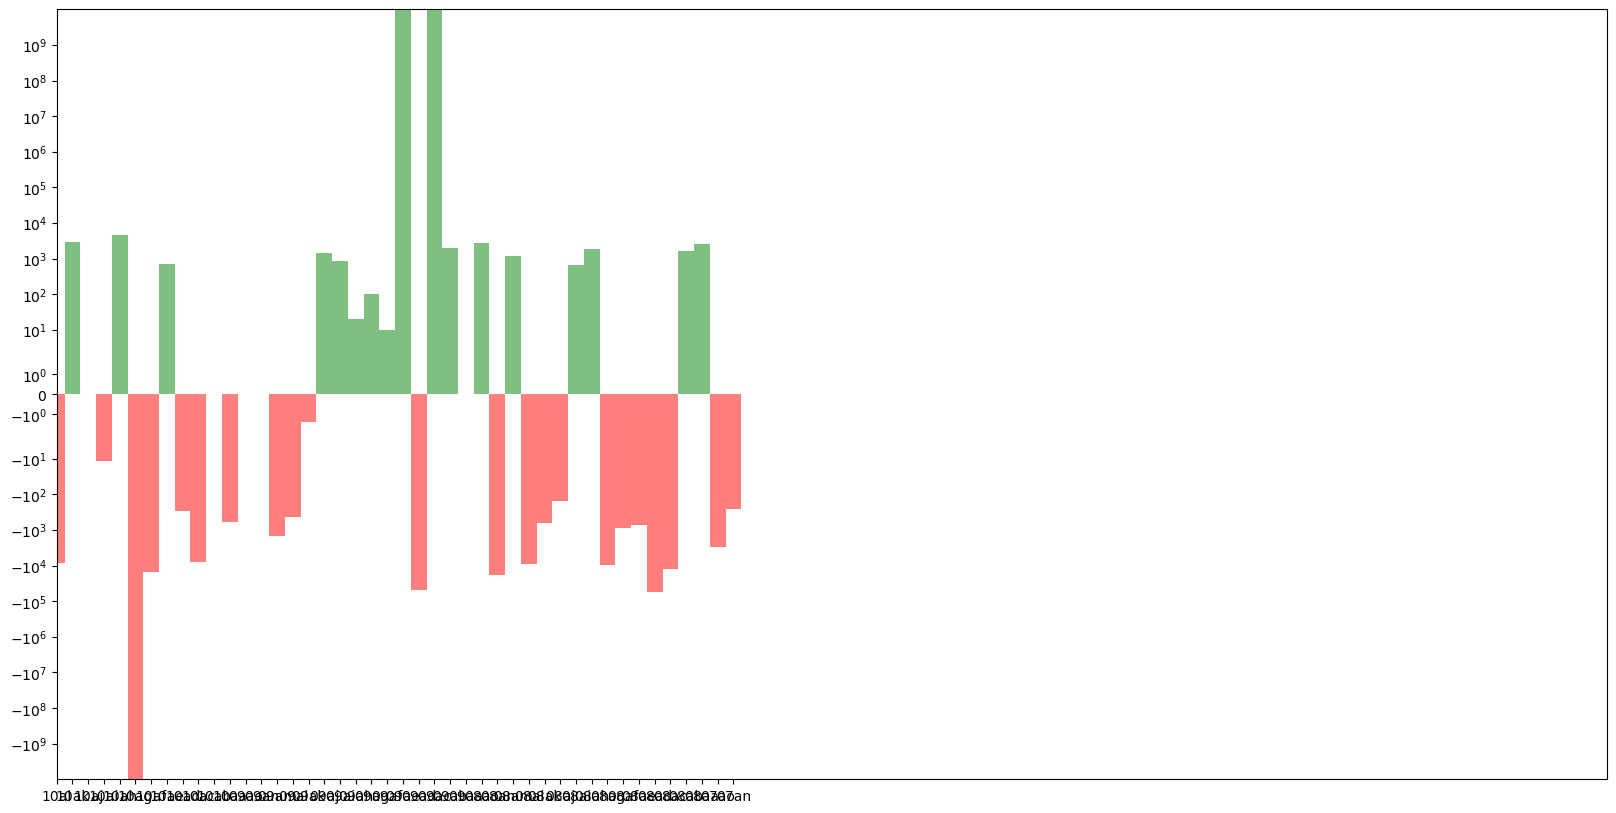

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -4700.0, maximal difference (with sign --> best for normal): 56000.0
average difference (negative --> SGQE better, positive --> normal better): 4703.708333333333
median difference (negative --> SGQE better, positive --> normal better): 209.25
--------
Runtime count: left: SGQE better, right: Normal better
15 21
--------
Memory count: left: SGQE better, right: Normal better
0 36
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): 0.0, maximal difference (with sign --> best for normal): 11519.103859
average difference (negative --> SGQE better, positive --> normal better): 1706.930910568182
median difference (negative --> SGQE better, positive --> normal better): 374.361281
--------
SGQE unsolved: 6, Normal unsolved: 7
SGQE better
--------
Unsolved by normal
['09aa', '09ac', '09ae', '09an', '09ao', '10

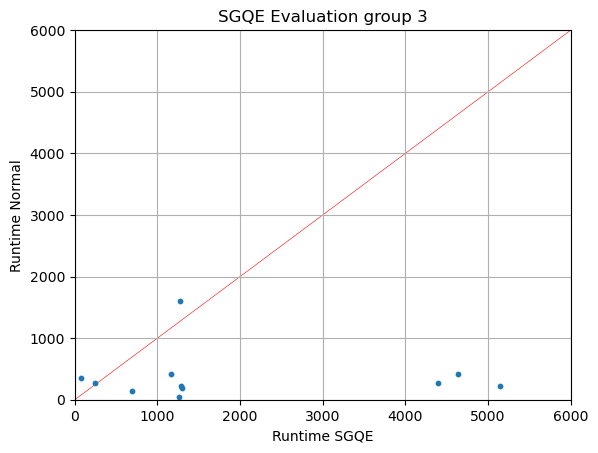

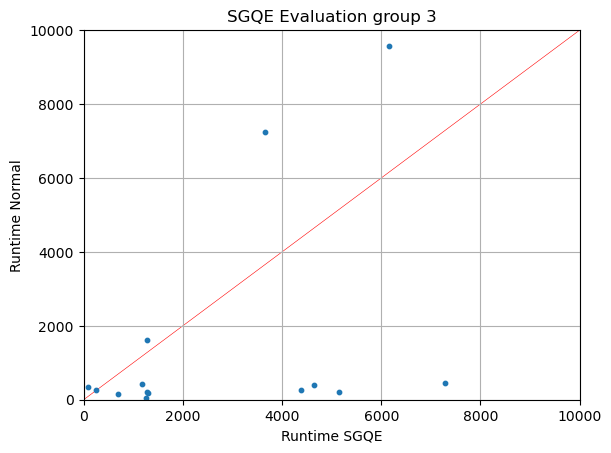

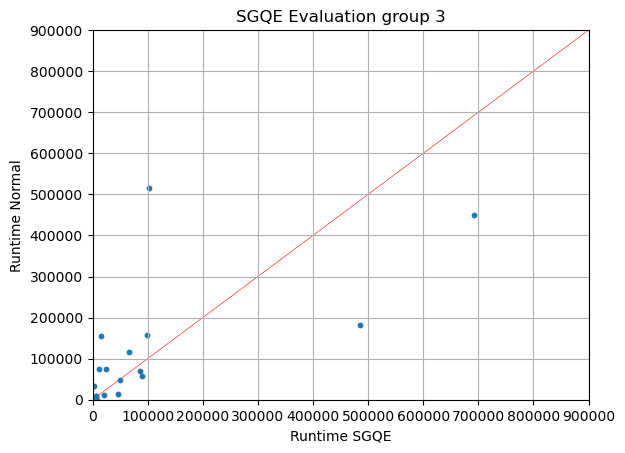

[-1.2210000e+03  3.4100000e+03  5.9300000e+04  9.9995855e+09
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -2.5000000e+03
  2.9290000e+04  4.9600000e+04  0.0000000e+00  1.3860000e+05
  9.9991047e+09  4.1380000e+05 -3.2000000e+04  0.0000000e+00
 -1.1143000e+03  3.5900000e+03  0.0000000e+00 -2.4350000e+05
 -5.5050000e+02  9.9998943e+09  0.0000000e+00 -3.2700000e+04
  0.0000000e+00 -9.2000000e+03  6.2700000e+04 -4.1231000e+03
  0.0000000e+00  0.0000000e+00 -1.7100000e+04 -4.9200000e+03
 -6.8231000e+03  0.0000000e+00  3.4000000e+02  3.0800000e+03
 -7.5560000e+02 -4.2303000e+03  5.1200000e+04 -3.0390000e+05
  2.9700000e+01 -9.9998539e+09 -1.0603000e+03  2.7260000e+02]
-9999853899.0


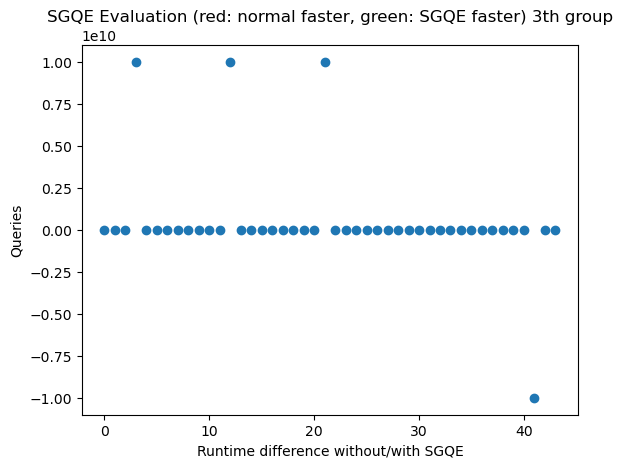

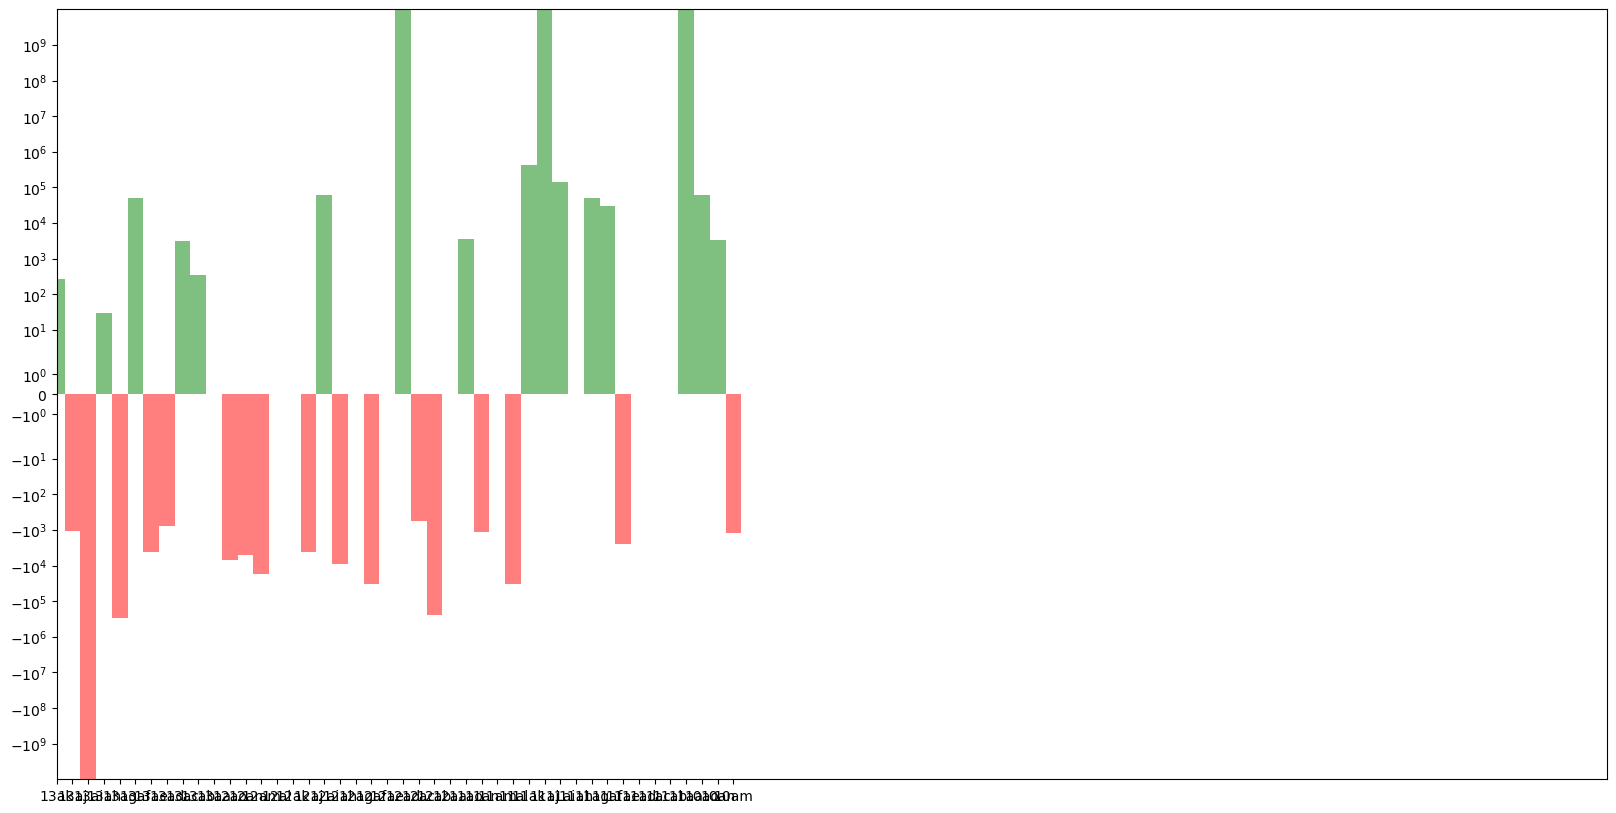

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -413800.0, maximal difference (with sign --> best for normal): 303900.0
average difference (negative --> SGQE better, positive --> normal better): -5155.658620689655
median difference (negative --> SGQE better, positive --> normal better): 755.6
--------
Runtime count: left: SGQE better, right: Normal better
13 16
--------
Memory count: left: SGQE better, right: Normal better
1 28
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -106.556096, maximal difference (with sign --> best for normal): 33445.059461
average difference (negative --> SGQE better, positive --> normal better): 3233.648521363636
median difference (negative --> SGQE better, positive --> normal better): 156.97914600000001
--------
SGQE unsolved: 12, Normal unsolved: 14
SGQE better
--------
Unsolved by normal
['11aa', '11ab', '11ac'

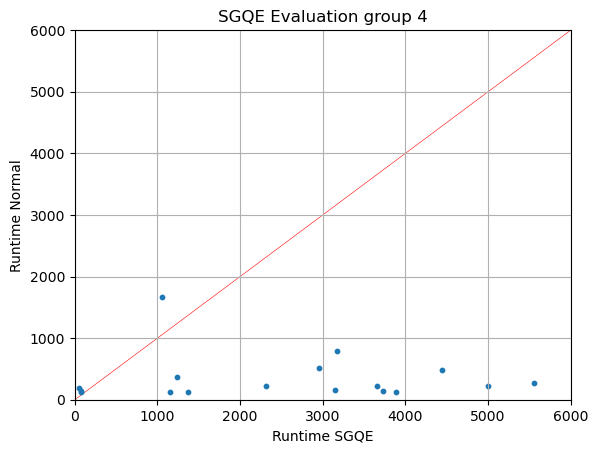

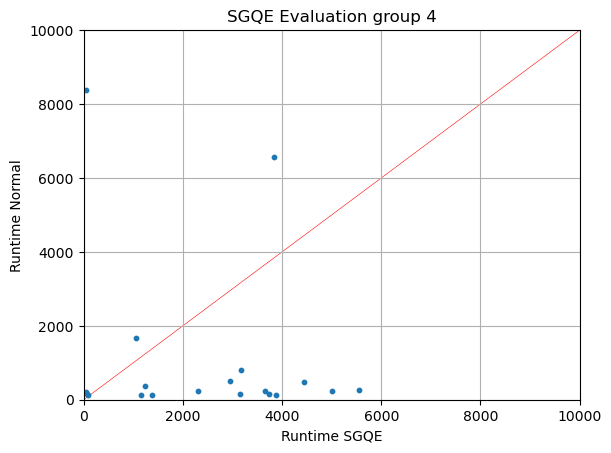

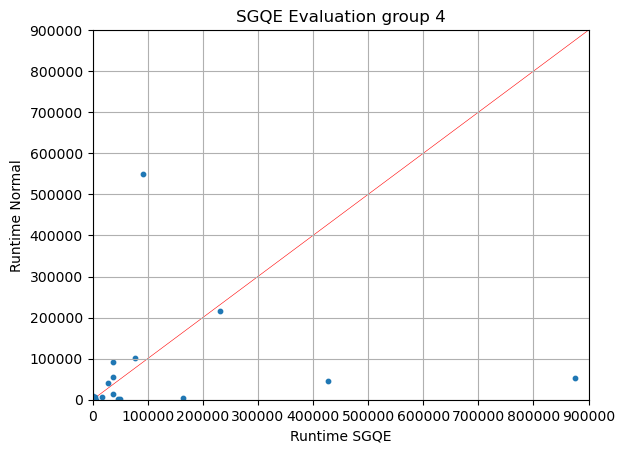

[-2.0863e+03  0.0000e+00 -4.8360e+04  0.0000e+00  1.2800e+04  0.0000e+00
 -5.2885e+03  0.0000e+00 -2.3400e+04  0.0000e+00 -9.6400e+03 -8.6520e+02
  0.0000e+00  1.8200e+04  0.0000e+00  0.0000e+00  2.4800e+04  0.0000e+00
  0.0000e+00 -3.5815e+03  4.1600e+01 -3.4203e+03 -3.7490e+03  5.4000e+04
  0.0000e+00  6.2000e+02  1.4110e+02 -3.9533e+03 -4.7697e+03  8.3244e+03
 -1.6189e+05 -4.3250e+04 -1.5900e+04 -2.9974e+03 -3.8290e+05 -2.3778e+03
 -8.2200e+05 -2.4471e+03  7.9700e+01 -1.0200e+03  2.7400e+03  4.5800e+05
 -1.2479e+03  0.0000e+00]
-822000.0


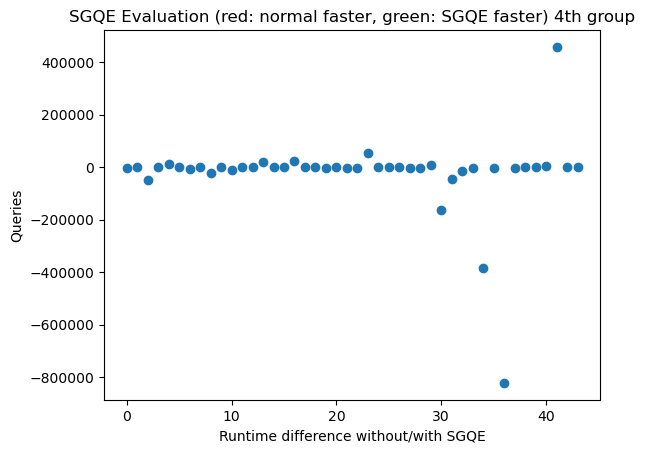

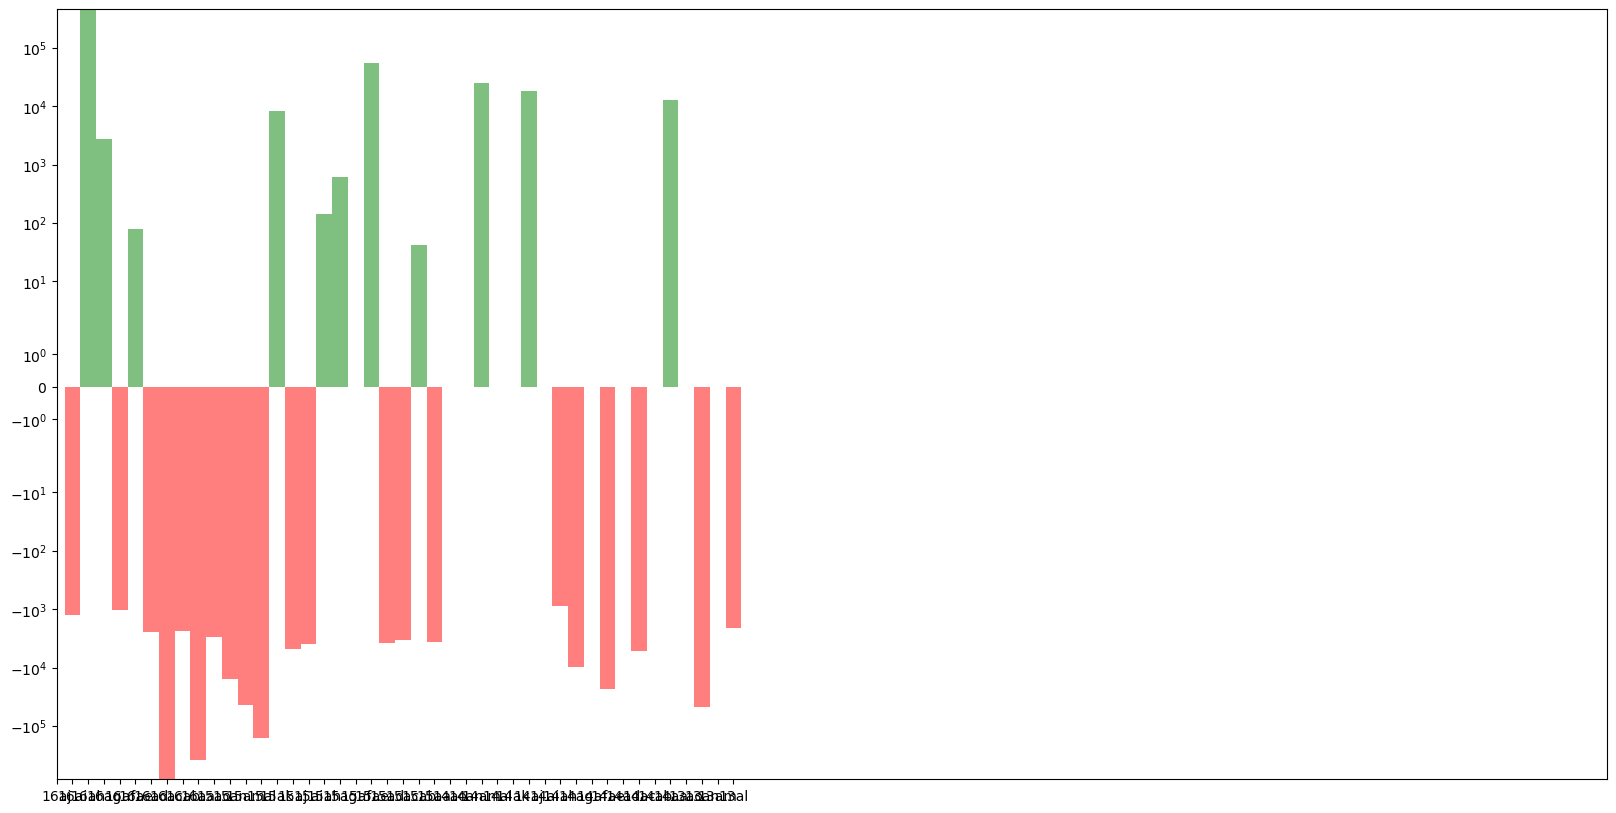

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -458000.0, maximal difference (with sign --> best for normal): 822000.0
average difference (negative --> SGQE better, positive --> normal better): 30168.6625
median difference (negative --> SGQE better, positive --> normal better): 2412.45
--------
Runtime count: left: SGQE better, right: Normal better
11 21
--------
Memory count: left: SGQE better, right: Normal better
1 31
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -1360.156146, maximal difference (with sign --> best for normal): 37745.354245
average difference (negative --> SGQE better, positive --> normal better): 3727.292773340909
median difference (negative --> SGQE better, positive --> normal better): 524.946608
--------
SGQE unsolved: 12, Normal unsolved: 12
--------
Unsolved by normal
['13am', '13ao', '14ab', '14ad', '14af', '14ai',

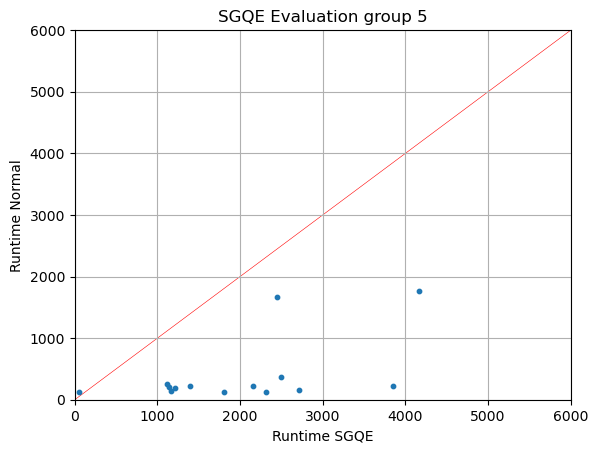

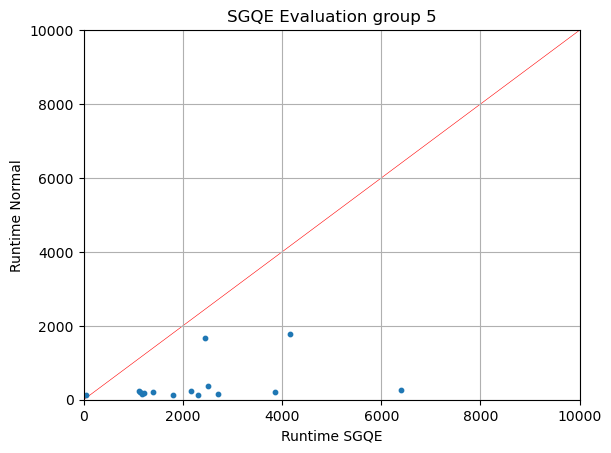

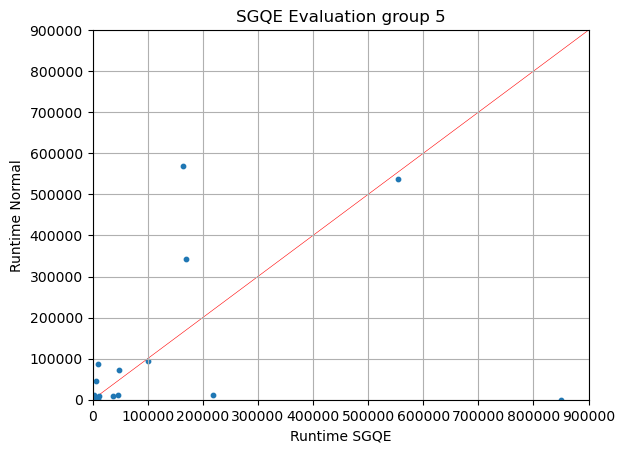

[-3.6301000e+03  4.0530000e+05 -3.5100000e+03  7.6170000e+04
 -3.4500000e+04  0.0000000e+00 -2.9390000e+04  1.7490000e+05
  0.0000000e+00 -5.2000000e+03  0.0000000e+00  0.0000000e+00
  9.7500000e+03 -2.4000000e+03 -2.5482000e+03 -2.0720000e+05
  0.0000000e+00 -1.1690000e+03 -6.1386000e+03 -2.1827000e+03
  7.2700000e+01 -1.6833000e+03 -8.4965800e+05  9.9999781e+09
 -7.9000000e+02  3.9020000e+04 -1.7800000e+04  0.0000000e+00
 -1.0280000e+03  0.0000000e+00 -2.1275000e+03 -8.7140000e+02
 -1.0206000e+03  9.9999455e+09  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -1.9303000e+03  2.4400000e+04  0.0000000e+00
  0.0000000e+00 -8.9700000e+03 -9.2820000e+02]
-849658.0


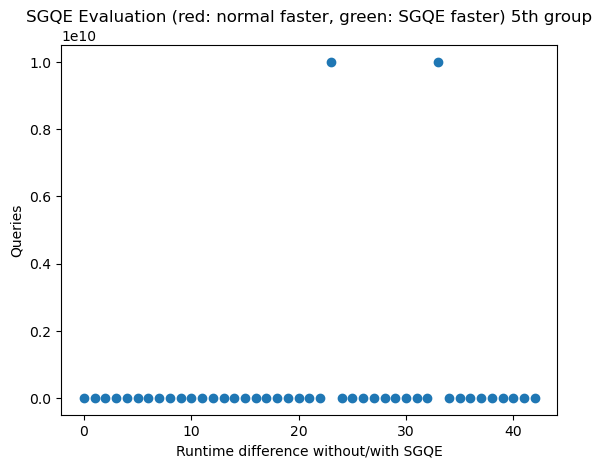

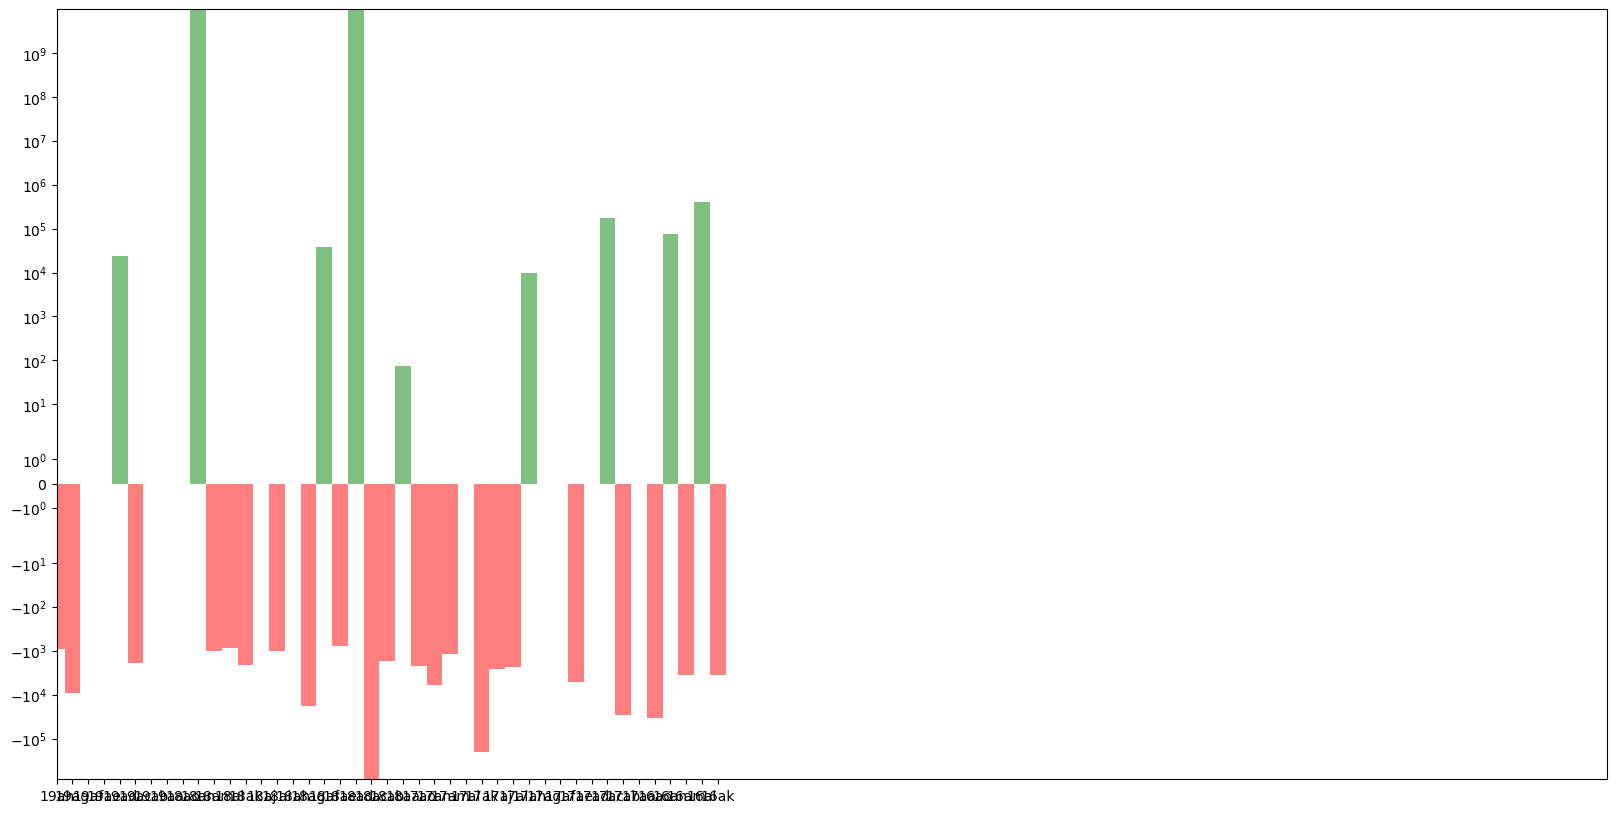

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -405300.0, maximal difference (with sign --> best for normal): 849658.0
average difference (negative --> SGQE better, positive --> normal better): 15691.834482758619
median difference (negative --> SGQE better, positive --> normal better): 1930.3
--------
Runtime count: left: SGQE better, right: Normal better
7 22
--------
Memory count: left: SGQE better, right: Normal better
3 26
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -1567.864833, maximal difference (with sign --> best for normal): 23554.744542
average difference (negative --> SGQE better, positive --> normal better): 2213.687771232558
median difference (negative --> SGQE better, positive --> normal better): 256.905773
--------
SGQE unsolved: 12, Normal unsolved: 14
SGQE better
--------
Unsolved by normal
['17aa', '17ad', '17af', '17ag

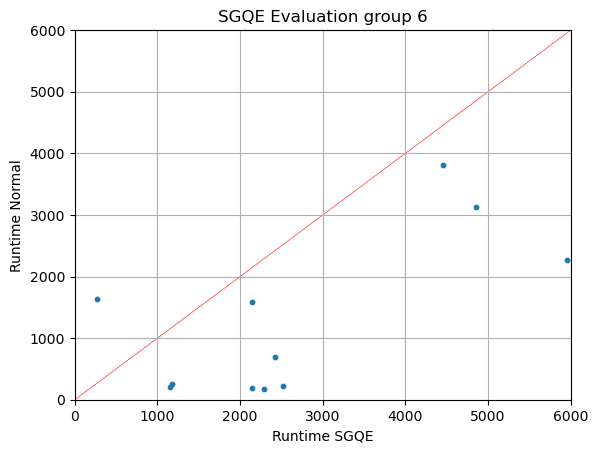

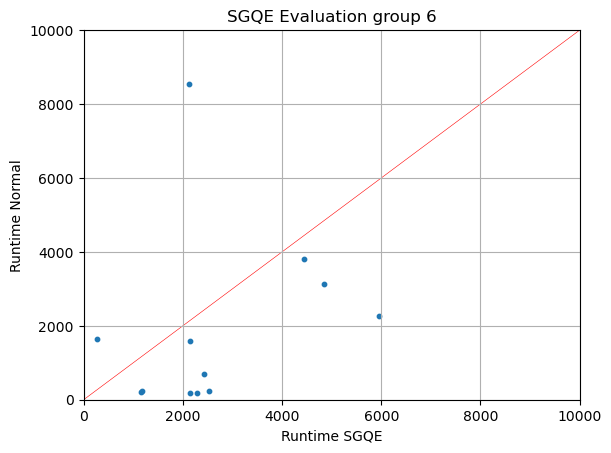

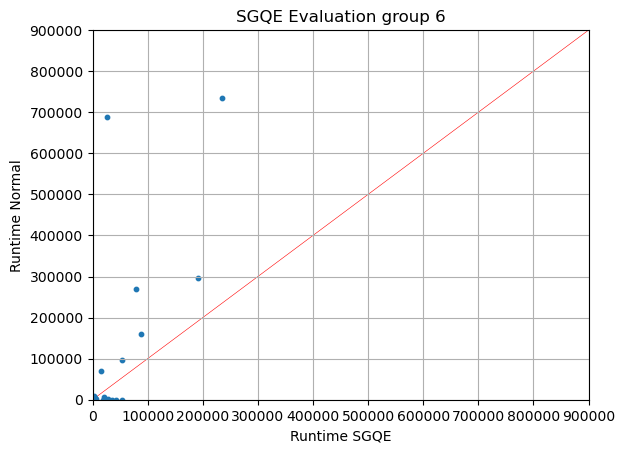

[-5.6000000e+02 -3.5706600e+04  0.0000000e+00  0.0000000e+00
  6.6220000e+05 -1.9417500e+04 -9.3280000e+02  1.3672000e+03
  0.0000000e+00 -2.1122000e+03  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  5.3700000e+04
 -1.7200000e+03  5.0000000e+05 -3.6900000e+03  1.0670000e+05
  0.0000000e+00 -1.9560000e+03  7.0500000e+04 -2.7367900e+04
  0.0000000e+00  0.0000000e+00  6.4300000e+03  0.0000000e+00
  9.9997325e+09 -5.4071400e+04 -1.7214000e+03  1.9030000e+05
 -2.2937000e+03  9.9993601e+09 -9.9999866e+09 -1.4110000e+04
  0.0000000e+00 -9.4580000e+02  0.0000000e+00 -4.1813200e+04
  4.1600000e+04 -6.4000000e+02  0.0000000e+00]
-9999986599.0


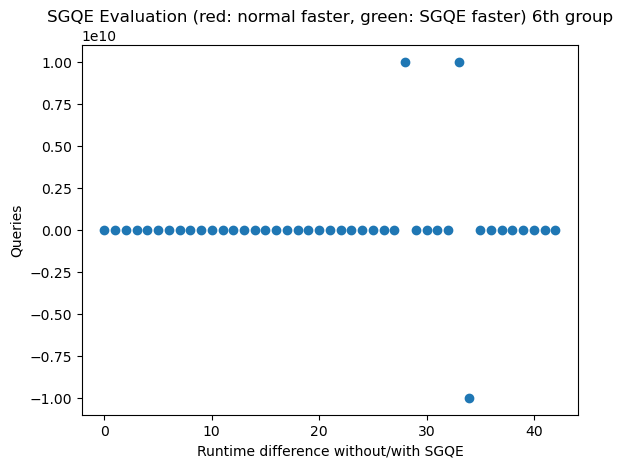

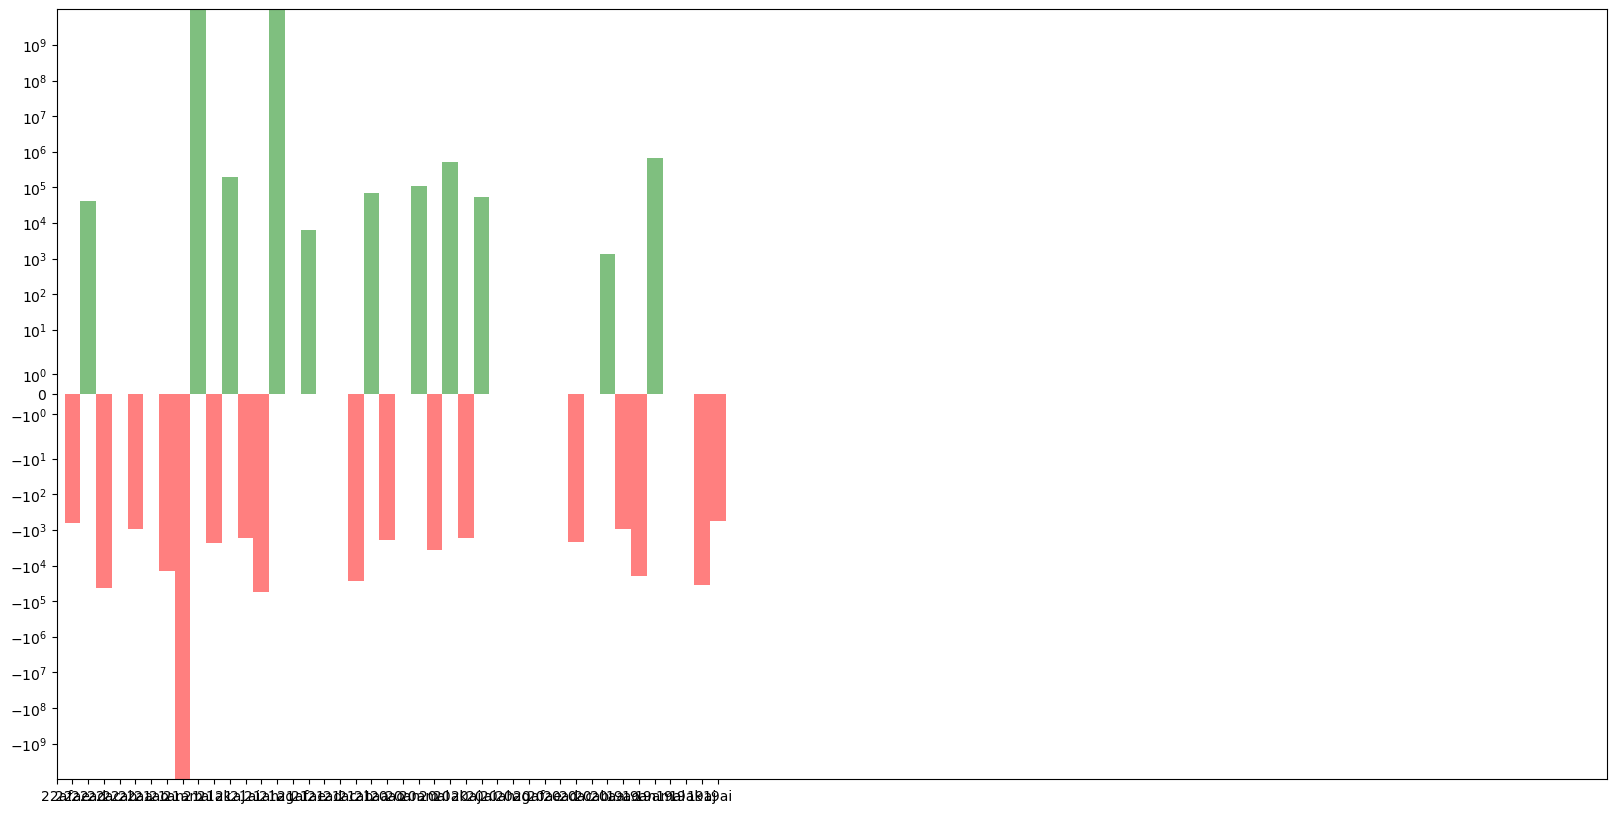

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -662200.0, maximal difference (with sign --> best for normal): 54071.4
average difference (negative --> SGQE better, positive --> normal better): -56949.547999999995
median difference (negative --> SGQE better, positive --> normal better): 945.8
--------
Runtime count: left: SGQE better, right: Normal better
9 16
--------
Memory count: left: SGQE better, right: Normal better
2 23
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -5148.828933, maximal difference (with sign --> best for normal): 33895.899115
average difference (negative --> SGQE better, positive --> normal better): 4008.5464404418603
median difference (negative --> SGQE better, positive --> normal better): 111.122607
--------
SGQE unsolved: 16, Normal unsolved: 17
SGQE better
--------
Unsolved by normal
['19ak', '19al', '20ab', '20ad

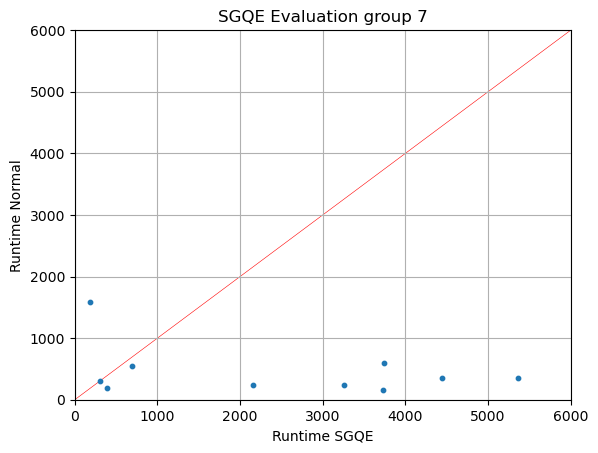

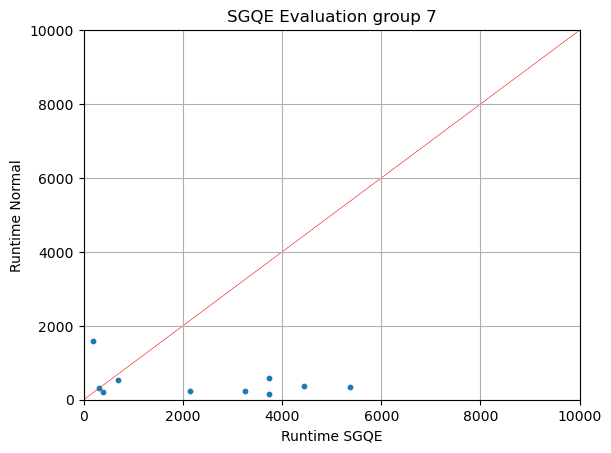

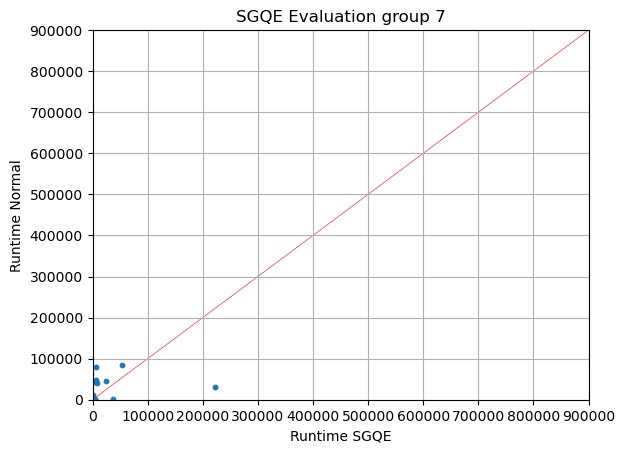

[-5.00620000e+03  3.21000000e+04  0.00000000e+00 -4.07940000e+03
 -9.99999203e+09  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.91730000e+03 -3.56500000e+03  4.25800000e+04  0.00000000e+00
  4.01500000e+04  9.99995540e+09  0.00000000e+00  9.99994850e+09
  9.87040000e+03 -1.86800000e+02  9.99987680e+09  0.00000000e+00
 -9.99999720e+09 -9.99999957e+09  9.99999959e+09 -9.99999977e+09
 -9.99999798e+09  3.45300000e+04  0.00000000e+00 -9.99999980e+09
 -1.52200000e+02  2.13000000e+04 -3.14020000e+03  1.40680000e+03
  3.63200000e+04 -1.92500000e+05  9.99995250e+09  7.37300000e+04
  0.00000000e+00  6.20000000e+00  0.00000000e+00  0.00000000e+00
 -3.02860000e+03 -3.65900000e+04  0.00000000e+00]
-9999999796.3


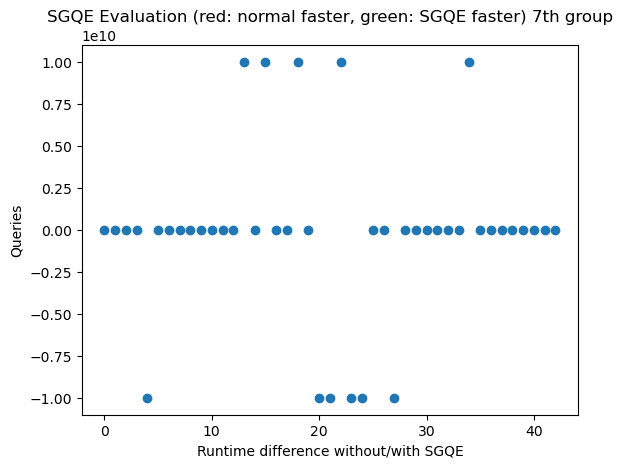

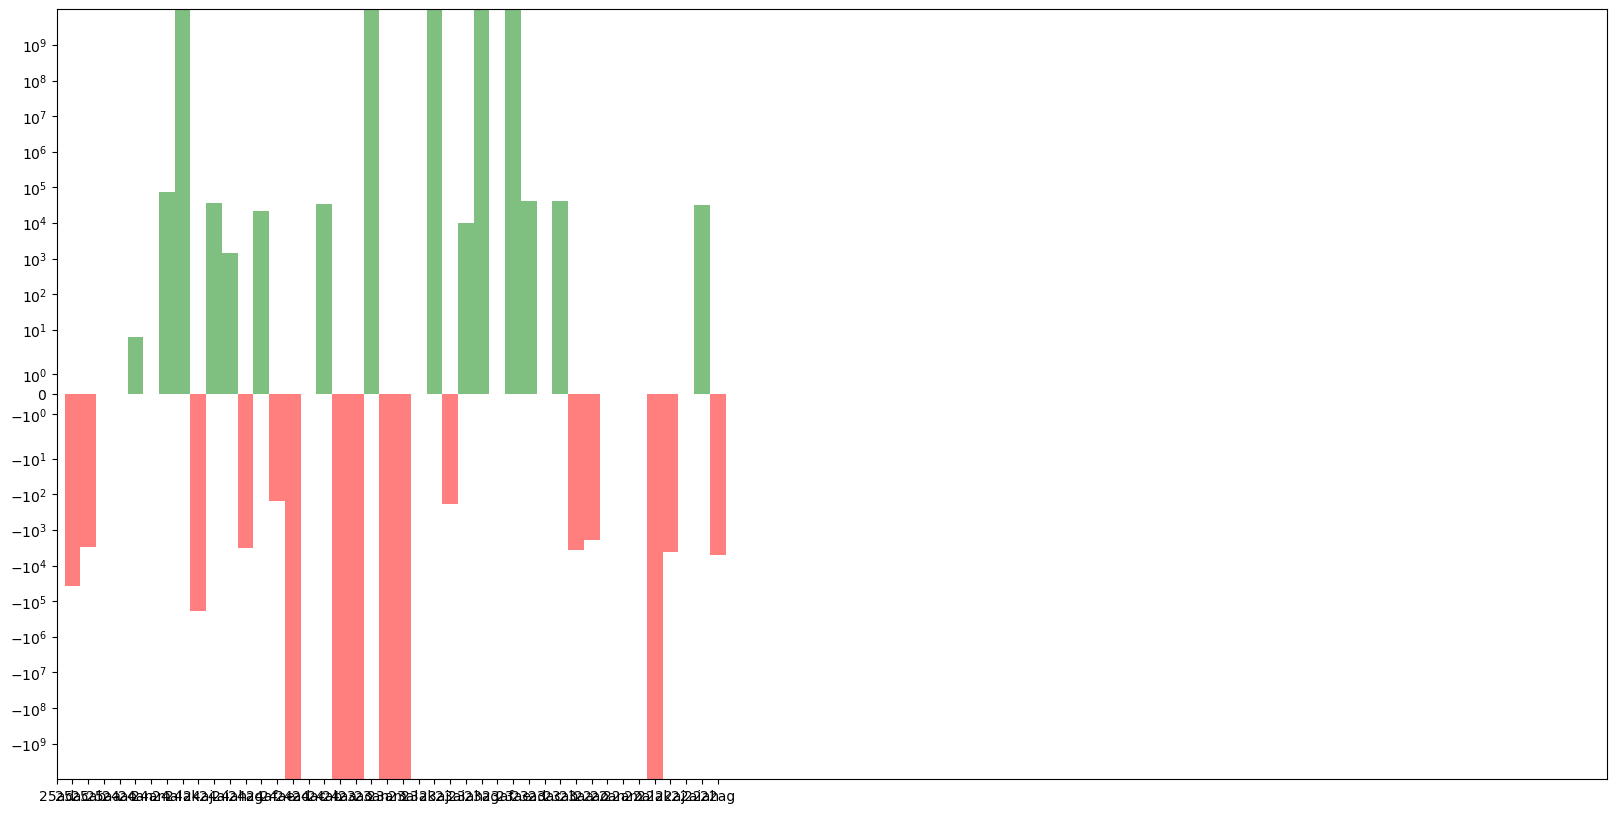

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -73730.0, maximal difference (with sign --> best for normal): 192500.0
average difference (negative --> SGQE better, positive --> normal better): -2091.3849999999998
median difference (negative --> SGQE better, positive --> normal better): 72.99999999999997
--------
Runtime count: left: SGQE better, right: Normal better
10 10
--------
Memory count: left: SGQE better, right: Normal better
5 15
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -500.335991, maximal difference (with sign --> best for normal): 4662.154996
average difference (negative --> SGQE better, positive --> normal better): 716.7824769069767
median difference (negative --> SGQE better, positive --> normal better): 0.0
--------
SGQE unsolved: 18, Normal unsolved: 17
--------
Unsolved by normal
['22ai', '22al', '22am', '22an', '23ac'

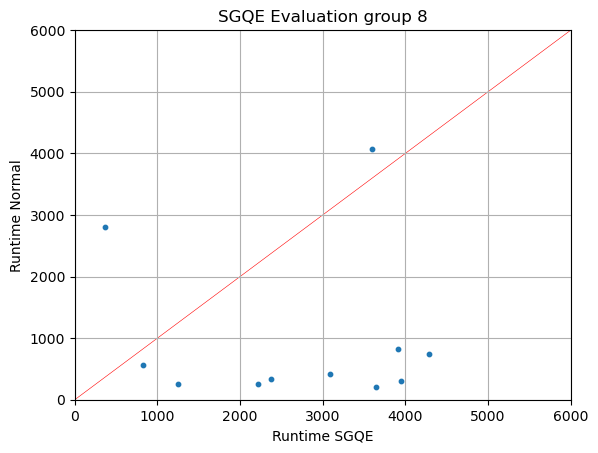

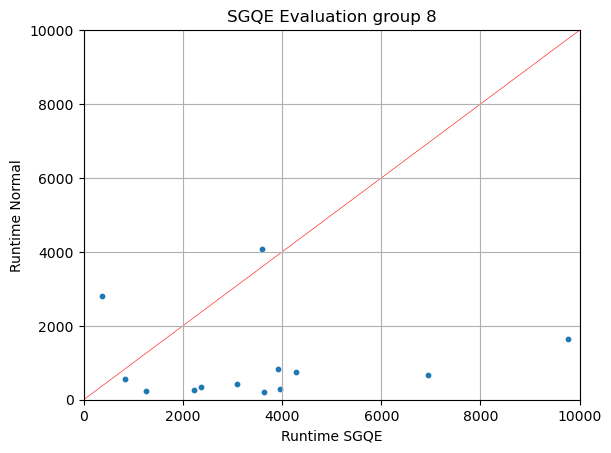

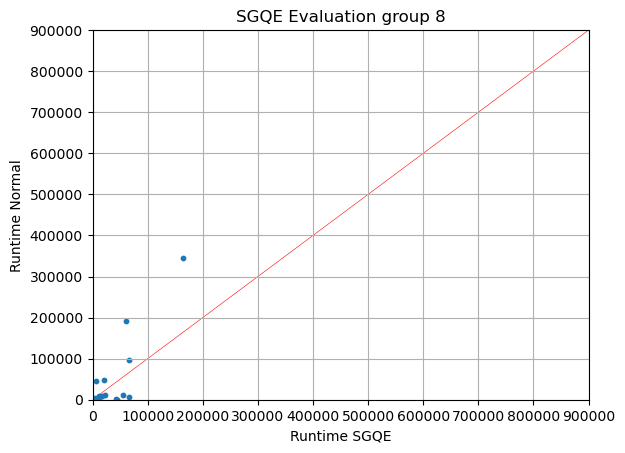

[ 3.93500000e+04 -3.09220000e+03  0.00000000e+00 -1.15000000e+04
  0.00000000e+00 -1.96010000e+03  0.00000000e+00  0.00000000e+00
 -9.09000000e+03 -8.13000000e+03 -1.00080000e+03  0.00000000e+00
 -2.03460000e+03  0.00000000e+00 -3.54160000e+03  9.99938870e+09
  0.00000000e+00 -4.10000000e+04 -3.43740000e+03  2.71000000e+04
 -2.63900000e+02  9.99995940e+09  0.00000000e+00 -2.67700000e+03
  9.99957910e+09 -8.32000000e+03  1.82000000e+05 -4.50984000e+04
  0.00000000e+00  0.00000000e+00 -6.28930000e+03 -2.85000000e+03
  3.06000000e+04  4.70000000e+02  1.31000000e+05 -4.58000000e+04
 -4.48189000e+04  2.44450000e+03 -3.64970000e+03 -5.85300000e+04
 -9.99999974e+09 -9.99999973e+09 -9.99999943e+09]
-9999999742.1


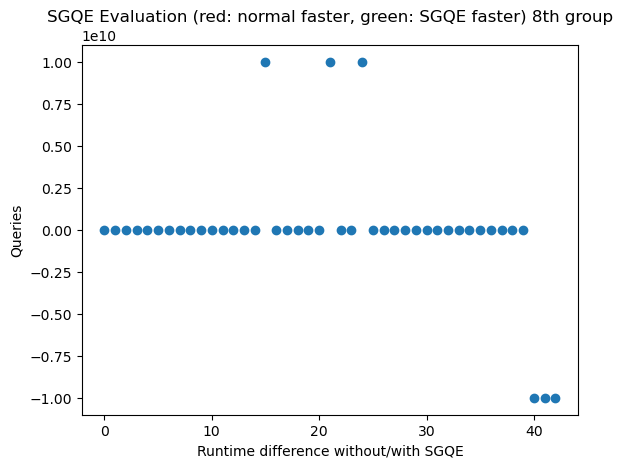

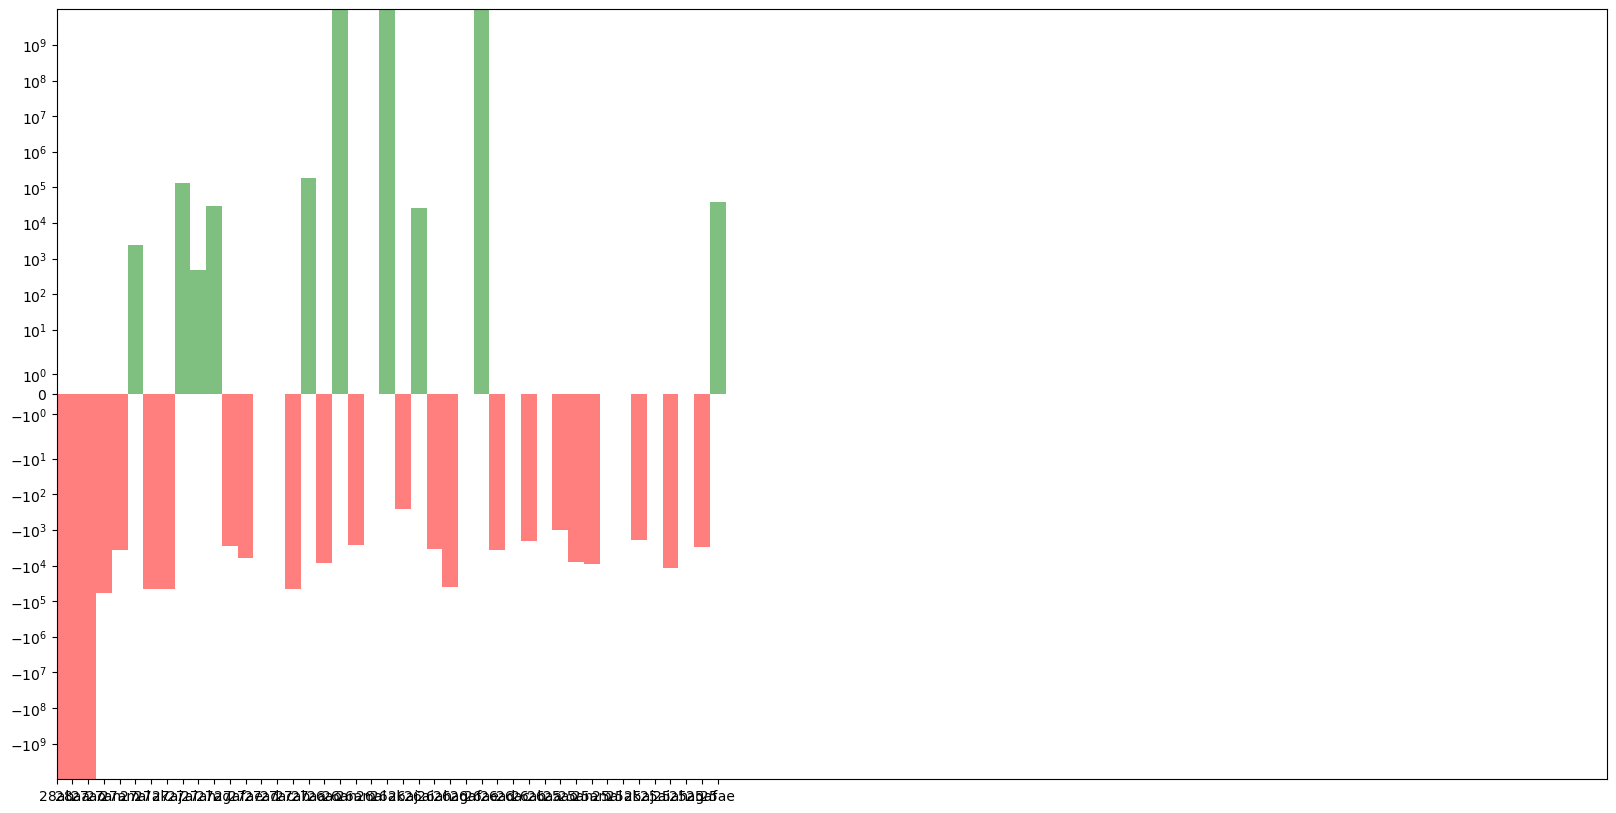

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -182000.0, maximal difference (with sign --> best for normal): 58530.0
average difference (negative --> SGQE better, positive --> normal better): -4069.651851851851
median difference (negative --> SGQE better, positive --> normal better): 3092.2
--------
Runtime count: left: SGQE better, right: Normal better
7 20
--------
Memory count: left: SGQE better, right: Normal better
2 25
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -313.692818, maximal difference (with sign --> best for normal): 30484.389204
average difference (negative --> SGQE better, positive --> normal better): 3970.405559906977
median difference (negative --> SGQE better, positive --> normal better): 246.49636
--------
SGQE unsolved: 13, Normal unsolved: 13
--------
Unsolved by normal
['25ag', '25ai', '25ak', '25al', '26aa', '26a

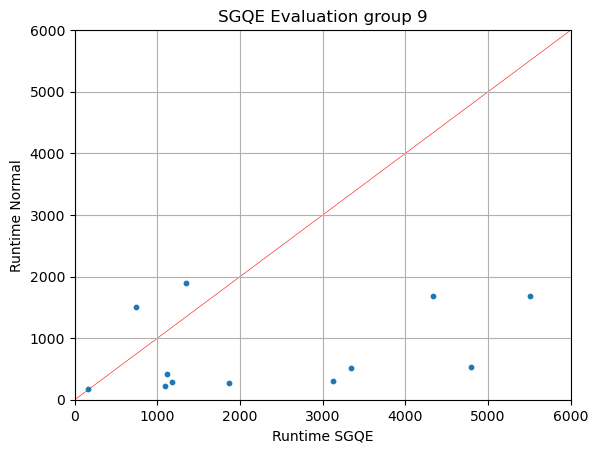

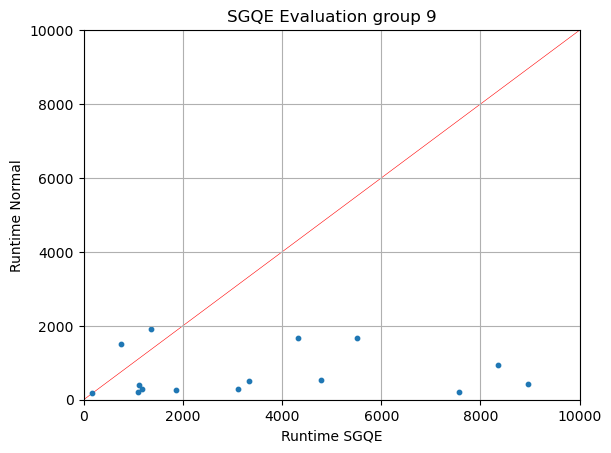

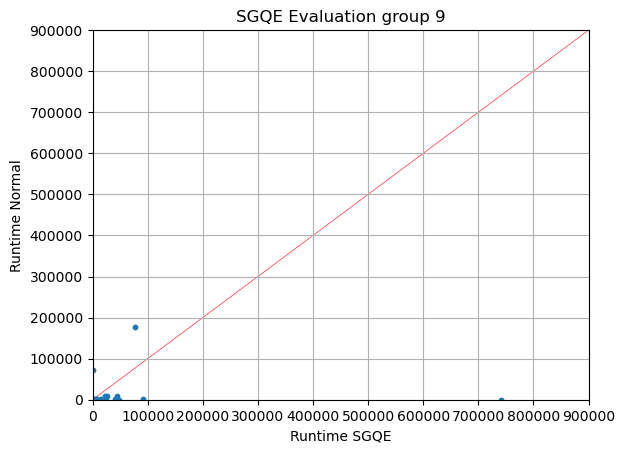

[-1.59450000e+03 -9.99999741e+09  0.00000000e+00 -2.65000000e+03
 -7.08800000e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.46800000e+04 -3.83000000e+03 -4.70681000e+04 -9.99999980e+09
 -9.99999072e+09 -2.82260000e+03  0.00000000e+00  1.01100000e+05
 -2.82490000e+03 -8.97600000e+04 -1.66600000e+04 -3.49400000e+04
 -7.42490000e+03 -7.41145400e+05 -7.36090000e+03 -1.47800000e+04
  9.99999874e+09 -8.68900000e+02  7.07900000e+04 -9.99999981e+09
 -9.99999977e+09 -9.99999955e+09  0.00000000e+00  5.50000000e+02
  0.00000000e+00 -8.51220000e+03 -2.42996000e+04 -8.97600000e+02
  0.00000000e+00 -4.25400000e+03 -3.90200000e+04  7.30000000e+00
  0.00000000e+00  9.99999733e+09  7.53600000e+02]
-9999999806.5


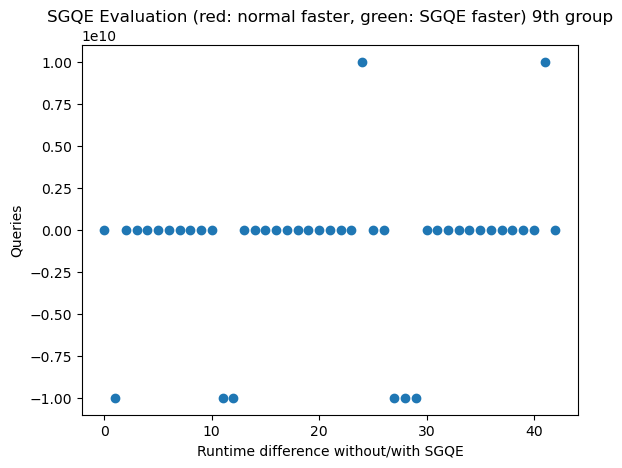

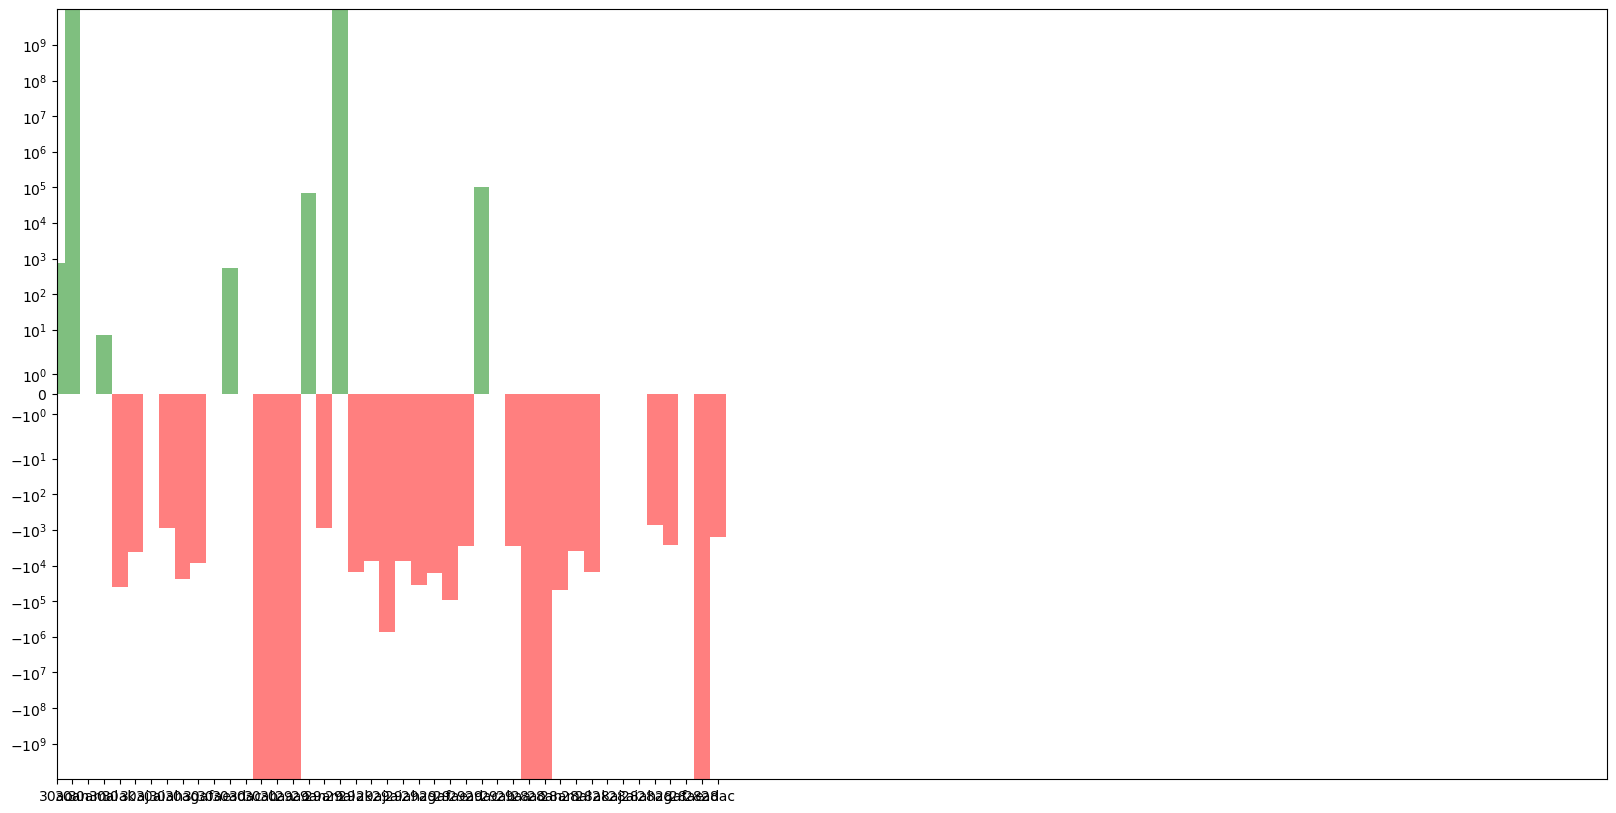

--------
Runtime differences
Values in ms (when both versions solved the instance; acyclic queries)
minimal difference (with sign --> best for SGQE): -101100.0, maximal difference (with sign --> best for normal): 741145.4
average difference (negative --> SGQE better, positive --> normal better): 34342.36538461538
median difference (negative --> SGQE better, positive --> normal better): 4042.0
--------
Runtime count: left: SGQE better, right: Normal better
5 21
--------
Memory count: left: SGQE better, right: Normal better
4 22
--------
Memory differences
Values in MB
minimal difference (with sign --> best for SGQE): -1714.898267, maximal difference (with sign --> best for normal): 29999.070003
average difference (negative --> SGQE better, positive --> normal better): 3998.082445302325
median difference (negative --> SGQE better, positive --> normal better): 306.218275
--------
SGQE unsolved: 15, Normal unsolved: 11
--------
Unsolved by normal
['28ae', '28ah', '28ai', '28aj', '29ab', '2

In [87]:
i=0
for (q, v_a, v_b, m1, m2) in zip(split(queries, 10), split(val_a, 10), split(val_b, 10), split(maxmemlist1, 10), split(maxmemlist2, 10)):
    
    print("Group " + str(i))
    print("Queries: " + ", ".join(q))
    
    ### Runtime plots
    scatterplot2(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation group " +str(i), "./SGQE"+str(i)+"EvalScatterPlot.png")

    scatterplotWithLim(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation group " +str(i), "./SGQE"+str(i)+"10kEvalScatterPlot.png", 10000, 10000)
    scatterplotWithLim(v_a, v_b, "Runtime SGQE", "Runtime Normal", "SGQE Evaluation group " +str(i), "./SGQE"+str(i)+"900kEvalScatterPlot.png", 900000, 900000)
    
    diffPlot2(v_a, v_b, "Runtime difference without/with SGQE", "Queries", "SGQE Evaluation (red: normal faster, green: SGQE faster) " +str(i)+"th group", "./SGQE"+str(i)+"EvalRTDiffPlot.png", q)

    print("--------")
    
    #### Runtime differences

    a = np.array(v_a)
    b = np.array(v_b)

    # remove not solved
    a[a==9999999999.0]=0
    b[b==9999999999.0]=0

    # both solved --> does not fully describe the situation
    ind = []
    for j in range(len(a)):
        if a[j] == 0 or b[j] == 0:
            ind.append(j)
        j = j + 1

    a = np.delete(a, ind)
    b = np.delete(b, ind)


    diffs = np.subtract(a, b)
    min = np.min(diffs)
    max = np.max(diffs)

    avg = np.average(diffs)

    print("Runtime differences")
    print("Values in ms (when both versions solved the instance; acyclic queries)")
    print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
    print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
    print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")
    print("--------")


    ### Runtime count
    a_better_count, b_better_count = countRT(v_a, v_b) # excluding unsolved instances

    # a_better: SGQE better
    # b_better: Normal better
    print("Runtime count: left: SGQE better, right: Normal better")
    print(a_better_count, b_better_count )
    print("--------")


    ### Memory count
    a_better_count, b_better_count = count(m1, m2)

    # a_better: SGQE better
    # b_better: Normal better
    print("Memory count: left: SGQE better, right: Normal better")
    print(a_better_count, b_better_count )
    print("--------")


    ### Memory differences

    diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(m1, m2)]
    min = np.min(diffs)
    max = np.max(diffs)

    avg = np.average(diffs)

    print("Memory differences")
    print("Values in MB")
    print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
    print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
    print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

    print("--------")


    ### count unsolved
    v_a_unsolved = countOccurrence(v_a, 9999999999.0)
    v_b_unsolved = countOccurrence(v_b, 9999999999.0)

    print(f"SGQE unsolved: {v_a_unsolved}, Normal unsolved: {v_b_unsolved}")
    if v_a_unsolved < v_b_unsolved:
        print("SGQE better")
    elif v_a_unsolved < v_b_unsolved:
        print("Normal better")

    print("--------")

    ### unsolved by normal:
    print("Unsolved by normal")
    print([q[i] for i in range(len(v_b)) if v_b[i] >= 9999999999 ])

    print("--------")

    ### unsolved by SGQE:
    print("unsolved by SGQE")
    print([q[i] for i in range(len(v_a)) if v_a[i] >= 9999999999 ])



    print("--------")

    print("Group " + str(i) + " end")
    print()
    print()
    print()

    i+=1

Best queries for SGQE in terms of runtime

In [88]:
queries_bestRT = queries
maxmemlist1_bestRT = maxmemlist1
maxmemlist2_bestRT = maxmemlist2
val_a_bestRT = val_a
val_b_bestRT = val_b
zipped_bestRT = zip(queries_bestRT, maxmemlist1_bestRT, maxmemlist2_bestRT, val_a_bestRT, val_b_bestRT)
zipped_bestRT = [e + tuple([e[3] - e[4]]) for e in zipped_bestRT if e[3] != 9999999999.0 and e[4] != 9999999999.0]
zipped_bestRT = sorted(zipped_bestRT, key = lambda e: e[5])


In [89]:
# Best
for i in range(20):
    print(zipped_bestRT[i])

('19am', 11794169087.0, 4141160121.0, 26500.0, 688700.0, -662200.0)
('20ak', 32424335005.0, 3291593517.0, 234800.0, 734800.0, -500000.0)
('16ah', 3923090081.0, 2319925518.0, 92400.0, 550400.0, -458000.0)
('11ak', 1333773799.0, 691574370.0, 102800.0, 516600.0, -413800.0)
('16al', 1517878904.0, 819822175.0, 164000.0, 569300.0, -405300.0)
('21aj', 4263207933.0, 1730637407.0, 78300.0, 268600.0, -190300.0)
('27aa', 34191170163.0, 3706780959.0, 163400.0, 345400.0, -182000.0)
('17ac', 13162116192.0, 7281544950.0, 168900.0, 343800.0, -174900.0)
('11ai', 5275140331.0, 3203697520.0, 15900.0, 154500.0, -138600.0)
('27ai', 9514934225.0, 2244205331.0, 61000.0, 192000.0, -131000.0)
('20am', 5263258877.0, 10412087810.0, 190900.0, 297600.0, -106700.0)
('29ac', 8511833051.0, 2191205302.0, 77200.0, 178300.0, -101100.0)
('16an', 2899192486.0, 2090826733.0, 9830.0, 86000.0, -76170.0)
('24al', 6508729644.0, 1846574648.0, 6570.0, 80300.0, -73730.0)
('29an', 172075543.0, 1239323941.0, 1310.0, 72100.0, -70790

In [90]:
# Worst
for i in range(len(zipped_bestRT)-1, len(zipped_bestRT)-20, -1):
    print(zipped_bestRT[i])

('18ac', 10862451655.0, 50230401.0, 849800.0, 142.0, 849658.0)
('16ac', 10216567118.0, 56755887.0, 875000.0, 53000.0, 822000.0)
('29ai', 15851831009.0, 162821878.0, 741400.0, 254.6, 741145.4)
('16aa', 4487132905.0, 1054303848.0, 427500.0, 44600.0, 382900.0)
('13ag', 7220325640.0, 676717862.0, 485700.0, 181800.0, 303900.0)
('12ab', 8220251171.0, 1013041467.0, 692400.0, 448900.0, 243500.0)
('17ak', 8016293834.0, 5069122332.0, 219500.0, 12300.0, 207200.0)
('24aj', 3264255727.0, 1519076031.0, 222500.0, 30000.0, 192500.0)
('15al', 37987290840.0, 241936595.0, 165000.0, 3110.0, 161890.0)
('29ae', 5870976553.0, 1731959179.0, 90900.0, 1140.0, 89760.0)
('02ad', 47417353647.0, 5784644334.0, 113000.0, 34000.0, 79000.0)
('27an', 19922602190.0, 797732801.0, 65500.0, 6970.0, 58530.0)
('08ad', 10424505905.0, 5048626498.0, 264200.0, 208200.0, 56000.0)
('21ah', 3780964426.0, 113019112.0, 54300.0, 228.6, 54071.4)
('13an', 2471681212.0, 440824670.0, 50600.0, 2240.0, 48360.0)
('28am', 30346497394.0, 347427

Best queries for SGQE in terms of memory usage

In [91]:
queries_bestMem = queries
maxmemlist1_bestMem = maxmemlist1
maxmemlist2_bestMem = maxmemlist2
val_a_bestMem = val_a
val_b_bestMem = val_b
zipped_bestMem = zip(queries_bestMem, maxmemlist1_bestMem, maxmemlist2_bestMem, val_a_bestMem, val_b_bestMem)
zipped_bestMem = [e + tuple([e[1] - e[2]]) for e in zipped_bestMem if e[3] != 9999999999.0 and e[4] != 9999999999.0]
zipped_bestMem = sorted(zipped_bestMem, key = lambda e: e[5])


In [92]:
# Best
for i in range(20):
    print(zipped_bestMem[i])

('20am', 5263258877.0, 10412087810.0, 190900.0, 297600.0, -5148828933.0)
('30ao', 643515375.0, 2358413642.0, 746.4, 1500.0, -1714898267.0)
('18ag', 7539087992.0, 9106952825.0, 555100.0, 537300.0, -1567864833.0)
('15ak', 41669188.0, 1401825334.0, 45.6, 8370.0, -1360156146.0)
('29an', 172075543.0, 1239323941.0, 1310.0, 72100.0, -1067248398.0)
('22ae', 2117878684.0, 3021496895.0, 4450.0, 3810.0, -903618211.0)
('23ab', 2069395255.0, 2569731246.0, 5420.0, 48000.0, -500335991.0)
('05al', 182057142.0, 517498283.0, 1210.0, 5180.0, -335441141.0)
('05ao', 115617893.0, 438059571.0, 3170.0, 6260.0, -322441678.0)
('27ah', 4637691921.0, 4951384739.0, 3600.0, 4070.0000000000005, -313692818.0)
('25ao', 67782924.0, 317517313.0, 1250.0, 249.2, -249734389.0)
('24an', 62991308.0, 235681940.0, 299.8, 306.0, -172690632.0)
('24ae', 594872433.0, 754266829.0, 697.8, 545.6, -159394396.0)
('29am', 157100559.0, 302570081.0, 1090.0, 221.1, -145469522.0)
('04al', 66344332.0, 208406197.0, 1110.0, 3090.0, -142061865.

In [93]:
# Worst
for i in range(len(zipped_bestMem)-1, len(zipped_bestMem)-20, -1):
    print(zipped_bestMem[i])

('02ad', 47417353647.0, 5784644334.0, 113000.0, 34000.0, 41632709313.0)
('15al', 37987290840.0, 241936595.0, 165000.0, 3110.0, 37745354245.0)
('05ac', 41856043426.0, 6599511280.0, 71300.0, 28400.0, 35256532146.0)
('19aj', 33905532161.0, 9633046.0, 35900.0, 193.4, 33895899115.0)
('11ag', 36233805988.0, 2788746527.0, 66800.0, 116400.0, 33445059461.0)
('14am', 34072775097.0, 1549570264.0, 77700.0, 102500.0, 32523204833.0)
('27aa', 34191170163.0, 3706780959.0, 163400.0, 345400.0, 30484389204.0)
('28am', 30346497394.0, 347427391.0, 47300.0, 231.9, 29999070003.0)
('30ak', 33321876682.0, 3397297562.0, 41100.0, 2080.0, 29924579120.0)
('10ao', 30858576346.0, 1054703607.0, 98100.0, 157400.0, 29803872739.0)
('20ak', 32424335005.0, 3291593517.0, 234800.0, 734800.0, 29132741488.0)
('30ag', 26755211297.0, 642451303.0, 24800.0, 500.4, 26112759994.0)
('15am', 25132896414.0, 154822634.0, 45500.0, 2250.0, 24978073780.0)
('22ac', 24289012883.0, 146258506.0, 42100.0, 286.8, 24142754377.0)
('16ao', 2503685

In [94]:
bestMem_sortedForNormalMem = sorted(zipped_bestMem, key = lambda i : i[2], reverse = True)

In [95]:
bestMem_sortedForNormalMem

[('11al', 34026757051.0, 16862484559.0, 90400.0, 58400.0, 17164272492.0),
 ('20am', 5263258877.0, 10412087810.0, 190900.0, 297600.0, -5148828933.0),
 ('14aa', 14733185161.0, 9215747163.0, 27900.0, 40700.0, 5517437998.0),
 ('18ag', 7539087992.0, 9106952825.0, 555100.0, 537300.0, -1567864833.0),
 ('15an', 11318101705.0, 8741935513.0, 231700.0, 215800.0, 2576166192.0),
 ('06ao', 28103550937.0, 8449692091.0, 63700.0, 57700.0, 19653858846.0),
 ('26ai', 11796303688.0, 7921298086.0, 21300.0, 48400.0, 3875005602.0),
 ('08an', 18923255707.0, 7404151848.0, 45100.0, 27200.0, 11519103859.0),
 ('17ae', 12457075680.0, 7330927017.0, 100400.0, 95200.0, 5126148663.0),
 ('17ac', 13162116192.0, 7281544950.0, 168900.0, 343800.0, 5880571242.0),
 ('06am', 14539002697.0, 6974359298.0, 34200.0, 33200.0, 7564643399.0),
 ('05ac', 41856043426.0, 6599511280.0, 71300.0, 28400.0, 35256532146.0),
 ('14ae', 17683772609.0, 6160242444.0, 36500.0, 13100.0, 11523530165.0),
 ('02ad', 47417353647.0, 5784644334.0, 113000.0,

Zero result queries


In [96]:
def getZeroResultQueries(dira, dirb):
  zeroResQ = set()
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  for l in numTuplesA:
    if not "Timeout" in l:
      if l.split(";")[-1].rstrip("\n").strip() == "0":
        zeroResQ.add(l.split(";")[0].split("/")[-1].strip())

  for l in numTuplesB:
    if not "Timeout" in l:
      if l.split(";")[-1].rstrip("\n").strip() == "0":
        zeroResQ.add(l.split(";")[0].split("/")[-1].strip())

  return list(zeroResQ)
          



In [97]:
zeroResQueries = getZeroResultQueries("./aggout/complete/", "./mergeout/basic/1/")
zeroResQueries.sort()

In [98]:
zeroResQueries

['07af',
 '07ag',
 '07ah',
 '08aj',
 '09af',
 '09ag',
 '10aa',
 '10ai',
 '10am',
 '11ao',
 '12ac',
 '12an',
 '12ao',
 '13ab',
 '13ad',
 '13ae',
 '13ah',
 '13aj',
 '13ak',
 '13al',
 '14ah',
 '15aa',
 '15ab',
 '15ac',
 '15ad',
 '15ag',
 '15ah',
 '15ak',
 '15ao',
 '16ab',
 '16ad',
 '16ae',
 '16af',
 '16ag',
 '16ai',
 '17ah',
 '17ai',
 '17aj',
 '17am',
 '17an',
 '17ao',
 '18aa',
 '18ab',
 '18ac',
 '18ad',
 '18ae',
 '18ai',
 '18ak',
 '18al',
 '18am',
 '19ac',
 '19ag',
 '19ah',
 '19ai',
 '19aj',
 '19an',
 '19ao',
 '20aa',
 '20ac',
 '20aj',
 '20al',
 '20ao',
 '21ab',
 '21ae',
 '21ah',
 '21ai',
 '21ak',
 '21am',
 '22aa',
 '22ac',
 '22ae',
 '22ag',
 '22aj',
 '22ak',
 '22ao',
 '23aa',
 '23ab',
 '23ad',
 '23ah',
 '23ai',
 '23al',
 '23am',
 '23an',
 '23ao',
 '24aa',
 '24ad',
 '24ae',
 '24ag',
 '24ah',
 '24an',
 '25ab',
 '25ac',
 '25af',
 '25ah',
 '25aj',
 '25am',
 '25an',
 '25ao',
 '26ab',
 '26ad',
 '26ag',
 '26ah',
 '26aj',
 '26ak',
 '26am',
 '26ao',
 '27ab',
 '27ae',
 '27af',
 '27ah',
 '27aj',
 

In [99]:
_, val_a_zrq, maxmemlist1_zrq = getMatchingQueries(queries, val_a, maxmemlist1, zeroResQueries)
_, val_b_zrq, maxmemlist2_zrq = getMatchingQueries(queries, val_b, maxmemlist2, zeroResQueries)

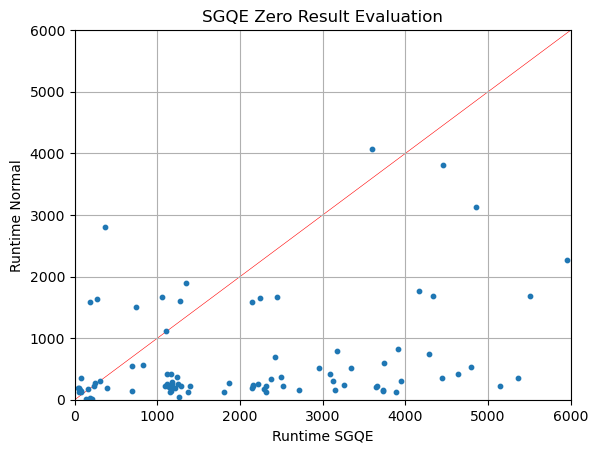

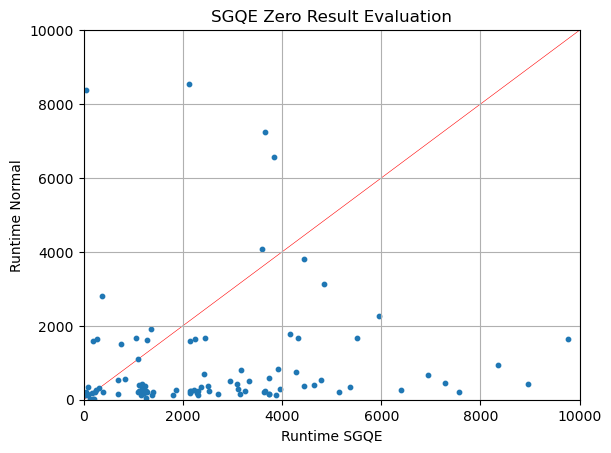

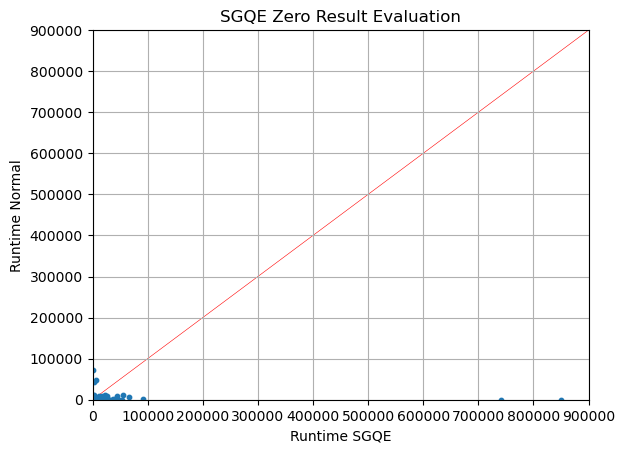

[-2.01880000e+02 -1.27100000e+02  1.58400000e+02 -1.58500000e+02
  1.00000000e+01  1.01900000e+02 -5.90000000e+02 -1.14000000e+01
 -1.22100000e+03  3.59000000e+03 -5.50500000e+02 -4.92000000e+03
 -6.82310000e+03  3.40000000e+02 -7.55600000e+02 -4.23030000e+03
  2.97000000e+01 -1.06030000e+03  2.72600000e+02 -2.08630000e+03
 -8.65200000e+02 -3.58150000e+03  4.16000000e+01 -3.42030000e+03
 -3.74900000e+03  6.20000000e+02  1.41100000e+02  8.32440000e+03
 -2.99740000e+03 -2.37780000e+03 -2.44710000e+03  7.97000000e+01
 -1.02000000e+03  2.74000000e+03 -1.24790000e+03  9.75000000e+03
 -2.40000000e+03 -2.54820000e+03 -1.16900000e+03 -6.13860000e+03
 -2.18270000e+03  7.27000000e+01 -1.68330000e+03 -8.49658000e+05
  9.99997810e+09 -7.90000000e+02 -1.02800000e+03 -2.12750000e+03
 -8.71400000e+02 -1.02060000e+03 -1.93030000e+03 -8.97000000e+03
 -9.28200000e+02 -5.60000000e+02 -3.57066000e+04 -1.94175000e+04
 -9.32800000e+02  1.36720000e+03 -2.11220000e+03 -1.72000000e+03
 -3.69000000e+03 -1.95600

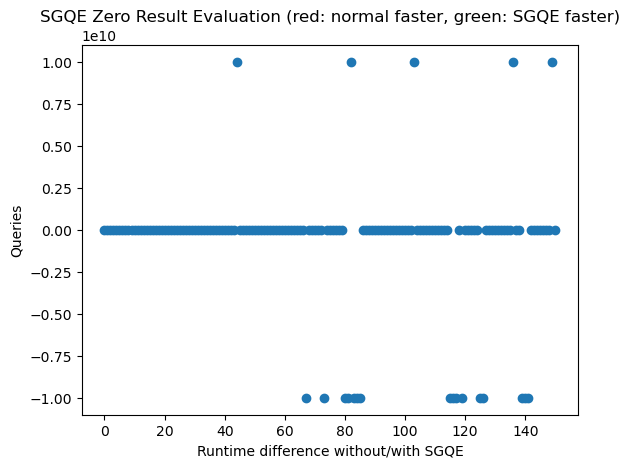

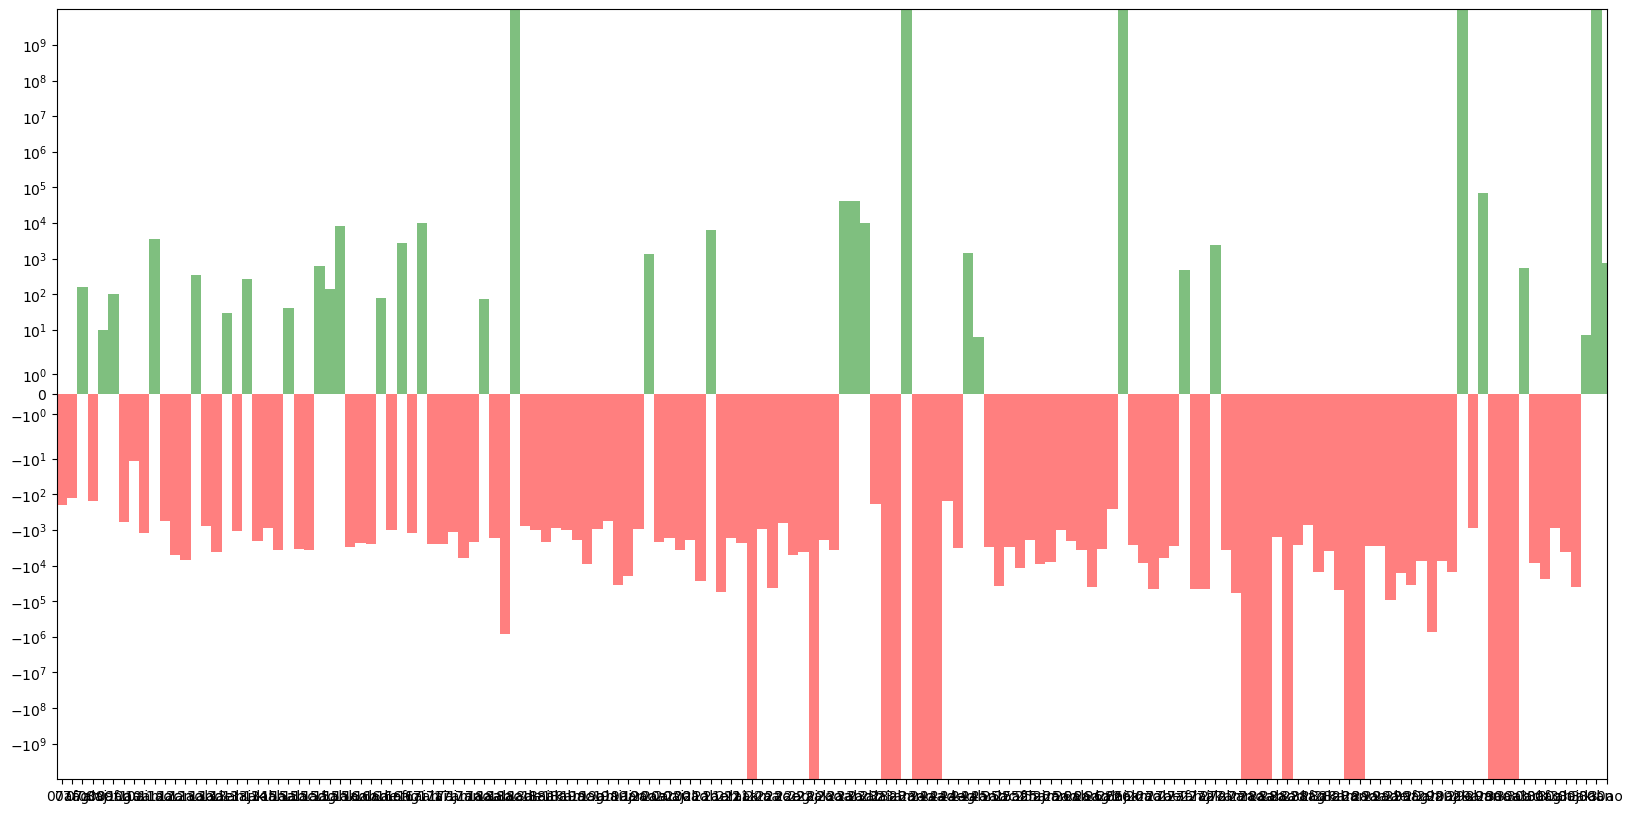

In [100]:
scatterplot2(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE Zero Result Evaluation", "./SGQEZeroResEvalScatterPlot.png")
scatterplotWithLim(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE Zero Result Evaluation", "./SGQEZeroRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_zrq, val_b_zrq, "Runtime SGQE", "Runtime Normal", "SGQE Zero Result Evaluation", "./SGQEZeroRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_zrq, val_b_zrq, "Runtime difference without/with SGQE", "Queries", "SGQE Zero Result Evaluation (red: normal faster, green: SGQE faster)", "./SGQEZeroResEvalRTDiffPlot.png", zeroResQueries)


In [101]:
a = np.array(val_a_zrq)
b = np.array(val_b_zrq)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; zero result queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; zero result queries)
minimal difference (with sign --> best for SGQE): -70790.0, maximal difference (with sign --> best for normal): 849658.0
average difference (negative --> SGQE better, positive --> normal better): 18050.69523076923
median difference (negative --> SGQE better, positive --> normal better): 1997.35


In [102]:
a_better_count, b_better_count = countRT(val_a_zrq, val_b_zrq) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


28 102


In [103]:
a_better_count, b_better_count = count(maxmemlist1_zrq, maxmemlist2_zrq)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

17 113


In [104]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_zrq, maxmemlist2_zrq)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -1714.898267, maximal difference (with sign --> best for normal): 33895.899115
average difference (negative --> SGQE better, positive --> normal better): 2833.9882749072844
median difference (negative --> SGQE better, positive --> normal better): 322.699412


In [105]:
# count unsolved
val_a_zrq_unsolved = countOccurrence(val_a_zrq, 9999999999.0)
val_b_zrq_unsolved = countOccurrence(val_b_zrq, 9999999999.0)

print(f"SGQE unsolved: {val_a_zrq_unsolved}, Normal unsolved: {val_b_zrq_unsolved}")
if val_a_zrq_unsolved < val_b_zrq_unsolved:
    print("SGQE better")
elif val_b_zrq_unsolved < val_a_zrq_unsolved:
    print("Normal better")

SGQE unsolved: 16, Normal unsolved: 5
Normal better


In [106]:
# unsolved by normal:
[zeroResQueries[i] for i in range(len(val_b_zrq)) if val_b_zrq[i] >= 9999999999 ]


['18ad', '23an', '26ak', '29al', '30an']

In [107]:
# unsolved by SGQE:
[zeroResQueries[i] for i in range(len(val_a_zrq)) if val_a_zrq[i] >= 9999999999 ]

['21am',
 '22ak',
 '23al',
 '23am',
 '23ao',
 '24aa',
 '24ad',
 '27ao',
 '28aa',
 '28ab',
 '28ad',
 '28an',
 '28ao',
 '29ao',
 '30aa',
 '30ab']

Non-Zero Result Queries

In [108]:
nonZeroResQueries = [q for q in queries if q not in zeroResQueries]

In [109]:
nonZeroResQueries

['02aa',
 '02ab',
 '02ac',
 '02ad',
 '02ae',
 '02af',
 '02ag',
 '02ah',
 '02ai',
 '02aj',
 '02ak',
 '02al',
 '02am',
 '02an',
 '02ao',
 '03aa',
 '03ab',
 '03ac',
 '03ad',
 '03ae',
 '03af',
 '03ag',
 '03ah',
 '03ai',
 '03aj',
 '03ak',
 '03al',
 '03am',
 '03an',
 '03ao',
 '04aa',
 '04ab',
 '04ac',
 '04ad',
 '04ae',
 '04af',
 '04ag',
 '04ah',
 '04ai',
 '04aj',
 '04ak',
 '04al',
 '04am',
 '04an',
 '04ao',
 '05aa',
 '05ab',
 '05ac',
 '05ad',
 '05ae',
 '05af',
 '05ag',
 '05ah',
 '05ai',
 '05aj',
 '05ak',
 '05al',
 '05am',
 '05an',
 '05ao',
 '06aa',
 '06ab',
 '06ac',
 '06ad',
 '06ae',
 '06af',
 '06ag',
 '06ah',
 '06ai',
 '06aj',
 '06ak',
 '06al',
 '06am',
 '06an',
 '06ao',
 '07aa',
 '07ab',
 '07ac',
 '07ad',
 '07ae',
 '07ai',
 '07aj',
 '07ak',
 '07al',
 '07am',
 '07an',
 '07ao',
 '08aa',
 '08ab',
 '08ac',
 '08ad',
 '08ae',
 '08af',
 '08ag',
 '08ah',
 '08ai',
 '08ak',
 '08al',
 '08am',
 '08an',
 '08ao',
 '09aa',
 '09ab',
 '09ac',
 '09ad',
 '09ae',
 '09ah',
 '09ai',
 '09aj',
 '09ak',
 '09al',
 

In [110]:
_, val_a_nzrq, maxmemlist1_nzrq = getMatchingQueries(queries, val_a, maxmemlist1, nonZeroResQueries)
_, val_b_nzrq, maxmemlist2_nzrq = getMatchingQueries(queries, val_b, maxmemlist2, nonZeroResQueries)

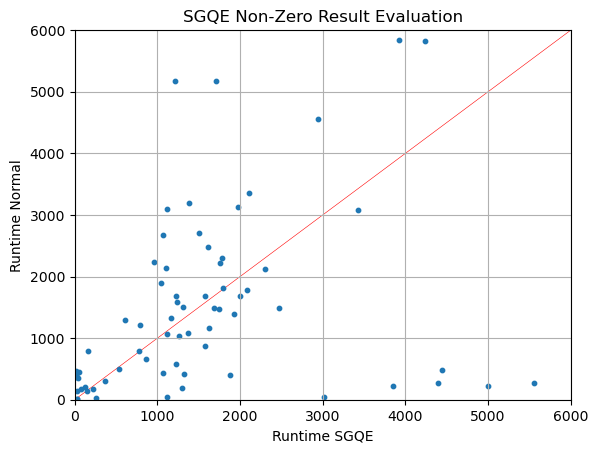

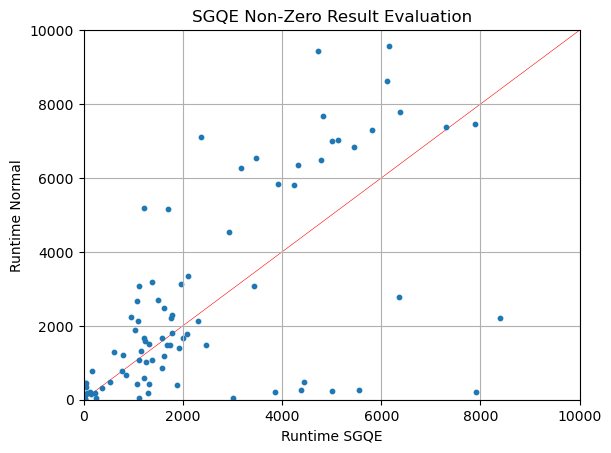

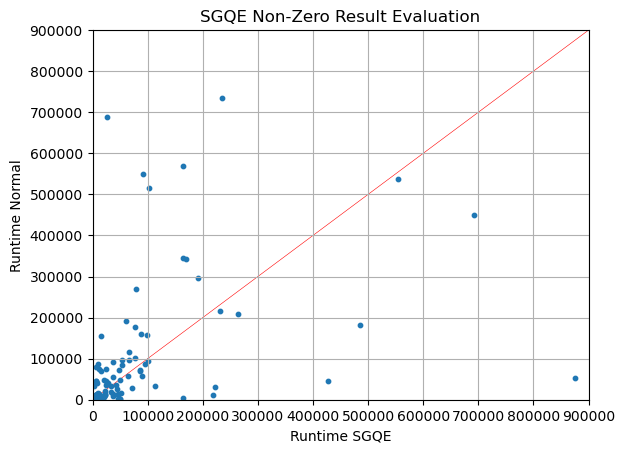

[ 1.6100000e+03 -9.8000000e+02 -1.8930000e+02 -7.9000000e+04
  1.0000000e+02 -3.5800000e+03  5.2000000e+02  4.6000000e+02
  4.6000000e+02 -5.0000000e+01 -9.3000000e+00  1.0400000e+01
  3.0000000e+02  1.1010000e+02 -3.6100000e+04 -3.5000000e+02
 -1.3800000e+01  1.3700000e+03 -6.1800000e+03  3.4600000e+03
 -6.1200000e+01  4.4570000e+02 -4.3900000e+01  3.9800000e+03
 -5.4000000e+02  3.5250000e+02 -3.2000000e+02  0.0000000e+00
 -2.2480000e+02  4.7300000e+03  0.0000000e+00 -3.8300000e+01
  1.7000000e+02  1.4100000e+03  8.0000000e+01  4.0210000e+02
 -2.0000000e+02 -1.0736000e+03  1.1600000e+03  1.2500000e+03
  7.5300000e+03  1.9800000e+03 -4.3100000e+03  4.2750000e+02
  3.6940000e+02 -1.7000000e+02  3.9920000e+02 -4.2900000e+04
  9.5000000e+01  1.0400000e+03  1.0700000e+04 -1.0500000e+04
 -4.5000000e+02  1.0990000e+02 -2.9000000e+02  3.0860000e+02
  3.9700000e+03  3.0700000e+03  1.5800000e+03  3.0900000e+03
  1.2730000e+03 -6.4010000e+02  0.0000000e+00  5.8000000e+03
  1.0000000e+02  6.28100

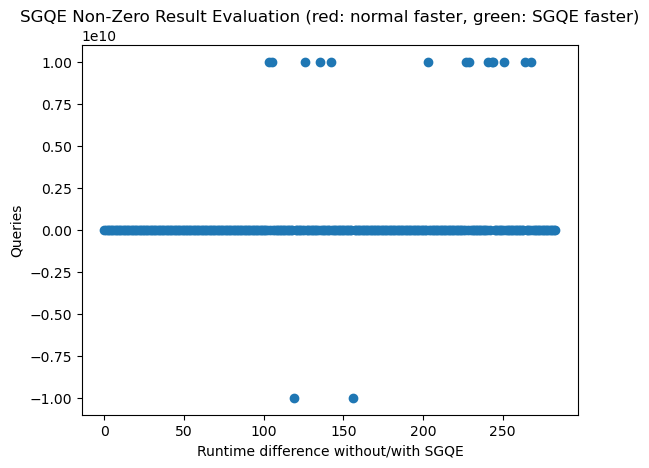

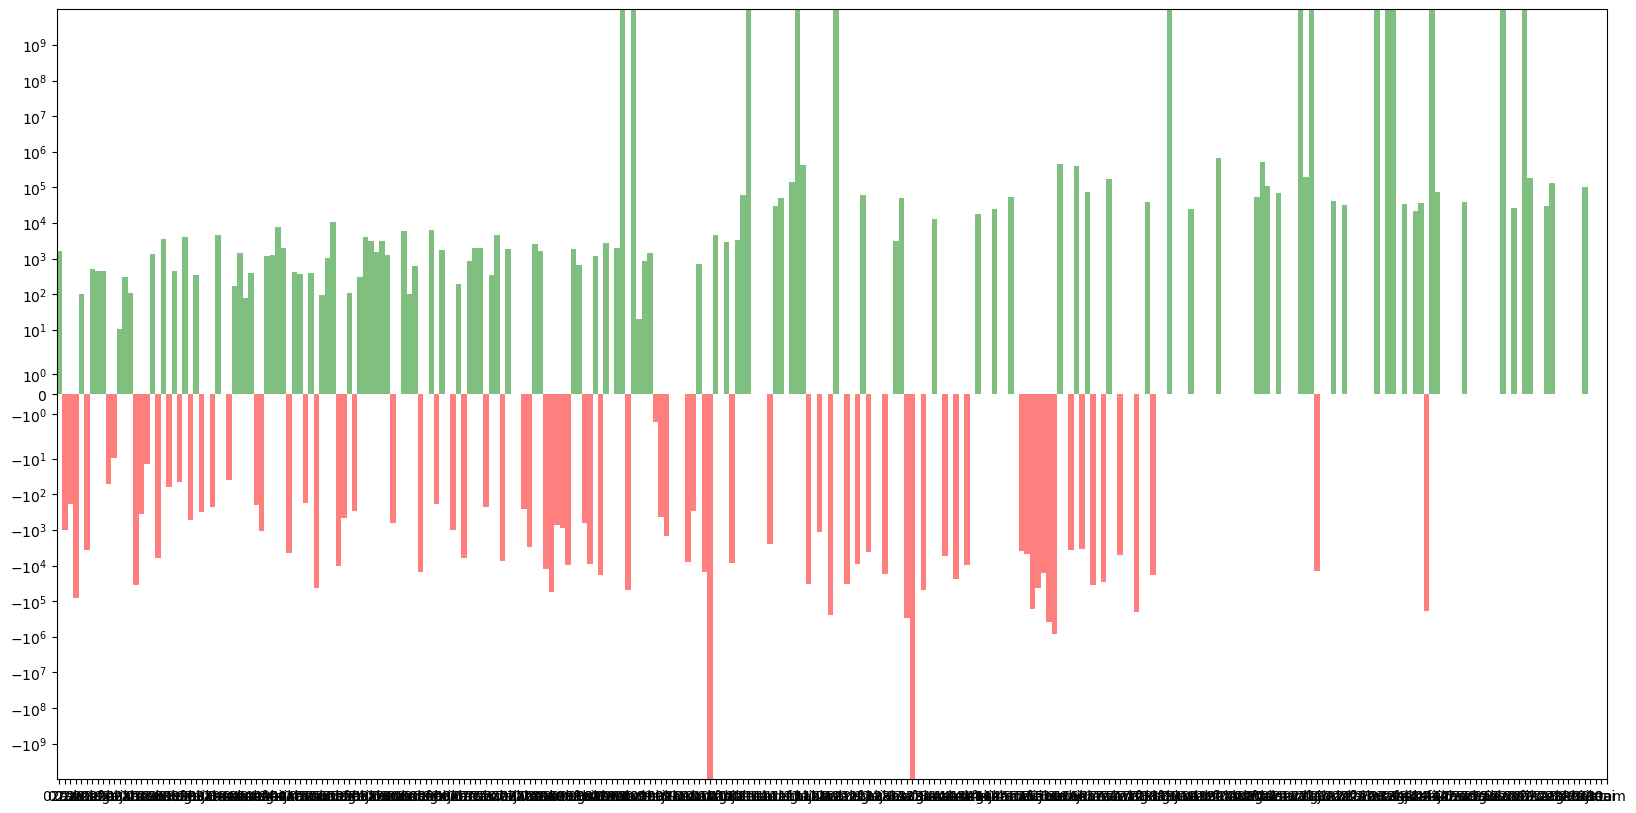

In [111]:
scatterplot2(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE Non-Zero Result Evaluation", "./SGQENonZeroResEvalScatterPlot.png")
scatterplotWithLim(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE Non-Zero Result Evaluation", "./SGQENonZeroRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_nzrq, val_b_nzrq, "Runtime SGQE", "Runtime Normal", "SGQE Non-Zero Result Evaluation", "./SGQENonZeroRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_nzrq, val_b_nzrq, "Runtime difference without/with SGQE", "Queries", "SGQE Non-Zero Result Evaluation (red: normal faster, green: SGQE faster)", "./SGQENonZeroResEvalRTDiffPlot.png", nonZeroResQueries)


In [112]:
a = np.array(val_a_nzrq)
b = np.array(val_b_nzrq)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance; non-zero result queries)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance; non-zero result queries)
minimal difference (with sign --> best for SGQE): -662200.0, maximal difference (with sign --> best for normal): 822000.0
average difference (negative --> SGQE better, positive --> normal better): -8266.663068181819
median difference (negative --> SGQE better, positive --> normal better): -180.0


In [113]:
a_better_count, b_better_count = countRT(val_a_nzrq, val_b_nzrq) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> SGQE better


97 78


In [114]:
a_better_count, b_better_count = count(maxmemlist1_nzrq, maxmemlist2_nzrq)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

15 161


In [115]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_nzrq, maxmemlist2_nzrq)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -5148.828933, maximal difference (with sign --> best for normal): 41632.709313
average difference (negative --> SGQE better, positive --> normal better): 2872.5998428521125
median difference (negative --> SGQE better, positive --> normal better): 77.555268


In [116]:
# count unsolved
val_a_nzrq_unsolved = countOccurrence(val_a_nzrq, 9999999999.0)
val_b_nzrq_unsolved = countOccurrence(val_b_nzrq, 9999999999.0)

print(f"SGQE unsolved: {val_a_nzrq_unsolved}, Normal unsolved: {val_b_nzrq_unsolved}")
if val_a_nzrq_unsolved < val_b_nzrq_unsolved:
    print("SGQE better")
elif val_a_nzrq_unsolved < val_b_nzrq_unsolved:
    print("Normal better")

SGQE unsolved: 94, Normal unsolved: 106
SGQE better


In [117]:
# unsolved by normal:
[nonZeroResQueries[i] for i in range(len(val_b_nzrq)) if val_b_nzrq[i] >= 9999999999 ]


['03am',
 '04aa',
 '06ac',
 '06al',
 '07al',
 '07am',
 '09aa',
 '09ac',
 '09ae',
 '09an',
 '09ao',
 '10ab',
 '10aj',
 '11aa',
 '11ab',
 '11ac',
 '11ad',
 '11ah',
 '11aj',
 '11am',
 '12aa',
 '12ad',
 '12ae',
 '12ag',
 '12ak',
 '12al',
 '13aa',
 '13am',
 '13ao',
 '14ab',
 '14ad',
 '14af',
 '14ai',
 '14ak',
 '14al',
 '14an',
 '14ao',
 '15af',
 '16aj',
 '17aa',
 '17ad',
 '17af',
 '17ag',
 '17al',
 '18ah',
 '18aj',
 '18an',
 '18ao',
 '19aa',
 '19ab',
 '19ae',
 '19af',
 '19ak',
 '19al',
 '20ab',
 '20ad',
 '20ae',
 '20af',
 '20ag',
 '20ah',
 '20an',
 '21ac',
 '21ad',
 '21af',
 '21ag',
 '21al',
 '21ao',
 '22ab',
 '22af',
 '22ai',
 '22al',
 '22am',
 '22an',
 '23ac',
 '23ae',
 '23af',
 '23ag',
 '23aj',
 '23ak',
 '24ac',
 '24ak',
 '24am',
 '24ao',
 '25aa',
 '25ad',
 '25ag',
 '25ai',
 '25ak',
 '25al',
 '26aa',
 '26ac',
 '26ae',
 '26af',
 '26al',
 '26an',
 '27ac',
 '27ad',
 '28ae',
 '28ah',
 '28ai',
 '28aj',
 '29ab',
 '30ac',
 '30ae',
 '30ai',
 '30am']

In [118]:
# unsolved by SGQE:
[nonZeroResQueries[i] for i in range(len(val_a_nzrq)) if val_a_nzrq[i] >= 9999999999 ]

['03am',
 '04aa',
 '06ac',
 '06al',
 '07al',
 '07am',
 '09aa',
 '09an',
 '09ao',
 '10ab',
 '10ag',
 '10aj',
 '11ab',
 '11ac',
 '11ad',
 '11ah',
 '11am',
 '12aa',
 '12ae',
 '12ag',
 '12ak',
 '12al',
 '13aa',
 '13ai',
 '13am',
 '13ao',
 '14ab',
 '14ad',
 '14af',
 '14ai',
 '14ak',
 '14al',
 '14an',
 '14ao',
 '15af',
 '16aj',
 '17aa',
 '17ad',
 '17af',
 '17ag',
 '17al',
 '18ah',
 '18aj',
 '18ao',
 '19aa',
 '19ab',
 '19ae',
 '19af',
 '19ak',
 '19al',
 '20ab',
 '20ad',
 '20ae',
 '20af',
 '20ag',
 '20ah',
 '20an',
 '21ac',
 '21ad',
 '21af',
 '21ao',
 '22ab',
 '22af',
 '22ai',
 '22al',
 '22am',
 '22an',
 '23ac',
 '23af',
 '23ak',
 '24ac',
 '24am',
 '24ao',
 '25aa',
 '25ad',
 '25ag',
 '25ai',
 '25ak',
 '25al',
 '26aa',
 '26ac',
 '26af',
 '26al',
 '27ac',
 '27ad',
 '28ae',
 '28ah',
 '28ai',
 '28aj',
 '29ab',
 '30ac',
 '30ae',
 '30ai',
 '30am']

Order queries by their number of result tuples

In [119]:
def getNumberOfResultTuples(dira, dirb):
  resultTuples = {}
  numTuplesA = openFileByWildcard(os.path.join(dira, "numTuples_*"))
  numTuplesB = openFileByWildcard(os.path.join(dirb, "numTuples_*"))

  for l in numTuplesA:
    if not "Timeout" in l:
      resultTuples[l.split(";")[0].split("/")[-1].strip()] = int(l.split(";")[-1].rstrip("\n").strip())

  for l in numTuplesB:
    if not "Timeout" in l:
      resultTuples[l.split(";")[0].split("/")[-1].strip()] = int(l.split(";")[-1].rstrip("\n").strip())

  return resultTuples

In [120]:
resTupleCounts = getNumberOfResultTuples("./aggout/complete/", "./mergeout/basic/1/")

In [121]:
resTupleCounts_keys = list(resTupleCounts.keys())
resTupleCounts_values = list(resTupleCounts.values())
resTupleCounts_sorted_value_index = np.argsort(resTupleCounts_values)
resTupleCounts_sorted = {resTupleCounts_keys[i]: resTupleCounts_values[i] for i in resTupleCounts_sorted_value_index}

In [122]:
highestCounts_keys = list(resTupleCounts_sorted.keys())[-20:]
highestCounts_values = list(resTupleCounts_sorted.values())[-20:]
highestCounts_keys.reverse()
highestCounts_values.reverse()
lowestCounts_keys = list(resTupleCounts_sorted.keys())[:20]
lowestCounts_values = list(resTupleCounts_sorted.values())[:20]

Highest result counts

In [123]:
highestCounts_keys.sort()

In [124]:
highestCounts_keys

['08ad',
 '09ae',
 '10ag',
 '10al',
 '10ao',
 '11aa',
 '11ae',
 '11aj',
 '11ak',
 '12ab',
 '12ad',
 '13ag',
 '15an',
 '18ag',
 '20ak',
 '20am',
 '21ag',
 '21al',
 '26ae',
 '26an']

In [125]:
_, val_a_hrc, maxmemlist1_hrc = getMatchingQueries(queries, val_a, maxmemlist1, highestCounts_keys)
_, val_b_hrc, maxmemlist2_hrc = getMatchingQueries(queries, val_b, maxmemlist2, highestCounts_keys)

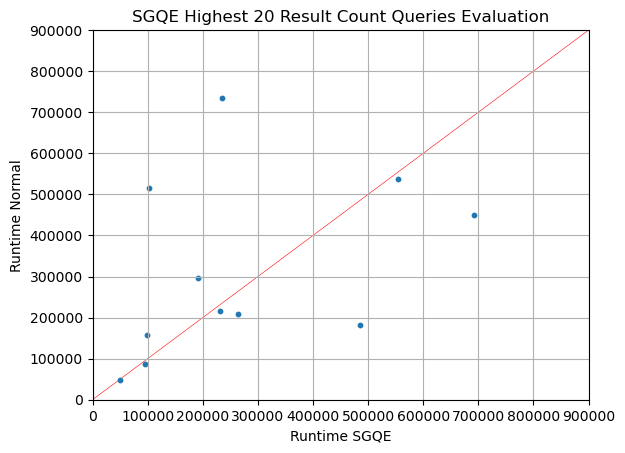

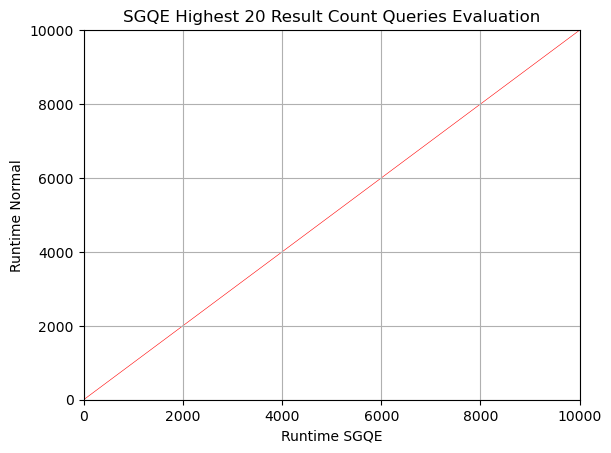

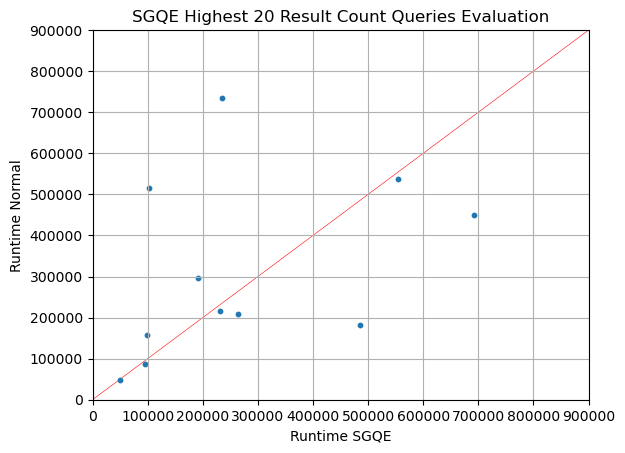

[-5.6000000e+04  9.9995228e+09 -9.9992787e+09 -8.5000000e+03
  5.9300000e+04  9.9995855e+09 -2.5000000e+03  9.9991047e+09
  4.1380000e+05 -2.4350000e+05  9.9998943e+09 -3.0390000e+05
 -1.5900000e+04 -1.7800000e+04  5.0000000e+05  1.0670000e+05
  9.9997325e+09  9.9993601e+09  9.9993887e+09  9.9995791e+09]
-9999278699.0


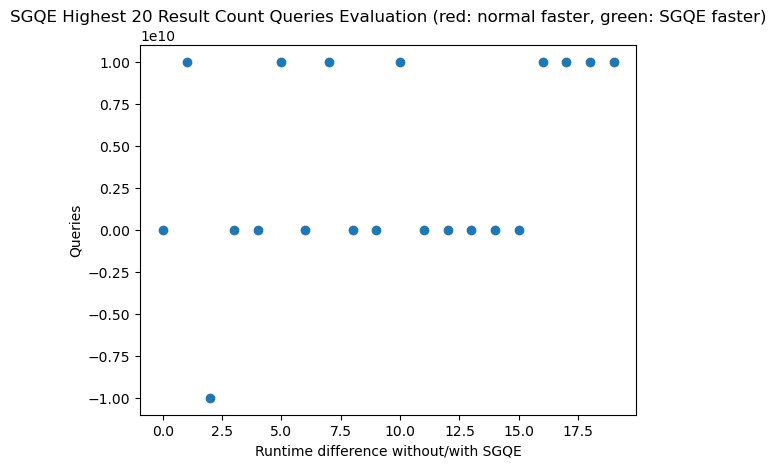

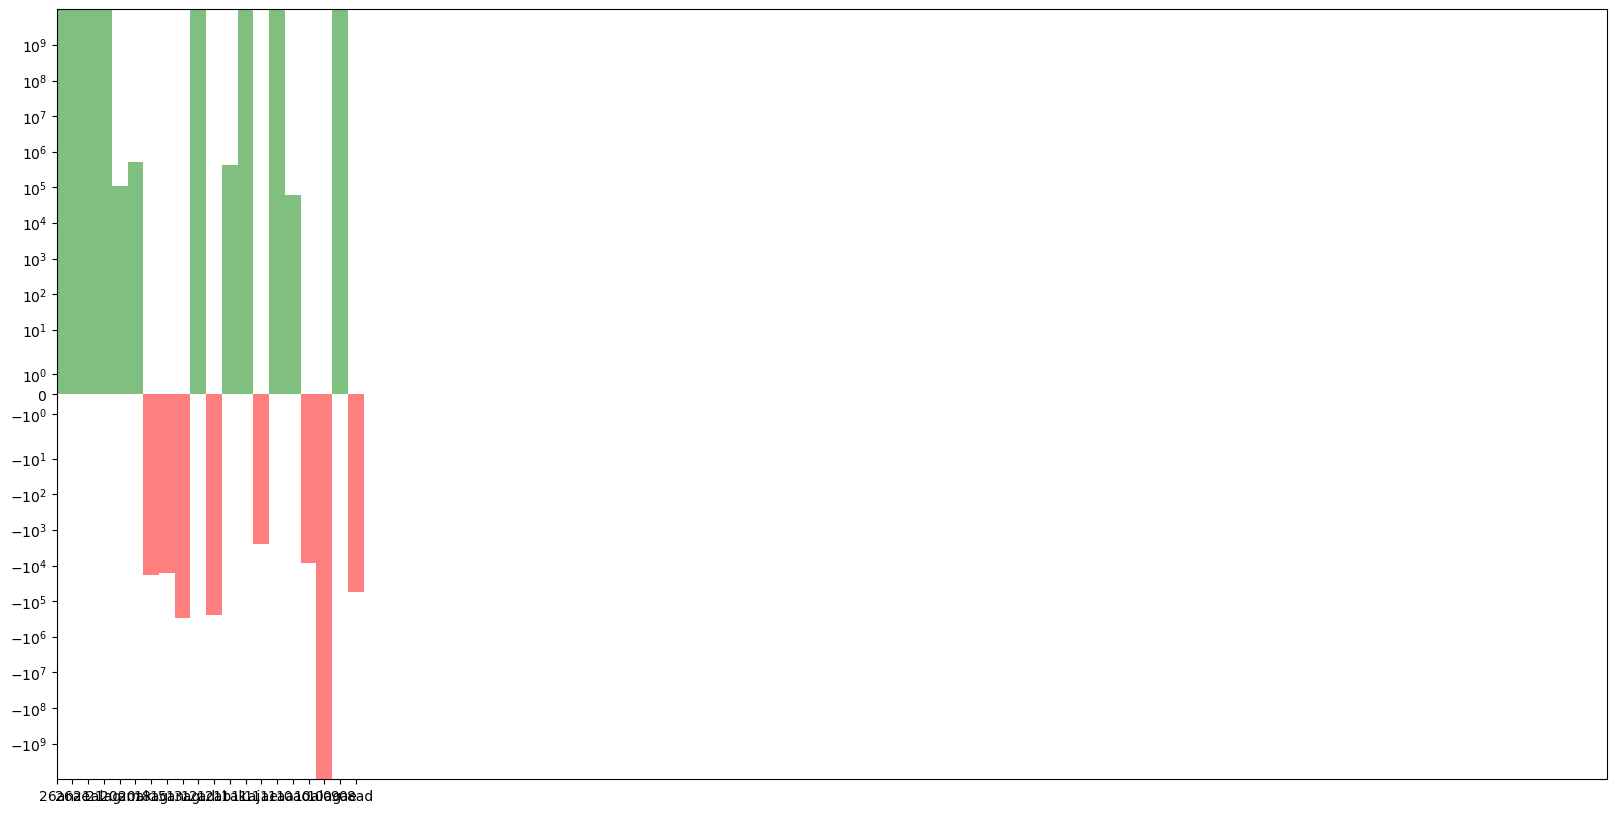

In [126]:
scatterplot3(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE Highest 20 Result Count Queries Evaluation", "./SGQEHighestResEvalScatterPlot.png")
scatterplotWithLim(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE Highest 20 Result Count Queries Evaluation", "./SGQEHighestRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_hrc, val_b_hrc, "Runtime SGQE", "Runtime Normal", "SGQE Highest 20 Result Count Queries Evaluation", "./SGQEHighestRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_hrc, val_b_hrc, "Runtime difference without/with SGQE", "Queries", "SGQE Highest 20 Result Count Queries Evaluation (red: normal faster, green: SGQE faster)", "./SGQEHighestResEvalRTDiffPlot.png", highestCounts_keys)


In [127]:
a = np.array(val_a_hrc)
b = np.array(val_b_hrc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -500000.0, maximal difference (with sign --> best for normal): 303900.0
average difference (negative --> SGQE better, positive --> normal better): -39245.454545454544
median difference (negative --> SGQE better, positive --> normal better): 8500.0


In [128]:
a_better_count, b_better_count = countRT(val_a_hrc, val_b_hrc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


4 7


In [129]:
a_better_count, b_better_count = count(maxmemlist1_hrc, maxmemlist2_hrc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

2 9


In [130]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_hrc, maxmemlist2_hrc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -5148.828933, maximal difference (with sign --> best for normal): 29803.872739
average difference (negative --> SGQE better, positive --> normal better): 3834.8678807999995
median difference (negative --> SGQE better, positive --> normal better): 0.0


In [131]:
# count unsolved
val_a_hrc_unsolved = countOccurrence(val_a_hrc, 9999999999.0)
val_b_hrc_unsolved = countOccurrence(val_b_hrc, 9999999999.0)

print(f"SGQE unsolved: {val_a_hrc_unsolved}, Normal unsolved: {val_b_hrc_unsolved}")
if val_a_hrc_unsolved < val_b_hrc_unsolved:
    print("SGQE better")
elif val_a_hrc_unsolved < val_b_hrc_unsolved:
    print("Normal better")

SGQE unsolved: 1, Normal unsolved: 8
SGQE better


In [132]:
# unsolved by normal:
[highestCounts_keys[i] for i in range(len(val_b_hrc)) if val_b_hrc[i] >= 9999999999 ]


['09ae', '11aa', '11aj', '12ad', '21ag', '21al', '26ae', '26an']

In [133]:
# unsolved by SGQE:
[highestCounts_keys[i] for i in range(len(val_a_hrc)) if val_a_hrc[i] >= 9999999999 ]

['10ag']

Lowest result counts

In [134]:
lowestCounts_keys.sort()

In [135]:
lowestCounts_keys

['12ao',
 '13ab',
 '13ad',
 '13ae',
 '13ah',
 '13aj',
 '13ak',
 '13al',
 '14ah',
 '15aa',
 '15ab',
 '15ac',
 '15ad',
 '15ag',
 '15ah',
 '15ak',
 '24an',
 '25ab',
 '25ac',
 '30ab']

In [136]:
_, val_a_lrc, maxmemlist1_lrc = getMatchingQueries(queries, val_a, maxmemlist1, lowestCounts_keys)
_, val_b_lrc, maxmemlist2_lrc = getMatchingQueries(queries, val_b, maxmemlist2, lowestCounts_keys)

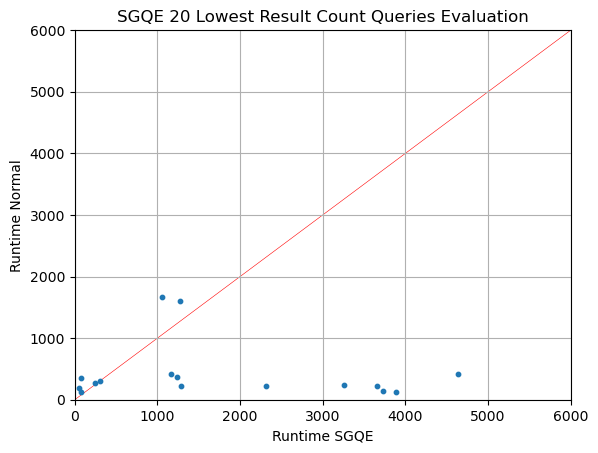

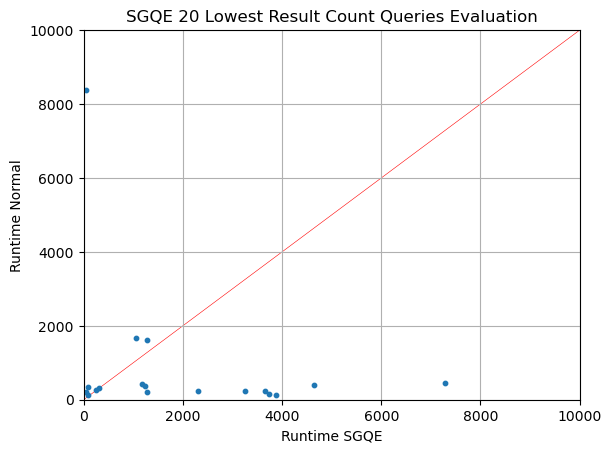

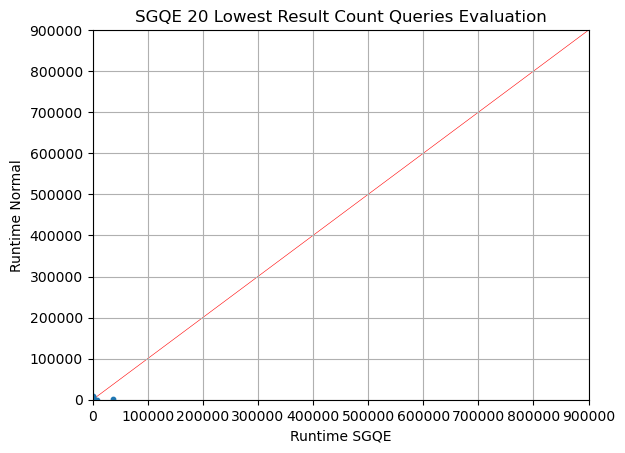

[-6.82310000e+03  3.40000000e+02 -7.55600000e+02 -4.23030000e+03
  2.97000000e+01 -1.06030000e+03  2.72600000e+02 -2.08630000e+03
 -8.65200000e+02 -3.58150000e+03  4.16000000e+01 -3.42030000e+03
 -3.74900000e+03  6.20000000e+02  1.41100000e+02  8.32440000e+03
  6.20000000e+00 -3.02860000e+03 -3.65900000e+04 -9.99999955e+09]
-9999999552.2


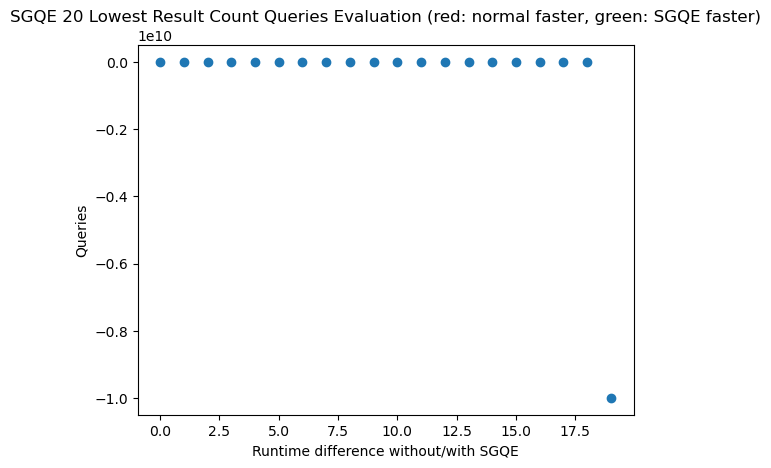

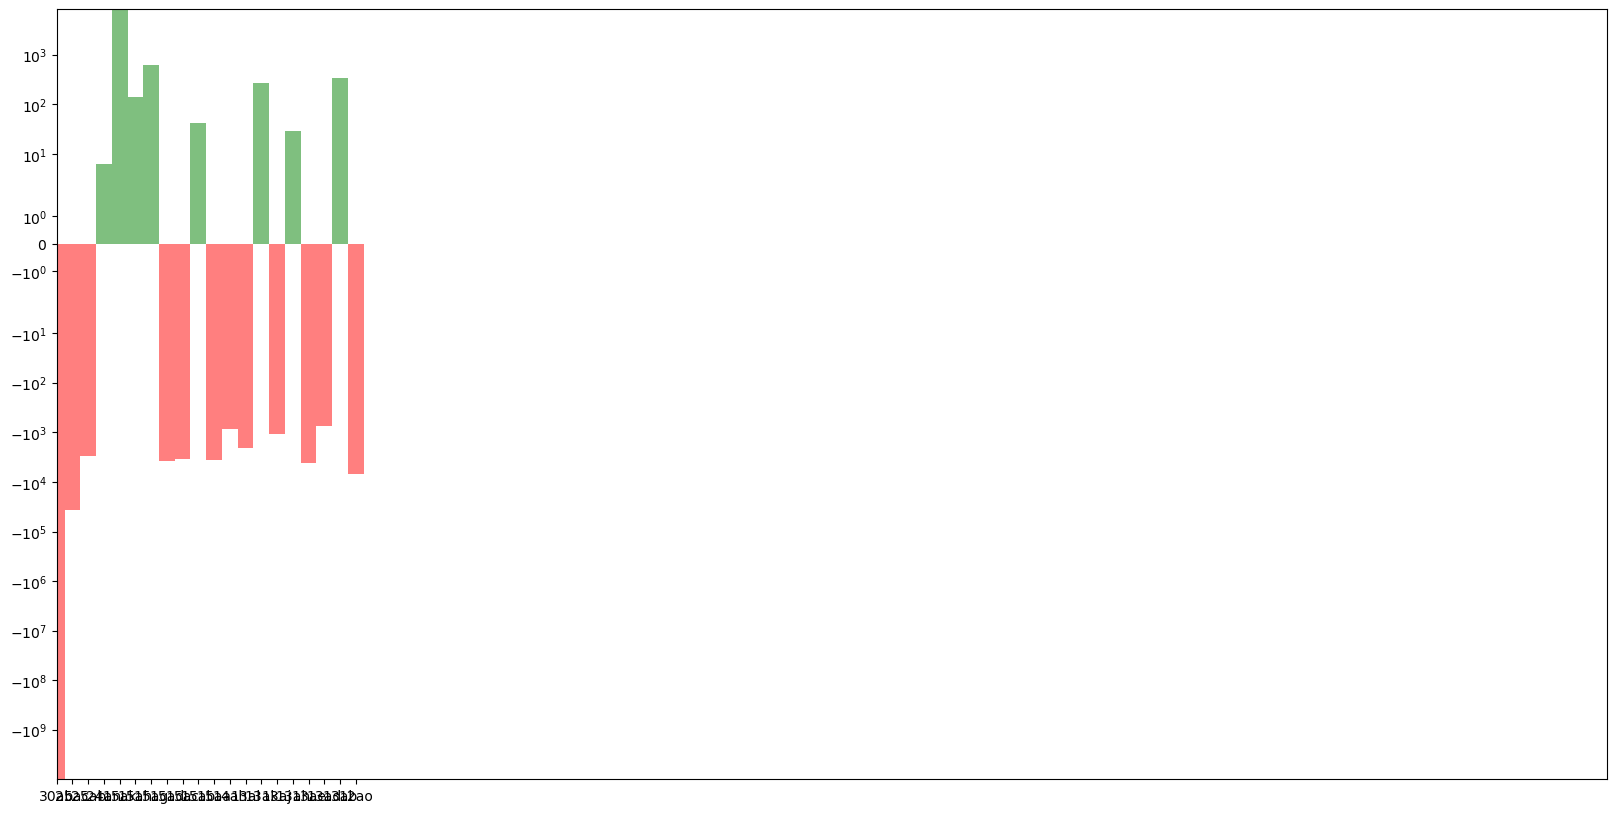

In [137]:
scatterplot2(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE 20 Lowest Result Count Queries Evaluation", "./SGQELRCResEvalScatterPlot.png")
scatterplotWithLim(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE 20 Lowest Result Count Queries Evaluation", "./SGQELRCRes10kEvalScatterPlot.png", 10000, 10000)
scatterplotWithLim(val_a_lrc, val_b_lrc, "Runtime SGQE", "Runtime Normal", "SGQE 20 Lowest Result Count Queries Evaluation", "./SGQELRCRes900kEvalScatterPlot.png", 900000, 900000)

diffPlot2(val_a_lrc, val_b_lrc, "Runtime difference without/with SGQE", "Queries", "SGQE 20 Lowest Result Count Queries Evaluation (red: normal faster, green: SGQE faster)", "./SGQELRCResEvalRTDiffPlot.png", lowestCounts_keys)


In [138]:
a = np.array(val_a_lrc)
b = np.array(val_b_lrc)

# remove not solved
a[a==9999999999.0]=0
b[b==9999999999.0]=0

# both solved --> does not fully describe the situation
ind = []
for j in range(len(a)):
    if a[j] == 0 or b[j] == 0:
        ind.append(j)
    j = j + 1

a = np.delete(a, ind)
b = np.delete(b, ind)


diffs = np.subtract(a, b)
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in ms (when both versions solved the instance)")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")

Values in ms (when both versions solved the instance)
minimal difference (with sign --> best for SGQE): -8324.4, maximal difference (with sign --> best for normal): 36590.0
average difference (negative --> SGQE better, positive --> normal better): 2969.189473684211
median difference (negative --> SGQE better, positive --> normal better): 865.2


In [139]:
a_better_count, b_better_count = countRT(val_a_lrc, val_b_lrc) # excluding unsolved instances

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better


8 11


In [140]:
a_better_count, b_better_count = count(maxmemlist1_lrc, maxmemlist2_lrc)

# a_better: SGQE better
# b_better: Normal better
print(a_better_count, b_better_count )

# --> Normal better

3 16


In [141]:

diffs = [float(0) if e[0] == float(0) or e[1] == float(0) else ((e[0]- e[1])/1000000) for e in zip(maxmemlist1_lrc, maxmemlist2_lrc)]
min = np.min(diffs)
max = np.max(diffs)

avg = np.average(diffs)

print("Values in MB")
print(f"minimal difference (with sign --> best for SGQE): {min}, maximal difference (with sign --> best for normal): {max}")
print(f"average difference (negative --> SGQE better, positive --> normal better): {avg}")
print(f"median difference (negative --> SGQE better, positive --> normal better): {np.median(diffs)}")



Values in MB
minimal difference (with sign --> best for SGQE): -1360.156146, maximal difference (with sign --> best for normal): 3419.904858
average difference (negative --> SGQE better, positive --> normal better): 750.3026481500001
median difference (negative --> SGQE better, positive --> normal better): 144.654562


In [142]:
# count unsolved
val_a_lrc_unsolved = countOccurrence(val_a_lrc, 9999999999.0)
val_b_lrc_unsolved = countOccurrence(val_b_lrc, 9999999999.0)

print(f"SGQE unsolved: {val_a_lrc_unsolved}, Normal unsolved: {val_b_lrc_unsolved}")
if val_a_lrc_unsolved < val_b_lrc_unsolved:
    print("SGQE better")
elif val_a_lrc_unsolved < val_b_lrc_unsolved:
    print("Normal better")

SGQE unsolved: 1, Normal unsolved: 0


In [143]:
# unsolved by normal:
[lowestCounts_keys[i] for i in range(len(val_b_lrc)) if val_b_lrc[i] >= 9999999999 ]


[]

In [144]:
# unsolved by SGQE:
[lowestCounts_keys[i] for i in range(len(val_a_lrc)) if val_a_lrc[i] >= 9999999999 ]

['30ab']